In [1]:
import specdist as pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import interp1d
from matplotlib.pyplot import cm
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.collections import LineCollection
from matplotlib.ticker import LogLocator
import re
scientific_notation = pi.scientific_notation
from scipy.linalg import cholesky, LinAlgError
from scipy.linalg import block_diag

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

import warnings; warnings.simplefilter('ignore')

path_to_figures = "/Users/boris/Work/SPECTRAL-DISTORTIONS/figures/"

xinj_to_mass = 4.698e-4 #m in ev = 4.698e-4 xinj
xinj_to_Einj = 4.698e-4/2. #Einj = 4.698e-4/2 xinj
mass_to_Einj = 1./2.
#1./4.698e-4*2. = 4257.130693912303

# sd_lib_bare = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('bare',sd_lib_bare)


# sd_lib_lyc = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('lyc',sd_lib_lyc)

# sd_lib_lyc_reio = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('lyc_reio',sd_lib_lyc_reio)


from matplotlib.patches import Patch
from matplotlib.lines import Line2D

label_y_firas = r'$y_\mathrm{COBE}=1.5\times 10^{-5}$'
label_mu_firas = r'$\mu_\mathrm{COBE}=9\times 10^{-5}$'
label_fdm = 'Effective Dark Matter Fraction, '+r'$\epsilon f_\mathrm{dm}$'
label_mdm = 'Particle Mass,  ' +r'$m_\mathrm{X}\quad[\mathrm{eV}]$'
label_xe = 'Free Electron Fraction, '+r'$X_\mathrm{e}$'
label_Zeta_e = 'Ionization History, '+r'$\zeta(z) = \Delta X_\mathrm{e}/X_\mathrm{e}$'
label_redshift = 'Redshift, '+r'$z$'
label_mu_dist =  'Chemical Potential, '+r'$\mu$'
label_injection_frequency = "Scaled Injection Frequency, "+ r'$x_{\mathrm{inj,0}}$'
label_scaled_frequency = "Scaled Frequency, "+ r'$x=h\nu/k_{_\mathrm{B}}T_{_\mathrm{CMB}}$'
label_frequency_in_GHz = "Frequency,  "+ r'$\nu \quad [\mathrm{GHz}]$'
label_intensity = "Intensity, "+r'$\Delta I_x \quad [\mathrm{Jy/sr}]$'
label_intensity_kJy = "Intensity, "+r'$\Delta I_x \quad [\mathrm{kJy/sr}]$'
label_injection_energy = "Injection Energy, "+ r'$E_{\mathrm{inj,0}}$' + " [eV]"

label_Gamma = "Decay Rate, "+r"$\Gamma_X\quad[\mathrm{s^{-1}}]$"

label_zX = "Maximum Injection Redshift, "+ r'$z_X$'
label_Tau_x = "Lifetime,  "+r'$\tau_X\quad[\mathrm{s}]$'

label_log10Tau_x = "Lifetime,  "+r'$\mathrm{log}_{10}(\tau_X/\,1\mathrm{s})$'
label_Tau_x = "Lifetime,  "+r'$\tau_X\quad[\mathrm{s}]$'
label_log10injection_energy = "Injection Energy, "+ r'$\mathrm{log}_{10}(E_{\mathrm{inj,0}}/\,1\mathrm{eV})$'
label_log10mdm = 'Particle Mass, ' +r'$\mathrm{log}_{10}(m_\mathrm{X}/\,1\mathrm{eV})$'
sd = pi

In [2]:
a_dict = {}
a_dict['PCA_modes'] = sd.Xe_PCA_EigenModes()
a_dict['store_DXe_Xe'] = 'yes'
rf = sd.recfast()
rf.rf_zstart = 2.5e4
rf.rf_zend = 0.01
rf.rf_include_correction_function = 0
rf.rf_add_collisions = 0

rf.rf_Reionization_model = 1
a_dict['recfast'] = rf
rf.rf_T0 = 2.7255
rf.rf_Yp = 0.245407
rf.rf_N_eff = 3.046
rf.rf_Omega_m = 0.312331
rf.rf_Omega_b = 0.0491137
rf.rf_h = 0.675422


gi_array = np.logspace(np.log10(1e-22),np.log10(1e-12),1)
xdec = [1e-15]


fdmi_array = np.full(len(gi_array),1e-5)
N_iter = 1
rf_fdm_pca = rf.pi_run_pca_constraints_with_recfast_exact(xdec,gi_array,0,fdmi_array,N_iter,**a_dict)
# rf_fdm_pca = rf.pi_run_pca_constraints_with_recfast(xdec,gi_array,1e-5,**a_dict)
print(rf_fdm_pca)

iter_id =  0
initial fdms (not parallel) =  [1.e-05]
with multi params:  (array([1.e-22]), array([1.e-05]))
no multi params:  [1.e-22]
[524.07432844]


In [3]:
from scipy import optimize
import multiprocessing
import functools


Sequentially

In [8]:
# xdecp = 1e-15
# gammap_array = np.logspace(np.log10(1e-22),np.log10(1e-12),1)
# fdm_sols = []
# for idg in range(len(gammap_array)):
#     fdm_sols.append(rf.solve_pca_exact(idg,gammap_array,xdecp,**a_dict))
#     print('-----')
# print(fdm_sols)


In parallel

In [38]:
Ng = 80
xdecp = 1e-15
gammap_array = np.logspace(np.log10(1e-22),np.log10(1e-12),Ng)
pool = multiprocessing.Pool()
rf.rf_add_collisions = 0
fn=functools.partial(rf.solve_pca_exact,gamma_array=gammap_array,xdec=xdecp,**a_dict)
results_no_coll = pool.map(fn,range(Ng))
pool.close()
results_no_coll

NameError: name 'results_no_coll' is not defined

In [39]:
results_no_coll = results

In [40]:
results_coll = [0.003700523408861015,
 0.002764917460138049,
 0.0020658491442306897,
 0.0015435360201634715,
 0.0011532783214440066,
 0.0008616946196369681,
 0.0006438302320907435,
 0.0004810489967041664,
 0.0003594214998880995,
 0.0002685418616658284,
 0.00020065175166290083,
 0.00014992086129513054,
 0.00011201603819947176,
 8.36950082484196e-05,
 6.253394999732258e-05,
 4.672392762026636e-05,
 3.4910839415429347e-05,
 2.6084345810471583e-05,
 1.948972033439085e-05,
 1.4562351637170139e-05,
 1.088077749053061e-05,
 8.130023275410748e-06,
 6.0747396488795525e-06,
 4.539108990219113e-06,
 3.3917367070375353e-06,
 2.534440807632422e-06,
 1.8939217638113854e-06,
 1.415334123963016e-06,
 1.0577511921086568e-06,
 7.905623683932595e-07,
 5.909558804196624e-07,
 4.418056119082275e-07,
 3.3036404867262206e-07,
 2.470969562138116e-07,
 1.8488661558565437e-07,
 1.3840411656340063e-07,
 1.036744441901642e-07,
 7.772601790967017e-08,
 5.8337067051628325e-08,
 4.3855014071983304e-08,
 3.303459781910684e-08,
 2.495226438533641e-08,
 1.8916214488207087e-08,
 1.44100852258003e-08,
 1.1048713142700555e-08,
 8.544095894020106e-09,
 6.680992907737197e-09,
 5.299814981787033e-09,
 4.28299004102285e-09,
 3.544443708128105e-09,
 3.022667294623566e-09,
 2.6744121034518523e-09,
 2.4697942154603664e-09,
 2.386159893126101e-09,
 2.4048535324384584e-09,
 2.5151992783351107e-09,
 2.7242450388000585e-09,
 3.0586542298315687e-09,
 3.5518492465297263e-09,
 4.252425116268883e-09,
 5.26425552617275e-09,
 6.786446762064854e-09,
 9.194704659633775e-09,
 1.3208603216189435e-08,
 1.974705943871209e-08,
 2.6726062719553563e-08,
 2.279095958426865e-08,
 1.6263229413290637e-08,
 1.4526936551722258e-08,
 1.3969043074837372e-08,
 1.4871296286881938e-08,
 1.811404240959687e-08,
 2.6163238863325216e-08,
 4.663312965962124e-08,
 1.0757116249356268e-07,
 3.412260037186218e-07,
 1.62086542161946e-06,
 1.3557959082411628e-05,
 0.00040676854804246916,
 0.002276379983561085]

In [30]:
rf.rf_add_collisions = 1
gammap_array = np.logspace(np.log10(1e-22),np.log10(1e-12),Ng)
pool = multiprocessing.Pool()
fn=functools.partial(rf.solve_pca_exact,gamma_array=gammap_array,xdec=xdecp,**a_dict)
results_coll = pool.map(fn,range(Ng))
pool.close()
results_coll

[0.003700523408861015,
 0.002764917460138049,
 0.0020658491442306897,
 0.0015435360201634715,
 0.0011532783214440066,
 0.0008616946196369681,
 0.0006438302320907435,
 0.0004810489967041664,
 0.0003594214998880995,
 0.0002685418616658284,
 0.00020065175166290083,
 0.00014992086129513054,
 0.00011201603819947176,
 8.36950082484196e-05,
 6.253394999732258e-05,
 4.672392762026636e-05,
 3.4910839415429347e-05,
 2.6084345810471583e-05,
 1.948972033439085e-05,
 1.4562351637170139e-05,
 1.088077749053061e-05,
 8.130023275410748e-06,
 6.0747396488795525e-06,
 4.539108990219113e-06,
 3.3917367070375353e-06,
 2.534440807632422e-06,
 1.8939217638113854e-06,
 1.415334123963016e-06,
 1.0577511921086568e-06,
 7.905623683932595e-07,
 5.909558804196624e-07,
 4.418056119082275e-07,
 3.3036404867262206e-07,
 2.470969562138116e-07,
 1.8488661558565437e-07,
 1.3840411656340063e-07,
 1.036744441901642e-07,
 7.772601790967017e-08,
 5.8337067051628325e-08,
 4.3855014071983304e-08,
 3.303459781910684e-08,
 2.4

In [5]:
a_dict = {}
a_dict['PCA_modes'] = sd.Xe_PCA_EigenModes()
a_dict['store_DXe_Xe'] = 'yes'
rf = sd.recfast()
rf.rf_zstart = 2.5e4
rf.rf_zend = 0.01
rf.rf_include_correction_function = 0
rf.rf_add_collisions = 0

rf.rf_Reionization_model = 1
a_dict['recfast'] = rf
rf.rf_T0 = 2.7255
rf.rf_Yp = 0.245407
rf.rf_N_eff = 3.046
rf.rf_Omega_m = 0.312331
rf.rf_Omega_b = 0.0491137
rf.rf_h = 0.675422


gi_array = np.logspace(np.log10(1e-22),np.log10(1e-12),20)
xdec = [1e-15]


fdmi_array = np.full(len(gi_array),1e-5)
N_iter = 10
rf_fdm_pca = rf.pi_run_pca_constraints_with_recfast_iterative(xdec,gi_array,fdmi_array,N_iter,**a_dict)
# rf_fdm_pca = rf.pi_run_pca_constraints_with_recfast(xdec,gi_array,1e-5,**a_dict)

iter_id =  0
initial fdms =  [1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05
 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05]
iter_id =  1
initial fdms =  [5.24074328e-03 2.94043543e-03 1.67219476e-03 9.93280901e-04
 5.80834337e-04 3.41877356e-04 2.07476982e-04 1.33132753e-04
 8.70169644e-05 4.24484928e-05 1.44972472e-05 5.08420851e-06
 2.01303757e-06 8.89741582e-07 4.31998763e-07 2.30834030e-07
 1.41544020e-07 1.28140100e-07 5.43089180e-07 2.03645233e-03]
iter_id =  2
initial fdms =  [1.64428633e-01 7.09120228e-02 3.12560739e-02 1.44159643e-02
 6.69458489e-03 3.09942837e-03 1.34196676e-03 4.93490494e-04
 1.59840531e-04 4.98354280e-05 1.50633429e-05 4.57710926e-06
 1.42107309e-06 4.55499732e-07 1.53616410e-07 5.70533699e-08
 2.63060948e-08 2.40034139e-08 2.91220533e-07 2.25185537e-03]
iter_id =  3
initial fdms =  [1.42346222e+00 5.18809938e-01 1.82255216e-01 6.10809983e-02
 1.94296654e-02 6.03023812e-03 1.85559085e-03 5.64264541e-04
 1.6952

9


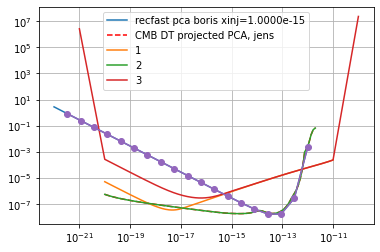

In [15]:
# for i in range(len(rf_fdm_pca['curves'])):
#     plt.plot(rf_fdm_pca['curves'][i]['Gamma_inj'],rf_fdm_pca['curves'][i]['fdm'],label='recfast pca boris xinj=%.4e'%rf_fdm_pca['xinj'][i])
i = len(rf_fdm_pca['curves']) -1
print(i)
plt.plot(rf_fdm_pca['curves'][i]['Gamma_inj'],rf_fdm_pca['curves'][i]['fdm'],label='recfast pca boris xinj=%.4e'%rf_fdm_pca['xinj'][i])




PCA = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/fdm_PCA_limits.dat')
plt.plot(PCA[:,0],PCA[:,1],c='r',ls='--',label='CMB DT projected PCA, jens')


jens_data_1 = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/notebooks/jens_data_xe_pca_fig/set-1.dat')
plt.plot(jens_data_1[:,0],jens_data_1[:,1],label='1')
jens_data_2 = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/notebooks/jens_data_xe_pca_fig/set-2.dat')
plt.plot(jens_data_2[:,0],jens_data_2[:,1],label='2')
jens_data_3 = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/notebooks/jens_data_xe_pca_fig/set-3.dat')
plt.plot(jens_data_3[:,0],jens_data_3[:,1],label='3')
# gamma_inj = np.logspace(-20,-12,100)[5:]
# for xinj in [1e-8,1e-4,1e-2,1e2, 1e4, 1e6][0:1]:
#     fdm_pca = []
#     fdm_pca_recfast = []
#     #xinj = 1e-8
#     z_asked = np.logspace(np.log10(1e-2),np.log10(4000),5000)
#     for gamma_asked in gamma_inj:
#         #S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_xe_history)
# #         S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_extended_run)
# #         fdm_pca.append(S_xe_history['fdm_pca_lim'])
#         xdec = [xinj]
#         gi_array = [gamma_asked]
#         fdm_pca_recfast_p = pi_run_pca_constraints_with_recfast(xdec,gi_array,S_xe_history['fdm'],**a_dict)
#         fdm_pca_recfast.append(fdm_pca_recfast_p['curves'][0]['fdm'][0])
#     fdm_pca = np.asarray(fdm_pca)
#     fdm_pca_recfast = np.asarray(fdm_pca_recfast)
#     #plt.plot(gamma_inj,fdm_pca,label=r'CT, $x_\mathrm{inj}=%.2e$, boris'%xinj)
#     plt.plot(gamma_inj,fdm_pca_recfast,label=r'rf with fdm from CT, $x_\mathrm{inj}=%.2e$, boris'%xinj)


plt.plot(gammap_array,results,marker='o')
plt.plot(gammap_array,results,marker='o')
plt.loglog()
plt.grid(which='both')
plt.legend()
#plt.savefig(path_to_figures + 'pca-comparison_fdm_1e-5_w_reio.pdf')

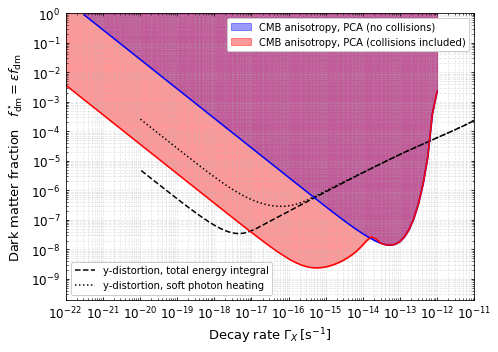

In [77]:
lstyles = iter(['-','--','-.',':','-','--','-.',':','-','--','-.',':','-','--','-.',':','-','--','-.',':','-','--','-.',':'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, (ax2) = plt.subplots(1,1,figsize=(7,5))
label_size = 12
title_size = 13
legend_size = 25
handle_length = 1.5

ax = ax2
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(r'Dark matter fraction   $f_\mathrm{dm}^\star=\epsilon f_\mathrm{dm}$',size=title_size)
ax.set_xlabel(r'Decay rate $\Gamma_X\,[\mathrm{s}^{-1}]$',size=title_size)
ax.yaxis.set_label_coords(-.10,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


colors = iter(['k','forestgreen','b','purple','orange','grey','r','b','orange','green','magenta','k','forestgreen','b','purple','green','magenta','r','b','orange','green','magenta'])


jens_data_1 = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/notebooks/jens_data_xe_pca_fig/set-1.dat')
plt.plot(jens_data_1[:,0],jens_data_1[:,1],
         c = 'k',
         ls ='--',
         label='y-distortion, total energy integral')
jens_data_2 = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/notebooks/jens_data_xe_pca_fig/set-2.dat')
# plt.plot(jens_data_2[:,0],jens_data_2[:,1],
#          c='k',
#          ls = '-',
#          label='CMB anisotropy, soft photon heating')
jens_data_3 = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/notebooks/jens_data_xe_pca_fig/set-3.dat')
plt.plot(jens_data_3[:,0][:202],jens_data_3[:,1][:202],
         c='k',
         ls =':',
         label='y-distortion, soft photon heating')


plt.fill_between(gammap_array,results_no_coll,1.,ls='-',color='b',alpha = 0.4)
plt.fill_between(gammap_array,results_coll,1.,ls='-',color='r',alpha = 0.4)


plt.plot(gammap_array,results_no_coll,ls='-',c='b',alpha = 1.)
plt.plot(gammap_array,results_coll,ls='-',c='r',alpha = 1.)

ax2.set_ylim(2.e-10,1e0)
ax2.set_xlim(1.e-22,1e-11)
#ax2.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)
# ax1.set_title(r'$COBE/FIRAS$ Only',fontsize=9)
#ax2.set_title(r'$COBE/FIRAS$ + EDGES',fontsize=9)
# ax2.set_xlim(1e-1,1e5)
#leg1 = plt.legend(loc=3,ncol=2,frameon=True,framealpha=0.6,fontsize = 9)
legend_elements = [Line2D([0], [0], ls='--',marker='None', color='k', label='with collisions',
                          markerfacecolor='None', markersize=5),
                  Line2D([0], [0], ls='-',marker='None', color='k', label='without collisions',
                          markerfacecolor='None', markersize=5)]
import matplotlib.patches as mpatches
pop_a = mpatches.Patch(color='b',alpha = 0.4, label='CMB anisotropy, PCA (no collisions)')
pop_b = mpatches.Patch(color='r',alpha = 0.4, label='CMB anisotropy, PCA (collisions included)')
legend_elements = [pop_a,pop_b]
leg2 = plt.legend(handles=legend_elements, loc=1,framealpha=1)
# ax1.legend(loc=2,ncol=1,frameon=True,framealpha=1.,fontsize = 7)
# ax2.legend(loc=4,ncol=1,frameon=True,framealpha=1.,fontsize = 9)



plt.legend(loc=3,framealpha=1)
ax.add_artist(leg2)
fig.tight_layout()
# plt.subplots_adjust(wspace=0.2)
plt.savefig(path_to_figures + '/figures_for_paper_Xe_pca.pdf')
plt.show()
plt.close(fig)

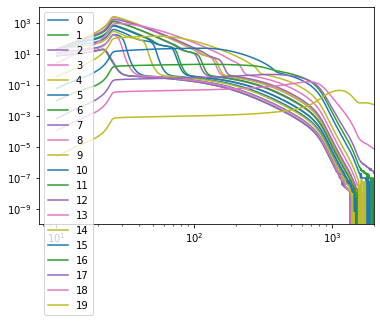

In [25]:
iter_id = 1
for i in range(np.shape(rf_fdm_pca['curves'][iter_id]['DXe_Xe'])[0]):
    z = rf_fdm_pca['curves'][iter_id]['DXe_Xe'][i][0]
    DX = rf_fdm_pca['curves'][iter_id]['DXe_Xe'][i][1]
    plt.plot(z,DX,label=str(i))
    plt.plot(z,-DX,ls='--')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.,2e3)
plt.legend()
#len(rf_fdm_pca['curves'][i]['Gamma_inj']

In [26]:
np.shape(rf_fdm_pca['curves'])[0]

15

gamma = 1.833e-17


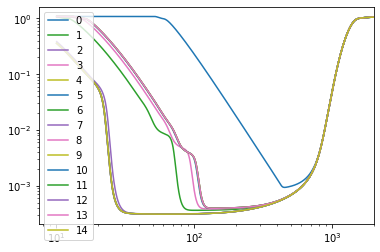

In [27]:
iter_id = 5
gamma_id = 10
#for gamma_id in range(np.shape(rf_fdm_pca['curves'][iter_id]['Xe'])[0]):
print('gamma = %.3e'%rf_fdm_pca['curves'][iter_id]['Gamma_inj'][gamma_id])
for iter_id in range(np.shape(rf_fdm_pca['curves'])[0]):
    z = rf_fdm_pca['curves'][iter_id]['Xe'][gamma_id][0]
    DX = rf_fdm_pca['curves'][iter_id]['Xe'][gamma_id][1]
    plt.plot(z,DX,label=str(iter_id))
    plt.plot(z,-DX,ls='--')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.,2e3)
plt.legend()
#len(rf_fdm_pca['curves'][i]['Gamma_inj']

In [20]:
rf_fdm_pca['curves'][iter_id]['Gamma_inj'][gamma_id]

array([1.00000000e-22, 3.35981829e-22, 1.12883789e-21, 3.79269019e-21,
       1.27427499e-20, 4.28133240e-20, 1.43844989e-19, 4.83293024e-19,
       1.62377674e-18, 5.45559478e-18, 1.83298071e-17, 6.15848211e-17,
       2.06913808e-16, 6.95192796e-16, 2.33572147e-15, 7.84759970e-15,
       2.63665090e-14, 8.85866790e-14, 2.97635144e-13, 1.00000000e-12])

In [16]:
np.shape(rf_fdm_pca['curves'][0]['DXe_Xe'])[0]

4

In [7]:
a_dict = {}
a_dict['PCA_modes'] = sd.Xe_PCA_EigenModes()
a_dict['store_DXe_Xe'] = 'yes'
rf = sd.recfast()
rf.rf_zstart = 2.5e4
rf.rf_zend = 10.
rf.rf_include_correction_function = 0
rf.rf_add_collisions = 2

rf.rf_Reionization_model = 1
a_dict['recfast'] = rf
rf.rf_T0 = 2.7255
rf.rf_Yp = 0.245407
rf.rf_N_eff = 3.046
rf.rf_Omega_m = 0.312331
rf.rf_Omega_b = 0.0491137
rf.rf_h = 0.675422


gi_array = np.logspace(np.log10(1e-20),np.log10(1e-12),10)
xdec = [1e-15]


fdmi_array = np.full(len(gi_array),1e-7)
N_iter = 6
#rf_fdm_pca = rf.pi_run_pca_constraints_with_recfast_iterative(xdec,gi_array,fdmi_array,N_iter,**a_dict)
#rf_fdm_pca = rf.pi_run_pca_constraints_with_recfast_iterative(xdec,gi_array,fdmi_array,N_iter,**a_dict)


rf_fdm_pca = rf.pi_run_pca_constraints_with_recfast(xdec,[1e-19],2.13504121e-06,**a_dict)

print(rf_fdm_pca['curves'][0]['fdm'])

[2.04934981e-05]


In [ ]:
for i in range(len(rf_fdm_pca['curves'])):
    plt.plot(rf_fdm_pca['curves'][i]['Gamma_inj'],rf_fdm_pca['curves'][i]['fdm'],label='recfast pca boris xinj=%.4e'%rf_fdm_pca['xinj'][i])



PCA = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/fdm_PCA_limits.dat')
plt.plot(PCA[:,0],PCA[:,1],c='r',ls='--',label='CMB DT projected PCA, jens')

# gamma_inj = np.logspace(-20,-12,100)[5:]
# for xinj in [1e-8,1e-4,1e-2,1e2, 1e4, 1e6][0:1]:
#     fdm_pca = []
#     fdm_pca_recfast = []
#     #xinj = 1e-8
#     z_asked = np.logspace(np.log10(1e-2),np.log10(4000),5000)
#     for gamma_asked in gamma_inj:
#         #S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_xe_history)
# #         S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_extended_run)
# #         fdm_pca.append(S_xe_history['fdm_pca_lim'])
#         xdec = [xinj]
#         gi_array = [gamma_asked]
#         fdm_pca_recfast_p = pi_run_pca_constraints_with_recfast(xdec,gi_array,S_xe_history['fdm'],**a_dict)
#         fdm_pca_recfast.append(fdm_pca_recfast_p['curves'][0]['fdm'][0])
#     fdm_pca = np.asarray(fdm_pca)
#     fdm_pca_recfast = np.asarray(fdm_pca_recfast)
#     #plt.plot(gamma_inj,fdm_pca,label=r'CT, $x_\mathrm{inj}=%.2e$, boris'%xinj)
#     plt.plot(gamma_inj,fdm_pca_recfast,label=r'rf with fdm from CT, $x_\mathrm{inj}=%.2e$, boris'%xinj)



plt.loglog()
plt.grid(which='both')
plt.legend()
#plt.savefig(path_to_figures + 'pca-comparison_fdm_1e-5_w_reio.pdf')

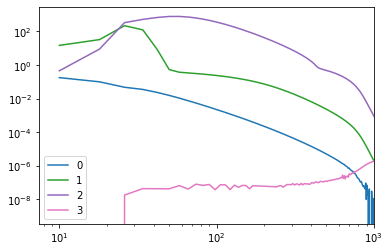

In [17]:
for i in range(np.shape(rf_fdm_pca['curves'][0]['DXe_Xe'])[0]):
    z = rf_fdm_pca['curves'][0]['DXe_Xe'][i][0]
    DX = rf_fdm_pca['curves'][0]['DXe_Xe'][i][1]
    plt.plot(z,DX,label=str(i))
    plt.plot(z,-DX,ls='--')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.,1e3)
plt.legend()
#len(rf_fdm_pca['curves'][i]['Gamma_inj']

In [8]:
iter_id = 3
for i in range(np.shape(rf_fdm_pca['curves'][iter_id]['DXe_Xe'])[0]):
    z = rf_fdm_pca['curves'][iter_id]['DXe_Xe'][i][0]
    DX = rf_fdm_pca['curves'][iter_id]['DXe_Xe'][i][1]
    plt.plot(z,DX,label=str(i))
    plt.plot(z,-DX,ls='--')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.,2e3)
plt.legend()
#len(rf_fdm_pca['curves'][i]['Gamma_inj']

IndexError: list index out of range

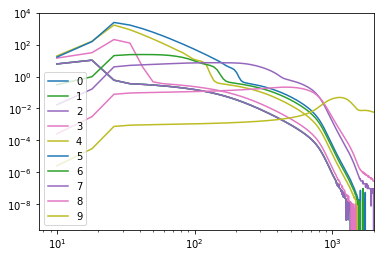

In [25]:
iter_id = 4
for i in range(np.shape(rf_fdm_pca['curves'][iter_id]['DXe_Xe'])[0]):
    z = rf_fdm_pca['curves'][iter_id]['DXe_Xe'][i][0]
    DX = rf_fdm_pca['curves'][iter_id]['DXe_Xe'][i][1]
    plt.plot(z,DX,label=str(i))
    plt.plot(z,-DX,ls='--')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.,2e3)
plt.legend()
#len(rf_fdm_pca['curves'][i]['Gamma_inj']

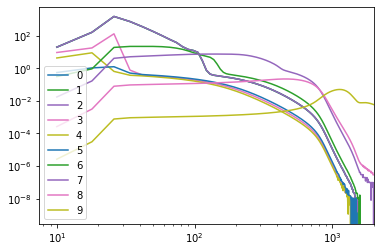

In [27]:
iter_id = 5
for i in range(np.shape(rf_fdm_pca['curves'][iter_id]['DXe_Xe'])[0]):
    z = rf_fdm_pca['curves'][iter_id]['DXe_Xe'][i][0]
    DX = rf_fdm_pca['curves'][iter_id]['DXe_Xe'][i][1]
    plt.plot(z,DX,label=str(i))
    plt.plot(z,-DX,ls='--')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.,2e3)
plt.legend()
#len(rf_fdm_pca['curves'][i]['Gamma_inj']

# end


In [2]:
from scipy.interpolate import interp1d

def pi_run_pca_constraints_with_recfast(xinj_values,gammai_array,fdm,*args,**kwargs):
    PCA_eigen_modes = kwargs['PCA_modes']
    recfast = kwargs['recfast']
    f_dm_pca = {}
    f_dm_pca['curves'] = []
    f_dm_pca['xinj'] = []
    
    store_DXe_Xe = kwargs.get('store_DXe_Xe', 'no')
    
    
    z1 = PCA_eigen_modes.Xe_PCA_EigenModes['E1']['z']
    E1 = PCA_eigen_modes.Xe_PCA_EigenModes['E1']['values']
    z2 = PCA_eigen_modes.Xe_PCA_EigenModes['E2']['z']
    E2 = PCA_eigen_modes.Xe_PCA_EigenModes['E2']['values']
    z3 = PCA_eigen_modes.Xe_PCA_EigenModes['E3']['z']
    E3 = PCA_eigen_modes.Xe_PCA_EigenModes['E3']['values']
    
    f_E1 = interp1d(z1, E1)
    f_E2 = interp1d(z2, E2)
    f_E3 = interp1d(z3, E3)

    
    for xinj_asked in xinj_values:
        xdec = xinj_asked
        curves = {}
        curves['Gamma_inj'] = gammai_array
        if store_DXe_Xe == 'yes':
            curves['DXe_Xe'] = []

        #str_dir = str("%.3e"%xdec)

        recfast.rf_xinj0 = xdec
        recfast.rf_f_dec = fdm

        args = {}

        p_name = 'Gamma_dec'
        p_array = gammai_array

        args['param_values_array'] = p_array
        args['param_name'] = p_name
        args['save_recfast_results'] = 'no'
        #rf.save_dir_name = 'case_' + '_xdec_' + str_dir
        R = recfast.run_recfast_parallel(**args)


        recfast.rf_f_dec = 1.e-300
        #recfast.save_dir_name = 'case_no_inj' + '_xdec_' + str_dir
        R_no_inj = recfast.run_recfast_parallel(**args) 
        
        
        
        fdm_pca_array = []
        for k in range(len(R)):
            DXe_Xe = (R[k]['Xe']-R_no_inj[k]['Xe'])/R_no_inj[k]['Xe']
            z_Xe = R[k]['z']
            f_DXe_Xe = interp1d(z_Xe,DXe_Xe)
            
            min_z1 = max(np.min(z1),np.min(z_Xe))
            max_z1 = min(np.max(z1),np.max(z_Xe))

            min_z2 = max(np.min(z2),np.min(z_Xe))
            max_z2 = min(np.max(z2),np.max(z_Xe))

            min_z3 = max(np.min(z3),np.min(z_Xe))
            max_z3 = min(np.max(z3),np.max(z_Xe))
            
            new_z_min = max(min_z1,min_z2,min_z3)
            new_z_max = min(max_z1,max_z2,max_z3)
            
            new_z_min = 1e-5
            new_z_max = 4e3
            new_z = np.linspace(new_z_min,new_z_max,500)

            
            new_z1 = new_z#np.linspace(min_z1,max_z1,5000)
            new_z2 = new_z#np.linspace(min_z2,max_z2,5000)
            new_z3 = new_z#np.linspace(min_z3,max_z3,5000)
            
            zeta1 = f_DXe_Xe(new_z1)
            zeta2 = f_DXe_Xe(new_z2)
            zeta3 = f_DXe_Xe(new_z3)

            integrand_rho1 = zeta1*f_E1(new_z1)
            integrand_rho2 = zeta2*f_E2(new_z2)
            integrand_rho3 = zeta3*f_E3(new_z3)
            
            

            rho1 = np.trapz(integrand_rho1, x=new_z1)/fdm
            rho2 = np.trapz(integrand_rho2, x=new_z2)/fdm
            rho3 = np.trapz(integrand_rho3, x=new_z3)/fdm
            #print(rho1,rho2,rho3)

            sigma1 = 0.117996
            sigma2 = 0.194069
            sigma3 = 0.351996

            fdm_pca_lim = 2.*1./np.sqrt(rho1**2/sigma1**2+rho2**2/sigma2**2+rho3**2/sigma3**2)
            fdm_pca_array.append(fdm_pca_lim)
            if store_DXe_Xe == 'yes':
                curves['DXe_Xe'].append([new_z,f_DXe_Xe(new_z)])
                
            
        fdm_pca_array = np.asarray(fdm_pca_array)
        curves['fdm'] = fdm_pca_array
        
        
        
        
        
        f_dm_pca['xinj'].append(xdec)
        f_dm_pca['curves'].append(curves)
    return f_dm_pca

end recfast part

In [221]:
def pi_compute_fdm_constraints(log10_tau_a,log10_Einj_in_ev,asd_lib,*args,**kwargs):
    Einj_in_ev = 10**log10_Einj_in_ev
    tau_a = 10**log10_tau_a
    #ma_in_ev = log10_ma_in_ev
    #tau_a = log10_tau_a
    xinj = Einj_in_ev/xinj_to_Einj
    #gagg = 3.57e7*(Gamma_values)**0.5*Xinj_values**(-3./2.)
    Gamma = 1./tau_a#((gagg/3.57e7)/xinj**(-3./2.))**2.
    # for short lifetime, we compute the constraint
    # analytically using the mu-distortion
    if Gamma>1e-8:
        ct = sd.cosmotherm()
        cosmo = sd.cosmo()
        X_dm = sd.dm_particle()
        pi.set_dm_params_to_CT_pi_params(X_dm,ct)
        pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
        
        X_dm.Gamma_inj = Gamma
        X_dm.x_0 = xinj
        fdm_constraint = np.abs(pi.high_redshift_f_dm_limit(7.4e-5,cosmo,ct,X_dm,N_int = 5))
    # for long lifetime, we compute the constraint
    # by extrapolating
    elif Gamma < asd_lib.Gamma_inj_min:
        xi_a = [xinj]
        Gamma_values = [asd_lib.Gamma_inj_min]
        D = sd.pi_run_fisher_constraints(Gamma_values,xi_a,asd_lib,**kwargs)
        fdm_constraint = D['curves'][0]['fdm']*asd_lib.Gamma_inj_min/Gamma
    # for intermerdiate cases we compute the constraints using fisher matrix
    else:
        xi_a = [xinj]
        Gamma_values = [Gamma]
        D = sd.pi_run_fisher_constraints(Gamma_values,xi_a,asd_lib,**kwargs)
        fdm_constraint = D['curves'][0]['fdm']
    return np.log10(fdm_constraint)

pi_compute_fdm_constraints = np.vectorize(pi_compute_fdm_constraints)



In [306]:
def get_fdm_constraints_at_Gamma_and_xinj(gamma_p,xinj_p,*args,**kwargs):
    a_lib = kwargs['sd_lib']
    f_dm_fisher = sd.pi_run_fisher_constraints([gamma_p],[xinj_p],**kwargs)
    fdm_value = f_dm_fisher['curves'][0]['fdm'][0]
    if gamma_p < 1e-12 and xinj_p < 5:
        f_dm_pca = pi_run_pca_constraints_with_recfast([xinj_p],[gamma_p],fdm_value,**kwargs)
        fdm_pca_value = f_dm_pca['curves'][0]['fdm'][0]
    else:
        fdm_pca_value = np.nan
    r_dict = {}
    r_dict['fdm_fisher'] = fdm_value
    r_dict['fdm_Xe_pca'] = fdm_pca_value
    return r_dict
#get_fdm_constraints_at_Gamma_and_xinj = np.vectorize(get_fdm_constraints_at_Gamma_and_xinj)

In [218]:
ct = sd.cosmotherm()
cosmo = sd.cosmo()
firas = sd.firas()
edges = sd.edges()
X_dm = sd.dm_particle()
rf = sd.recfast()
PCA_modes = sd.Xe_PCA_EigenModes()

In [214]:
sd_lib_lyc_reio = pi.specdist_ct_spectra_lib()
pi.load_ct_spectra_lib('lyc_reio',sd_lib_lyc_reio)

In [224]:
case = 'lyc+reio'
add_edges = 'yes'

tau_values = np.linspace(5,30,50)
Einj_values =np.linspace(-10,5,50)
xlist = Einj_values
ylist = tau_values

X, Y = np.meshgrid(xlist, ylist)

a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges

if add_edges == 'yes':
    a_dict['add_edges'] = 'yes'
else:
    a_dict['add_edges'] = 'no'

lib = sd_lib_lyc_reio
#lib = sd_lib_extended_run


#Z = vfunc_tau_a_contours(Y,X,lib,**a_dict)
Z =  pi_compute_fdm_constraints(Y,X,lib,**a_dict)

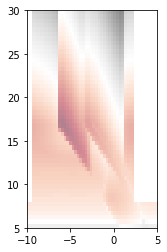

In [225]:
plt.imshow(Z, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
           cmap='RdGy', alpha=0.5)

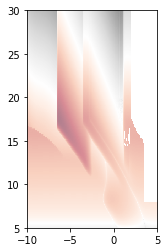

In [19]:
plt.imshow(Z, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
           cmap='RdGy', alpha=0.5)

In [226]:
name_ext = ''
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
#name_ext += '_extended_run'
name_ext += '_test'
np.shape(Z)
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'

    
np.savetxt(path, Z, delimiter='\t', fmt='%.4e')

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'


np.savetxt(path, X, delimiter='\t', fmt='%.4e')

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'


np.savetxt(path, Y, delimiter='\t', fmt='%.4e')


In [144]:
# name_ext = ''
# if case == 'lyc+reio':
#     name_ext += '_lyc_reio'
# elif case == 'bare':
#     name_ext += '_bare'
# if add_edges == 'yes':
#     name_ext += '_with_edges'
# np.shape(Z)
# path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'

    
# np.savetxt(path, Z, delimiter='\t', fmt='%.4e')

# path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'


# np.savetxt(path, X, delimiter='\t', fmt='%.4e')

# path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'


# np.savetxt(path, Y, delimiter='\t', fmt='%.4e')


In [4]:
case = 'lyc+reio'
name_ext = ''
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
#name_ext += '_extended_run'
name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

NameError: name 'add_edges' is not defined

In [228]:
NT = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/E_gamma_nt.dat')
z_nt = NT[:,1]
E_nt = NT[:,0]

# f_nt = interp1d(z_nt,E_nt)


ct = sd.cosmotherm()
cosmo = sd.cosmo()
X_dm = sd.dm_particle()
pi.set_dm_params_to_CT_pi_params(X_dm,ct)
pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)

G_nt = []
for zx in z_nt:
    G_nt.append(pi.find_Gamma_inj_for_injection_redshift_zX(zx,cosmo,ct))
G_nt = np.asarray(G_nt)

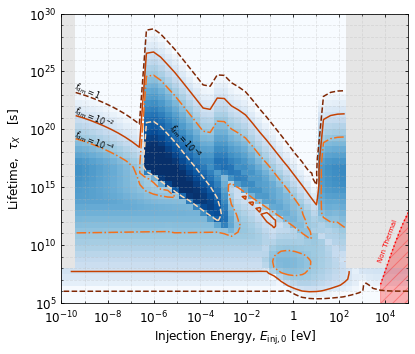

In [229]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 1.5


tau_values = Yf[:,0]
Einj_values = Xf[0]

# tau_values = np.linspace(5,30,500)
# Einj_values =np.linspace(-10,5,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

levels = [-8,-4,-2,0]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)

CS = ax.contour(Xf, Yf, Zf,levels,cmap = colormap,norm=normalize,linestyles=['--','-.','-','--'])


# CS.levels = [0.0001,0.01,1]


# # Label levels with specially formatted floats
# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = r'$f_\mathrm{dm}=%r$'
    
# fmt = ticker.LogFormatterMathtext()

#ax.clabel(CS, CS.levels, inline=10, fontsize=8,fmt=fmt)
 

# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


name_ext = ''

if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '_extended_run'
name_ext += '.pdf'

ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_ylim(tau_values[0],tau_values[-1])

ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.11,0.5)
ax.xaxis.set_label_coords(0.5,-.09)


# im = ax.imshow(Zf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#            cmap=colormap2,norm=normalize, alpha=1.)


im = ax.imshow(Zf, extent=[-10,5,tau_values[0],tau_values[-1]], origin='lower',
           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.5)


ax.text(0.03, 0.77, r'$f_\mathrm{dm}=1$' , rotation = -23,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(0.03, 0.69, r'$f_\mathrm{dm}=10^{-2}$' , rotation = -23,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(0.03, 0.61, r'$f_\mathrm{dm}=10^{-4}$' , rotation = -23,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(0.3, 0.63, r'$f_\mathrm{dm}=10^{-8}$' , rotation = -49,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(0.91, 0.29, r'Non Thermal' , rotation = 70,color='r',
        transform=ax.transAxes, fontsize=7, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.plot(np.log10(E_nt*1e3),np.log10(1./G_nt),c='red',ls=':')
ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)
ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='None',edgecolor='r')

ax.patch.set_color('grey') # or whatever color you like
ax.patch.set_alpha(.2)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$'])



fig.tight_layout()
#plt.legend()
#plt.savefig(path_to_figures + '/figures_for_paper_tau_a' + name_ext)

In [2]:
from scipy.interpolate import interp1d

def pi_run_pca_constraints_with_recfast(xinj_values,gammai_array,fdm,*args,**kwargs):
    PCA_eigen_modes = kwargs['PCA_modes']
    recfast = kwargs['recfast']
    f_dm_pca = {}
    f_dm_pca['curves'] = []
    f_dm_pca['xinj'] = []
    
    store_DXe_Xe = kwargs.get('store_DXe_Xe', 'no')
    
    
    z1 = PCA_eigen_modes.Xe_PCA_EigenModes['E1']['z']
    E1 = PCA_eigen_modes.Xe_PCA_EigenModes['E1']['values']
    z2 = PCA_eigen_modes.Xe_PCA_EigenModes['E2']['z']
    E2 = PCA_eigen_modes.Xe_PCA_EigenModes['E2']['values']
    z3 = PCA_eigen_modes.Xe_PCA_EigenModes['E3']['z']
    E3 = PCA_eigen_modes.Xe_PCA_EigenModes['E3']['values']
    
    f_E1 = interp1d(z1, E1)
    f_E2 = interp1d(z2, E2)
    f_E3 = interp1d(z3, E3)

    
    for xinj_asked in xinj_values:
        xdec = xinj_asked
        curves = {}
        curves['Gamma_inj'] = gammai_array
        if store_DXe_Xe == 'yes':
            curves['DXe_Xe'] = []

        #str_dir = str("%.3e"%xdec)

        recfast.rf_xinj0 = xdec
        recfast.rf_f_dec = fdm

        args = {}

        p_name = 'Gamma_dec'
        p_array = gammai_array

        args['param_values_array'] = p_array
        args['param_name'] = p_name
        args['save_recfast_results'] = 'no'
        #rf.save_dir_name = 'case_' + '_xdec_' + str_dir
        R = recfast.run_recfast_parallel(**args)


        recfast.rf_f_dec = 1.e-300
        #recfast.save_dir_name = 'case_no_inj' + '_xdec_' + str_dir
        R_no_inj = recfast.run_recfast_parallel(**args) 
        
        
        
        fdm_pca_array = []
        for k in range(len(R)):
            DXe_Xe = (R[k]['Xe']-R_no_inj[k]['Xe'])/R_no_inj[k]['Xe']
            z_Xe = R[k]['z']
            f_DXe_Xe = interp1d(z_Xe,DXe_Xe)
            
            min_z1 = max(np.min(z1),np.min(z_Xe))
            max_z1 = min(np.max(z1),np.max(z_Xe))

            min_z2 = max(np.min(z2),np.min(z_Xe))
            max_z2 = min(np.max(z2),np.max(z_Xe))

            min_z3 = max(np.min(z3),np.min(z_Xe))
            max_z3 = min(np.max(z3),np.max(z_Xe))
            
            new_z_min = max(min_z1,min_z2,min_z3)
            new_z_max = min(max_z1,max_z2,max_z3)
            
            new_z_min = 1e-5
            new_z_max = 4e3
            new_z = np.linspace(new_z_min,new_z_max,500)

            
            new_z1 = new_z#np.linspace(min_z1,max_z1,5000)
            new_z2 = new_z#np.linspace(min_z2,max_z2,5000)
            new_z3 = new_z#np.linspace(min_z3,max_z3,5000)
            
            zeta1 = f_DXe_Xe(new_z1)
            zeta2 = f_DXe_Xe(new_z2)
            zeta3 = f_DXe_Xe(new_z3)

            integrand_rho1 = zeta1*f_E1(new_z1)
            integrand_rho2 = zeta2*f_E2(new_z2)
            integrand_rho3 = zeta3*f_E3(new_z3)
            
            

            rho1 = np.trapz(integrand_rho1, x=new_z1)/fdm
            rho2 = np.trapz(integrand_rho2, x=new_z2)/fdm
            rho3 = np.trapz(integrand_rho3, x=new_z3)/fdm
            #print(rho1,rho2,rho3)

            sigma1 = 0.12
            sigma2 = 0.19
            sigma3 = 0.35

            fdm_pca_lim = 2.*1./np.sqrt(rho1**2/sigma1**2+rho2**2/sigma2**2+rho3**2/sigma3**2)
            fdm_pca_array.append(fdm_pca_lim)
            if store_DXe_Xe == 'yes':
                curves['DXe_Xe'].append([new_z,f_DXe_Xe(new_z)])
                
            
        fdm_pca_array = np.asarray(fdm_pca_array)
        curves['fdm'] = fdm_pca_array
        
        
        
        
        
        f_dm_pca['xinj'].append(xdec)
        f_dm_pca['curves'].append(curves)
    return f_dm_pca

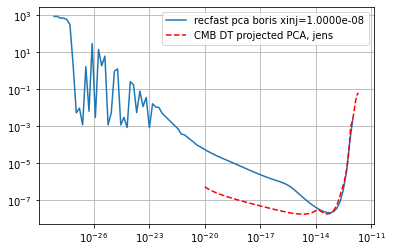

In [6]:

a_dict = {}
a_dict['PCA_modes'] = sd.Xe_PCA_EigenModes()
a_dict['store_DXe_Xe'] = 'no'
rf = sd.recfast()
rf.rf_zstart = 1e6
rf.rf_zend = 1e-5
rf.rf_include_correction_function = 0

rf.rf_Reionization_model = 1
a_dict['recfast'] = rf
#rf.rf_T0 = 2.7255
#rf.rf_Yp = 0.245407
#rf.rf_N_eff = 3.046
#rf.rf_Omega_m = 0.312331
#rf.rf_Omega_b = 0.0491137
#rf.rf_h = 0.675422


gi_array = np.logspace(np.log10(1e-29),np.log10(1e-12),100)
xdec = [1e-8]



rf_fdm_pca = pi_run_pca_constraints_with_recfast(xdec,gi_array,1e-7,**a_dict)

for i in range(len(rf_fdm_pca['curves'])):
    plt.plot(rf_fdm_pca['curves'][i]['Gamma_inj'],rf_fdm_pca['curves'][i]['fdm'],label='recfast pca boris xinj=%.4e'%rf_fdm_pca['xinj'][i])



PCA = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/fdm_PCA_limits.dat')
plt.plot(PCA[:,0],PCA[:,1],c='r',ls='--',label='CMB DT projected PCA, jens')

# gamma_inj = np.logspace(-20,-12,100)[5:]
# for xinj in [1e-8,1e-4,1e-2,1e2, 1e4, 1e6][0:1]:
#     fdm_pca = []
#     fdm_pca_recfast = []
#     #xinj = 1e-8
#     z_asked = np.logspace(np.log10(1e-2),np.log10(4000),5000)
#     for gamma_asked in gamma_inj:
#         #S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_xe_history)
# #         S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_extended_run)
# #         fdm_pca.append(S_xe_history['fdm_pca_lim'])
#         xdec = [xinj]
#         gi_array = [gamma_asked]
#         fdm_pca_recfast_p = pi_run_pca_constraints_with_recfast(xdec,gi_array,S_xe_history['fdm'],**a_dict)
#         fdm_pca_recfast.append(fdm_pca_recfast_p['curves'][0]['fdm'][0])
#     fdm_pca = np.asarray(fdm_pca)
#     fdm_pca_recfast = np.asarray(fdm_pca_recfast)
#     #plt.plot(gamma_inj,fdm_pca,label=r'CT, $x_\mathrm{inj}=%.2e$, boris'%xinj)
#     plt.plot(gamma_inj,fdm_pca_recfast,label=r'rf with fdm from CT, $x_\mathrm{inj}=%.2e$, boris'%xinj)



plt.loglog()
plt.grid(which='both')
plt.legend()
#plt.savefig(path_to_figures + 'pca-comparison_fdm_1e-5_w_reio.pdf')

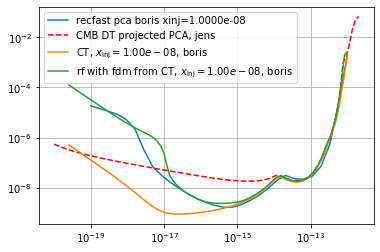

In [288]:

a_dict = {}
a_dict['PCA_modes'] = sd.Xe_PCA_EigenModes()
a_dict['store_DXe_Xe'] = 'no'
rf = sd.recfast()
rf.rf_zstart = 1e6
rf.rf_zend = 1e-5
rf.rf_include_correction_function = 0

rf.rf_Reionization_model = 1
a_dict['recfast'] = rf
#rf.rf_T0 = 2.7255
#rf.rf_Yp = 0.245407
#rf.rf_N_eff = 3.046
#rf.rf_Omega_m = 0.312331
#rf.rf_Omega_b = 0.0491137
#rf.rf_h = 0.675422


gi_array = np.logspace(np.log10(1e-19),np.log10(1e-12),30)
xdec = [1e-8]



rf_fdm_pca = pi_run_pca_constraints_with_recfast(xdec,gi_array,1e-7,**a_dict)

for i in range(len(rf_fdm_pca['curves'])):
    plt.plot(rf_fdm_pca['curves'][i]['Gamma_inj'],rf_fdm_pca['curves'][i]['fdm'],label='recfast pca boris xinj=%.4e'%rf_fdm_pca['xinj'][i])



PCA = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/fdm_PCA_limits.dat')
plt.plot(PCA[:,0],PCA[:,1],c='r',ls='--',label='CMB DT projected PCA, jens')

gamma_inj = np.logspace(-20,-12,100)[5:]
for xinj in [1e-8,1e-4,1e-2,1e2, 1e4, 1e6][0:1]:
    fdm_pca = []
    fdm_pca_recfast = []
    #xinj = 1e-8
    z_asked = np.logspace(np.log10(1e-2),np.log10(4000),5000)
    for gamma_asked in gamma_inj:
        #S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_xe_history)
        S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_extended_run)
        fdm_pca.append(S_xe_history['fdm_pca_lim'])
        xdec = [xinj]
        gi_array = [gamma_asked]
        fdm_pca_recfast_p = pi_run_pca_constraints_with_recfast(xdec,gi_array,S_xe_history['fdm'],**a_dict)
        fdm_pca_recfast.append(fdm_pca_recfast_p['curves'][0]['fdm'][0])
    fdm_pca = np.asarray(fdm_pca)
    fdm_pca_recfast = np.asarray(fdm_pca_recfast)
    plt.plot(gamma_inj,fdm_pca,label=r'CT, $x_\mathrm{inj}=%.2e$, boris'%xinj)
    plt.plot(gamma_inj,fdm_pca_recfast,label=r'rf with fdm from CT, $x_\mathrm{inj}=%.2e$, boris'%xinj)



plt.loglog()
plt.grid(which='both')
plt.legend()
#plt.savefig(path_to_figures + 'pca-comparison_fdm_1e-5_w_reio.pdf')

In [295]:
firas = sd.firas()
edges = sd.edges()
a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges
a_dict['add_edges'] = 'yes'
a_dict['PCA_modes'] = sd.Xe_PCA_EigenModes()
a_dict['store_DXe_Xe'] = 'no'
rf = sd.recfast()
rf.rf_zstart = 1e6
rf.rf_zend = 1e-5
rf.rf_include_correction_function = 0
rf.rf_Reionization_model = 1
a_dict['recfast'] = rf
a_dict['sd_lib'] = sd_lib_lyc_reio
for gamma in Gamma_values[9:10]:
    print(gamma)
    for xinj in xi_array[0:1]:
        print(xinj)
        f_dm_fisher = sd.pi_run_fisher_constraints([gamma],[xinj],**a_dict)
        fdm_value = f_dm_fisher['curves'][0]['fdm'][0]
        print(fdm_value)
        f_dm_pca = pi_run_pca_constraints_with_recfast([xinj],[gamma],fdm_value,**a_dict)
        fdm_pca_value = f_dm_pca['curves'][0]['fdm'][0]
        print(fdm_pca_value)
        fdm_results = get_fdm_constraints_at_Gamma_and_xinj(gamma,xinj,**a_dict)
        print(fdm_results)
        

1e-17
1e-06
5.043811692548834e-07
2.400312204527701e-08
{'fdm_fisher': 5.043811692548834e-07, 'fdm_Xe_pca': 2.400312204527701e-08}


In [313]:
firas = sd.firas()
edges = sd.edges()
a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges
a_dict['add_edges'] = 'yes'
a_dict['PCA_modes'] = sd.Xe_PCA_EigenModes()
a_dict['store_DXe_Xe'] = 'no'
rf = sd.recfast()
rf.rf_zstart = 1e6
rf.rf_zend = 1e-5
rf.rf_include_correction_function = 0
rf.rf_Reionization_model = 1
a_dict['recfast'] = rf
a_dict['sd_lib'] = sd_lib_lyc_reio
fdm_fisher = []
fdm_pca = []

Nx = 50
xi_array = np.logspace(-6,2,Nx)

for gamma in Gamma_values[9:10]:
    print(gamma)
    for xinj in xi_array:
        #print(xinj)
    #    f_dm_fisher = sd.pi_run_fisher_constraints([gamma],[xinj],**a_dict)
    #    fdm_value = f_dm_fisher['curves'][0]['fdm'][0]
    #    print(fdm_value)
    #    f_dm_pca = pi_run_pca_constraints_with_recfast([xinj],[gamma],fdm_value,**a_dict)
    #    fdm_pca_value = f_dm_pca['curves'][0]['fdm'][0]
    #    print(fdm_pca_value)
    
        fdm_results = get_fdm_constraints_at_Gamma_and_xinj(gamma,xinj,**a_dict)
        fdm_fisher.append(fdm_results['fdm_fisher'])
        fdm_pca.append(fdm_results['fdm_Xe_pca'])
fdm_fisher = np.asarray(fdm_fisher)
fdm_pca = np.asarray(fdm_pca)


1e-17


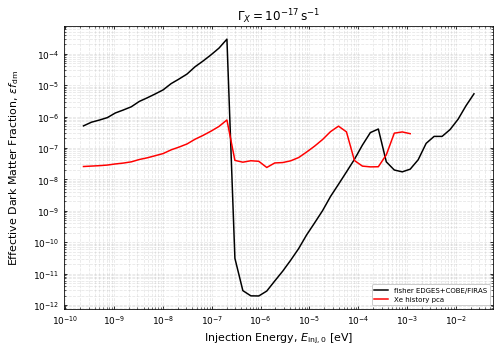

In [319]:
photon_injection_case = 'lyc_reio'

fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
label_size = 9
title_size = 11
legend_size = 25
handle_length = 1.5

ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(label_fdm,size=title_size)
ax.set_xlabel(label_injection_energy,size=title_size)
ax.yaxis.set_label_coords(-.10,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


ax.plot(xinj_to_Einj*xi_array,fdm_fisher,c='k',label='fisher EDGES+COBE/FIRAS',ls='-', marker='None')
ax.plot(xinj_to_Einj*xi_array,fdm_pca,c='r',label='Xe history pca',ls='-', marker='None')
plt.title(r'$\Gamma_X=$'+scientific_notation(gamma)+r'$\,\mathrm{s^{-1}}$')

ax.legend(loc=4,ncol=1,frameon=True,framealpha=1.,fontsize = 7)


# ax.add_artist(leg2).tight_layout(pad=3.0)
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.savefig(path_to_figures + '/figures_for_paper_fdm_fisher_edges_'+photon_injection_case+'_pca_vs_fisher.pdf')
plt.show()
plt.close(fig)

In [302]:
Nx = 20
xi_array = np.logspace(-6,6,Nx)

Gamma_values = [1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16,1e-17]
gamma_labels = [r'$10^{-8}$',r'$10^{-9}$',r'$10^{-10}$',r'$10^{-11}$',r'$10^{-12}$',r'$10^{-13}$',r'$10^{-14}$',r'$10^{-15}$',r'$10^{-16}$',r'$10^{-17}$']






firas = sd.firas()
edges = sd.edges()
a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges
a_dict['add_edges'] = 'yes'

f_dm_fisher_lyc_reio_with_edges = sd.pi_run_fisher_constraints(Gamma_values,xi_array,sd_lib_lyc_reio,**a_dict)

a_dict['add_edges'] = 'no'

f_dm_fisher_lyc_reio_no_edges = sd.pi_run_fisher_constraints(Gamma_values,xi_array,sd_lib_lyc_reio,**a_dict)



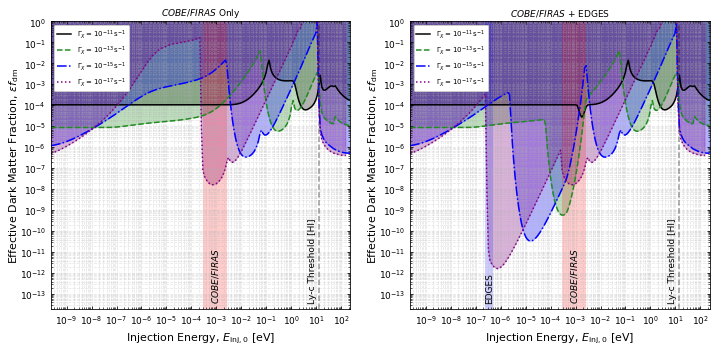

In [236]:
# photon_injection_case = 'bare'
# if photon_injection_case == 'bare':
#     f_dm_fisher = f_dm_fisher_bare
#     case = 'bare'
# if photon_injection_case == 'lyc':
#     f_dm_fisher = f_dm_fisher_lyc
#     case = 'lyc'
# if photon_injection_case == 'lyc_reio':
photon_injection_case = 'lyc_reio'
#     f_dm_fisher = f_dm_fisher_lyc_reio
#  
case = 'lyc+reio'

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

mklist = iter(['o','s','d','v','>','o','s','d','v','>'])
colors = iter(['k','forestgreen','b','purple','green','magenta','r','b','orange','green','magenta'])
lstyles = iter(['-','--','-.',':','-','--','-.',':','-','--','-.',':'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
label_size = 9
title_size = 11
legend_size = 25
handle_length = 1.5

for ax in (ax1,ax2):
    ax.set_xscale('log')
    ax.set_yscale('log')


    ax.set_ylabel(label_fdm,size=title_size)
    ax.set_xlabel(label_injection_energy,size=title_size)
    ax.yaxis.set_label_coords(-.10,0.5)


    ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(True) #(3)

    ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
    ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
    ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
    ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)

    # manipulate x-axis ticks and labels
    ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(True)

    ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

    
    if ax == ax2:
        ax.axvspan(1.e-3*xinj_to_Einj, 2e-3*xinj_to_Einj,ymin=0.,ymax=1, facecolor='blue', alpha=0.2)
    #ax.axvspan(0.5*xinj_to_Einj, 105*xinj_to_Einj,ymin=0.,ymax=0.1,  facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
    ax.axvspan(1.2*xinj_to_Einj, 11.2*xinj_to_Einj,ymin=0.,ymax=1, facecolor='red', alpha=0.2)
    ax.axvline(5.7895e4*xinj_to_Einj,ls='--',alpha=0.4,c='k')
i = 0
#color=iter(cm.viridis(np.linspace(0.7,0,len(Gamma_values))))
#for gamma in np.flip(Gamma_values):
for gamma in np.flip(Gamma_values):
    if i<=2 or i%2==0:
        i += 1
        continue
    col = next(colors)
    mk = next(mklist)
    #ax.plot(f_dm_high_z['curves'][i]['x'],f_dm_high_z['curves'][i]['mu'],c=col,label=r'$\Gamma_X=$'+scientific_notation(f_dm_high_z['Gamma_inj'][i])+r'$\,\mathrm{s^{-1}}$',ls='None', marker=mk,markersize=3)
    style = next(lstyles)
    f_dm_fisher = f_dm_fisher_lyc_reio_no_edges
    ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],f_dm_fisher['curves'][i]['fdm'],c=col,
             label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=style, marker='None')
    ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],-f_dm_fisher['curves'][i]['fdm'],c=col,ls=style, marker='None')
    ax1.fill_between(xinj_to_Einj*f_dm_fisher['curves'][i]['x'], np.abs(f_dm_fisher['curves'][i]['fdm']),1e100,color=col,alpha=0.3)

    f_dm_fisher = f_dm_fisher_lyc_reio_with_edges
    ax2.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],f_dm_fisher['curves'][i]['fdm'],c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=style, marker='None')
    ax2.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],-f_dm_fisher['curves'][i]['fdm'],c=col,ls=style, marker='None')
    ax2.fill_between(xinj_to_Einj*f_dm_fisher['curves'][i]['x'], np.abs(f_dm_fisher['curves'][i]['fdm']),1e100,color=col,alpha=0.3)


    i += 1

# ax2.text(0.05, 0.95, case , transform=ax2.transAxes, fontsize=9, verticalalignment='top',
#           bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))

ax1.text(0.86, 0.02, 'Ly-c Threshold [HI]' , transform=ax1.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
ax1.text(0.53, 0.02, r'$COBE/FIRAS$' , transform=ax1.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
ax2.text(0.53, 0.02, r'$COBE/FIRAS$' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
ax2.text(0.25, 0.02, r'EDGES' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)

ax2.text(0.86, 0.02, 'Ly-c Threshold [HI]' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)

ax1.set_ylim(2.e-14,1e0)
ax1.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)

ax2.set_ylim(2.e-14,1e0)
ax2.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)
ax1.set_title(r'$COBE/FIRAS$ Only',fontsize=9)
ax2.set_title(r'$COBE/FIRAS$ + EDGES',fontsize=9)

#leg1 = plt.legend(loc=3,ncol=2,frameon=True,framealpha=0.6,fontsize = 9)
#legend_elements = [Line2D([0], [0], marker='o', color='k', label='best-fit to CT',ls='None',
#                          markerfacecolor='None', markersize=5)]
#leg2 = plt.legend(handles=legend_elements, loc=(0.745,0.6))
ax1.legend(loc=2,ncol=1,frameon=True,framealpha=1.,fontsize = 7)
ax2.legend(loc=2,ncol=1,frameon=True,framealpha=1.,fontsize = 7)


# ax.add_artist(leg2).tight_layout(pad=3.0)
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)
#plt.savefig(path_to_figures + '/figures_for_paper_fdm_fisher_edges_'+photon_injection_case+'.pdf')
plt.show()
plt.close(fig)

In [94]:
xdec = 1.e-8
rf = sd.recfast()
rf.rf_xinj0 = xdec
ngamma = 30
gamma = [1e-20,1e-17, 1e-14, 1e-13, 1e-8]#np.logspace(-20,-9,ngamma)
fdm = 1e-6
rf.rf_f_dec = fdm*1e0
rf.rf_Reionization_model = 0
rf.rf_zstart = 1e6
rf.rf_zend = 1e-5
args = {}

p_name = 'Gamma_dec'
#p_array = [gamma]
p_array = gamma
str_dir = str("%.3e"%xdec) +'_with_collisions_no_reio'
args['param_values_array'] = p_array
args['param_name'] = p_name
args['save_recfast_results'] = 'yes'
rf.save_dir_name = 'case' + '_xdec_' + str_dir
R = rf.run_recfast_parallel(**args)


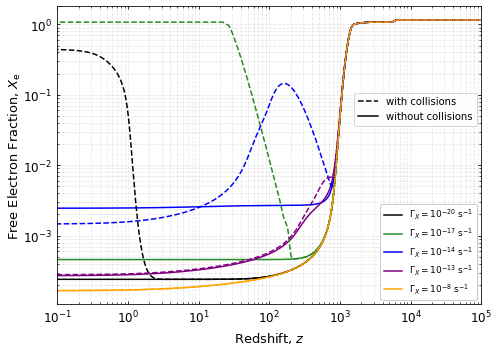

In [105]:

#mklist = iter(['o','s','d','v','>','o','s','d','v','>'])
lstyles = iter(['-','--','-.',':','-','--','-.',':','-','--','-.',':','-','--','-.',':','-','--','-.',':','-','--','-.',':'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, (ax2) = plt.subplots(1,1,figsize=(7,5))
label_size = 12
title_size = 13
legend_size = 25
handle_length = 1.5

ax = ax2
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(label_xe,size=title_size)
ax.set_xlabel(label_redshift,size=title_size)
ax.yaxis.set_label_coords(-.08,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


colors = iter(['k','forestgreen','b','purple','orange','grey','r','b','orange','green','magenta','k','forestgreen','b','purple','green','magenta','r','b','orange','green','magenta'])
gamma_values = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/recfast_outputs/case_xdec_1.000e-08_without_collisions_no_reio/case_xdec_1.000e-08_without_collisions_no_reio_p_recfast.txt')
Xe_values = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/recfast_outputs/case_xdec_1.000e-08_without_collisions_no_reio/case_xdec_1.000e-08_without_collisions_no_reio_Xe_recfast.txt')
Xe_redshifts = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/recfast_outputs/case_xdec_1.000e-08_without_collisions_no_reio/case_xdec_1.000e-08_without_collisions_no_reio_z_recfast.txt')
for i in range(np.shape(Xe_values)[0]):
    col = next(colors)
    ax.plot(Xe_redshifts[i,:],Xe_values[i,:],c=col,label=r'$\Gamma_X=$'+scientific_notation(gamma_values[i])+r' $\mathrm{s}^{-1}$')

colors = iter(['k','forestgreen','b','purple','orange','grey','r','b','orange','green','magenta','k','forestgreen','b','purple','green','magenta','r','b','orange','green','magenta'])


    
Xe_values = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/recfast_outputs/case_xdec_1.000e-08_with_collisions_no_reio/case_xdec_1.000e-08_with_collisions_no_reio_Xe_recfast.txt')
Xe_redshifts = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/recfast_outputs/case_xdec_1.000e-08_with_collisions_no_reio/case_xdec_1.000e-08_with_collisions_no_reio_z_recfast.txt')
for i in range(np.shape(Xe_values)[0]):
    col = next(colors)
    ax.plot(Xe_redshifts[i,:],Xe_values[i,:],ls='--',c=col)

#ax2.set_ylim(2.e-4,1e9)
#ax2.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)
# ax1.set_title(r'$COBE/FIRAS$ Only',fontsize=9)
#ax2.set_title(r'$COBE/FIRAS$ + EDGES',fontsize=9)
ax2.set_xlim(1e-1,1e5)
#leg1 = plt.legend(loc=3,ncol=2,frameon=True,framealpha=0.6,fontsize = 9)
legend_elements = [Line2D([0], [0], ls='--',marker='None', color='k', label='with collisions',
                          markerfacecolor='None', markersize=5),
                  Line2D([0], [0], ls='-',marker='None', color='k', label='without collisions',
                          markerfacecolor='None', markersize=5)]
leg2 = plt.legend(handles=legend_elements, loc=(0.7,0.6))
# ax1.legend(loc=2,ncol=1,frameon=True,framealpha=1.,fontsize = 7)
ax2.legend(loc=4,ncol=1,frameon=True,framealpha=1.,fontsize = 9)


ax.add_artist(leg2)
fig.tight_layout()
# plt.subplots_adjust(wspace=0.2)
plt.savefig(path_to_figures + '/figures_for_paper_Xe_collisions_fdm_1e-6_xdec_1e-8.pdf')
plt.show()
plt.close(fig)

In [2]:
sd_lib_extended_run = pi.specdist_ct_spectra_lib()
pi.load_ct_spectra_lib('extended_run_xe_history_010820',sd_lib_extended_run)

In [216]:
ct = sd.cosmotherm()
cosmo = sd.cosmo()
firas = sd.firas()
X_dm = sd.dm_particle()
rf = sd.recfast()
PCA_modes = sd.Xe_PCA_EigenModes()

In [4]:
PCA_modes.Xe_PCA_EigenModes['E1']['z']

{'z': array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 3.9998e+03, 3.9999e+03,
        4.0000e+03]),
 'values': array([ 6.70558e-05,  6.70781e-05,  6.71005e-05, ..., -1.08672e-07,
        -1.08551e-07, -1.08431e-07])}

In [56]:
max(1,2,3)

3

In [213]:
np.logspace(-8,-20,80)[0:40]

array([1.00000000e-08, 7.04857404e-09, 4.96823959e-09, 3.50190046e-09,
       2.46834047e-09, 1.73982805e-09, 1.22633068e-09, 8.64388262e-10,
       6.09270466e-10, 4.29448799e-10, 3.02700165e-10, 2.13360453e-10,
       1.50388695e-10, 1.06002585e-10, 7.47167068e-11, 5.26646239e-11,
       3.71210501e-11, 2.61650470e-11, 1.84426271e-11, 1.29994222e-11,
       9.16273901e-12, 6.45842443e-12, 4.55226828e-12, 3.20870000e-12,
       2.26167595e-12, 1.59415904e-12, 1.12365480e-12, 7.92016405e-13,
       5.58258627e-13, 3.93492726e-13, 2.77356261e-13, 1.95496614e-13,
       1.37797236e-13, 9.71274020e-14, 6.84609684e-14, 4.82552204e-14,
       3.40130494e-14, 2.39743497e-14, 1.68984979e-14, 1.19110313e-14])

In [212]:
np.logspace(-8,-20,80)[40:80]

array([8.39557862e-15, 5.91768575e-15, 4.17112461e-15, 2.94004806e-15,
       2.07231465e-15, 1.46068632e-15, 1.02957557e-15, 7.25703961e-16,
       5.11517810e-16, 3.60547115e-16, 2.54134304e-16, 1.79128445e-16,
       1.26260011e-16, 8.89953035e-17, 6.27289986e-17, 4.42149991e-17,
       3.11652694e-17, 2.19670709e-17, 1.54836526e-17, 1.09137671e-17,
       7.69264957e-18, 5.42222101e-18, 3.82189262e-18, 2.69388931e-18,
       1.89880782e-18, 1.33838875e-18, 9.43373222e-19, 6.64943600e-19,
       4.68690419e-19, 3.30359912e-19, 2.32856630e-19, 1.64130720e-19,
       1.15688753e-19, 8.15440740e-20, 5.74769442e-20, 4.05130497e-20,
       2.85559230e-20, 2.01278538e-20, 1.41872667e-20, 1.00000000e-20])

In [5]:
a_dict = {}
a_dict['PCA_modes'] = sd.Xe_PCA_EigenModes()
a_dict['store_DXe_Xe'] = 'no'
rf = sd.recfast()
rf.rf_zstart = 1e6
rf.rf_zend = 1e-5
rf.rf_include_correction_function = 0

rf.rf_Reionization_model = 1
#rf.rf_T0 = 2.7255
#rf.rf_Yp = 0.245407
#rf.rf_N_eff = 3.046
#rf.rf_Omega_m = 0.312331
#rf.rf_Omega_b = 0.0491137
#rf.rf_h = 0.675422


gi_array = np.logspace(np.log10(1e-19),np.log10(1e-12),30)
xdec = [1e-8]

rf_fdm_pca = pi_run_pca_constraints_with_recfast(xdec,gi_array,rf,1e-7,**a_dict)

In [29]:
rf_fdm_pca['xinj']

[1e-15, 1e-10, 1e-08, 1e-05]

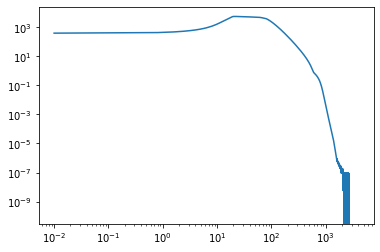

In [66]:
plt.plot(rf_fdm_pca['curves'][0]['DXe_Xe'][0][0],rf_fdm_pca['curves'][0]['DXe_Xe'][0][1])
plt.loglog()
np.savetxt(path_to_figures + 'z_and_DXe_Xe_Gamma_1e-15_xdec_1e-8_fdm_1e-6_boris.txt',
          np.c_[rf_fdm_pca['curves'][0]['DXe_Xe'][0][0],rf_fdm_pca['curves'][0]['DXe_Xe'][0][1]])

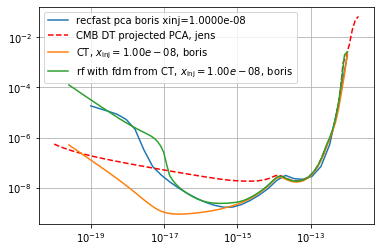

In [233]:

a_dict = {}
a_dict['PCA_modes'] = sd.Xe_PCA_EigenModes()
a_dict['store_DXe_Xe'] = 'no'
rf = sd.recfast()
rf.rf_zstart = 1e6
rf.rf_zend = 1e-5
rf.rf_include_correction_function = 0

rf.rf_Reionization_model = 1
#rf.rf_T0 = 2.7255
#rf.rf_Yp = 0.245407
#rf.rf_N_eff = 3.046
#rf.rf_Omega_m = 0.312331
#rf.rf_Omega_b = 0.0491137
#rf.rf_h = 0.675422


gi_array = np.logspace(np.log10(1e-19),np.log10(1e-12),30)
xdec = [1e-8]



rf_fdm_pca = pi_run_pca_constraints_with_recfast(xdec,gi_array,rf,1e-7,**a_dict)

for i in range(len(rf_fdm_pca['curves'])):
    plt.plot(rf_fdm_pca['curves'][i]['Gamma_inj'],rf_fdm_pca['curves'][i]['fdm'],label='recfast pca boris xinj=%.4e'%rf_fdm_pca['xinj'][i])



PCA = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/fdm_PCA_limits.dat')
plt.plot(PCA[:,0],PCA[:,1],c='r',ls='--',label='CMB DT projected PCA, jens')

gamma_inj = np.logspace(-20,-12,100)[5:]
for xinj in [1e-8,1e-4,1e-2,1e2, 1e4, 1e6][0:1]:
    fdm_pca = []
    fdm_pca_recfast = []
    #xinj = 1e-8
    z_asked = np.logspace(np.log10(1e-2),np.log10(4000),5000)
    for gamma_asked in gamma_inj:
        #S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_xe_history)
        S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_extended_run)
        fdm_pca.append(S_xe_history['fdm_pca_lim'])
        xdec = [xinj]
        gi_array = [gamma_asked]
        fdm_pca_recfast_p = pi_run_pca_constraints_with_recfast(xdec,gi_array,rf,S_xe_history['fdm'],**a_dict)
        fdm_pca_recfast.append(fdm_pca_recfast_p['curves'][0]['fdm'][0])
    fdm_pca = np.asarray(fdm_pca)
    fdm_pca_recfast = np.asarray(fdm_pca_recfast)
    plt.plot(gamma_inj,fdm_pca,label=r'CT, $x_\mathrm{inj}=%.2e$, boris'%xinj)
    plt.plot(gamma_inj,fdm_pca_recfast,label=r'rf with fdm from CT, $x_\mathrm{inj}=%.2e$, boris'%xinj)



plt.loglog()
plt.grid(which='both')
plt.legend()
#plt.savefig(path_to_figures + 'pca-comparison_fdm_1e-5_w_reio.pdf')

In [13]:
S_xe_history['fdm_pca_lim']

0.002479527971709889

In [71]:
xi_array = np.logspace(np.log10(1e-8),np.log10(1e7),1)
rf = sd.recfast()
rf.rf_f_dec = 1.e-300
for Gamma_X in np.logspace(-15,-17,10)[0:1]:
    str_gamma = str("%.3e"%Gamma_X)
    print(str_gamma)

    rf.rf_Gamma_dec = Gamma_X
    #ct.ct_x_dec = 1e7
    args = {}
    
    p_name = 'xinj0'
    #p_name = 'zend'
    p_array = xi_array
    #p_array = zi_array
    args['param_values_array'] = p_array
    args['param_name'] = p_name
    args['save_recfast_results'] = 'yes'
    rf.save_dir_name = 'case_test' + '_G_' + str_gamma
    R = rf.run_recfast_parallel(**args)
    

1.000e-15


In [50]:
R

[{'xinj0': 1e-08,
  'z': array([2.5000000e+04, 2.4840017e+04, 2.4680033e+04, ..., 1.0260186e-02,
         1.0129258e-02, 1.0000000e-02]),
  'Xe': array([1.1637747e+00, 1.1637747e+00, 1.1637747e+00, ..., 1.7114298e-04,
         1.7114247e-04, 1.7114197e-04])}]

In [10]:
gi_array = np.logspace(np.log10(1e-17),np.log10(1e-8),30)

xdec = 1.e-8
str_dir = str("%.3e"%xdec)
rf = sd.recfast()
rf.rf_xinj0 = xdec
rf.rf_f_dec = 1.e-5
rf.rf_Reionization_model = 1
args = {}

p_name = 'Gamma_dec'
p_array = gi_array

args['param_values_array'] = p_array
args['param_name'] = p_name
args['save_recfast_results'] = 'no'
rf.save_dir_name = 'case_' + '_xdec_' + str_dir
R = rf.run_recfast_parallel(**args)


rf.rf_f_dec = 1.e-300
rf.save_dir_name = 'case_no_inj' + '_xdec_' + str_dir
R_no_inj = rf.run_recfast_parallel(**args)

In [15]:
i = 0
R[i]['z']-R_no_inj[i]['z']

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
for i in range(len(R)):
    gamma = R[0]['Gamma_dec']

1e-17

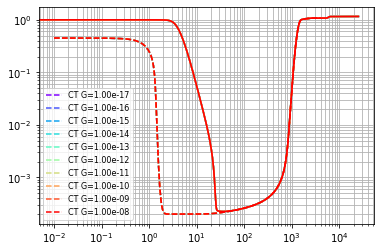

In [28]:
gi_array = np.logspace(np.log10(1e-17),np.log10(1e-8),10)
colors = iter(cm.rainbow(np.linspace(0, 1, len(gi_array))))
z_asked = np.logspace(np.log10(1e-2),np.log10(4000),5000)
xdec = 1.e-8
rf = sd.recfast()
rf.rf_xinj0 = xdec

rf.rf_Reionization_model = 1
for i in range(len(gi_array)):
    col = next(colors)
    #plt.plot(R[i]['z'],R[i]['Xe'],c=col)
    #plt.plot(R_no_inj[i]['z'],R_no_inj[i]['Xe'],ls='--',c=col)
    #gamma = R[i]['Gamma_dec']
    gamma = gi_array[i]
    xinj = xdec
    S_xe_history = pi.GetXeHistory(gamma,xinj,z_asked,sd_lib_extended_run)
    
    plt.plot(S_xe_history['z'],np.abs(S_xe_history['Xe_no_inj']),c=col,ls='--',label='CT G=%.2e'%gamma)
    fdm = S_xe_history['fdm']
    rf.rf_f_dec = fdm*1e-100
    args = {}

    p_name = 'Gamma_dec'
    p_array = [gamma]

    args['param_values_array'] = p_array
    args['param_name'] = p_name
    args['save_recfast_results'] = 'no'
    rf.save_dir_name = 'case_' + '_xdec_' + str_dir
    R = rf.run_recfast_parallel(**args)
    plt.plot(R[0]['z'],R[0]['Xe'],c=col)
    
plt.loglog()
plt.grid(which='both')
plt.legend(loc=3,fontsize=8)
plt.savefig(path_to_figures + 'CT_recfast_comparison_no_inj.pdf')

In [114]:
Xe_values_no_inj = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/ct_spectra/extended_run_xe_history_120820_hubble_G_1.000e-14/spectra_extended_run_xe_history_120820_hubble_G_1.000e-14_Xe_values_ct.txt')
Xe_redshifts_no_inj = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/ct_spectra/extended_run_xe_history_120820_hubble_G_1.000e-14/spectra_extended_run_xe_history_120820_hubble_G_1.000e-14_Xe_redshifts_ct.txt')

In [ ]:
[1e-17,1e-14,1e-11,1e-8]

In [209]:
G= 1.e-15
str_gamma = "%.3e"%G
print(str_gamma)
Xe_values = open('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/ct_spectra/extended_run_xe_history_120820_G_'+str_gamma+'/spectra_extended_run_xe_history_120820_G_'+str_gamma+'_Xe_values_ct.txt').readlines()
Xe_redshifts = open('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/ct_spectra/extended_run_xe_history_120820_G_'+str_gamma+'/spectra_extended_run_xe_history_120820_G_'+str_gamma+'_Xe_redshifts_ct.txt').readlines()
xinj_values = open('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/ct_spectra/extended_run_xe_history_120820_G_'+str_gamma+'/spectra_extended_run_xe_history_120820_G_'+str_gamma+'_xinj_ct.txt').readlines()
finj_values = open('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/ct_spectra/extended_run_xe_history_120820_G_'+str_gamma+'/spectra_extended_run_xe_history_120820_G_'+str_gamma+'_finj_ct.txt').readlines()

1.000e-15


0.0001
7.687022900763359e-08


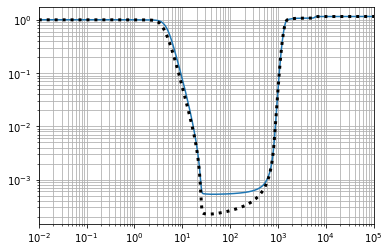

In [211]:
for i in range(len(Xe_values)-1):
    #i=7
    z = [float(s) for s in Xe_redshifts[i+1].split()]
    Xe = [float(s) for s in Xe_values[i+1].split()]
    plt.plot(z,Xe)


    xinj = float(xinj_values[i+1].split()[0])
    finj = float(finj_values[i+1].split()[0])
    print(xinj)


    xdec = xinj
    rf = sd.recfast()
    rf.rf_xinj0 = xdec
    gamma = G
    fdm = finj/1.31e4*xdec
    print(fdm)
    rf.rf_f_dec = fdm*1e-100
    rf.rf_Reionization_model = 1
    rf.rf_zstart = 1e6
    rf.rf_zend = 1e-5
    args = {}

    p_name = 'Gamma_dec'
    p_array = [gamma]

    args['param_values_array'] = p_array
    args['param_name'] = p_name
    args['save_recfast_results'] = 'no'
    rf.save_dir_name = 'case_' + '_xdec_' + str_dir
    try:
        R = rf.run_recfast_parallel(**args)
        plt.plot(R[0]['z'],R[0]['Xe'],c='k',ls=':',lw=3)
    except:
        pass
plt.loglog()
plt.xlim(1e-2,1e5)
plt.grid(which='both')
plt.savefig(path_to_figures+'Xe_comp.pdf')

0.0001
4.6129770992366416e-07


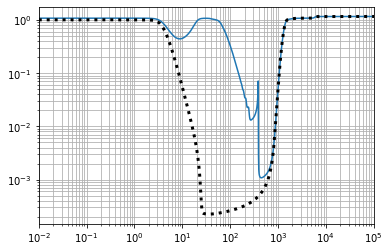

In [208]:
i=2
z = [float(s) for s in Xe_redshifts[i+1].split()]
Xe = [float(s) for s in Xe_values[i+1].split()]
plt.plot(z,Xe)


xinj = float(xinj_values[i+1].split()[0])
finj = float(finj_values[i+1].split()[0])
print(xinj)

xdec = xinj
rf = sd.recfast()
rf.rf_xinj0 = xdec
gamma = G
fdm = finj/1.31e4*xdec
rf.rf_f_dec = fdm*1e-100
print(fdm)
rf.rf_Reionization_model = 1
rf.rf_zstart = 1e6
rf.rf_zend = 1e-5
args = {}

p_name = 'Gamma_dec'
p_array = [gamma]

args['param_values_array'] = p_array
args['param_name'] = p_name
args['save_recfast_results'] = 'no'
rf.save_dir_name = 'case_' + '_xdec_' + str_dir
try:
    R = rf.run_recfast_parallel(**args)
    plt.plot(R[0]['z'],R[0]['Xe'],c='k',ls=':',lw=3)
except:
    pass
plt.loglog()
plt.xlim(1e-2,1e5)
plt.grid(which='both')
plt.savefig(path_to_figures+'Xe_comp.pdf')

0.0001
4.6129770992366416e-07


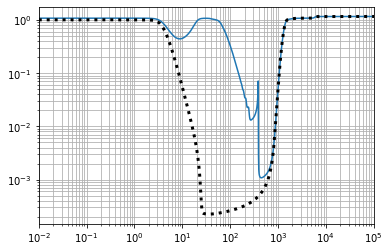

In [208]:
i=2
z = [float(s) for s in Xe_redshifts[i+1].split()]
Xe = [float(s) for s in Xe_values[i+1].split()]
plt.plot(z,Xe)


xinj = float(xinj_values[i+1].split()[0])
finj = float(finj_values[i+1].split()[0])
print(xinj)

xdec = xinj
rf = sd.recfast()
rf.rf_xinj0 = xdec
gamma = G
fdm = finj/1.31e4*xdec
rf.rf_f_dec = fdm*1e-100
print(fdm)
rf.rf_Reionization_model = 1
rf.rf_zstart = 1e6
rf.rf_zend = 1e-5
args = {}

p_name = 'Gamma_dec'
p_array = [gamma]

args['param_values_array'] = p_array
args['param_name'] = p_name
args['save_recfast_results'] = 'no'
rf.save_dir_name = 'case_' + '_xdec_' + str_dir
try:
    R = rf.run_recfast_parallel(**args)
    plt.plot(R[0]['z'],R[0]['Xe'],c='k',ls=':',lw=3)
except:
    pass
plt.loglog()
plt.xlim(1e-2,1e5)
plt.grid(which='both')
plt.savefig(path_to_figures+'Xe_comp.pdf')

In [118]:
xdec = 1.e-8
rf = sd.recfast()
rf.rf_xinj0 = xdec
gamma = 1e-14
fdm = 2.674e+06/1.31e4*xdec
rf.rf_f_dec = fdm*1e0
rf.rf_Reionization_model = 1
rf.rf_zstart = 1e6
rf.rf_zend = 1e-5
args = {}

p_name = 'Gamma_dec'
p_array = [gamma]

args['param_values_array'] = p_array
args['param_name'] = p_name
args['save_recfast_results'] = 'no'
rf.save_dir_name = 'case_' + '_xdec_' + str_dir
R = rf.run_recfast_parallel(**args)
    

(0.01, 1000000.0)

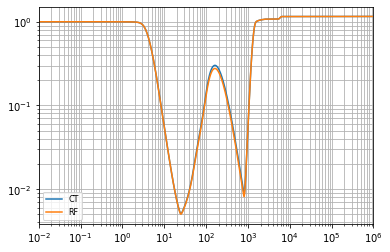

In [119]:
plt.plot(Xe_redshifts,Xe_values,label='CT')
plt.plot(R[0]['z'],R[0]['Xe'],label='RF')
plt.loglog()
plt.grid(which='both')
plt.legend(loc=3,fontsize=8)
plt.xlim(1e-2,1e6)

In [73]:
xdec = 1.e-8
rf = sd.recfast()
rf.rf_xinj0 = xdec
ngamma = 30
gamma = [1e-20,1e-17, 1e-14, 1e-11, 1e-8]#np.logspace(-20,-9,ngamma)
fdm = 1e-6
rf.rf_f_dec = fdm*1e0
rf.rf_Reionization_model = 0
rf.rf_zstart = 1e6
rf.rf_zend = 1e-5
args = {}

p_name = 'Gamma_dec'
#p_array = [gamma]
p_array = gamma
str_dir = str("%.3e"%xdec) +'_without_collisions_no_reio'
args['param_values_array'] = p_array
args['param_name'] = p_name
args['save_recfast_results'] = 'yes'
rf.save_dir_name = 'case' + '_xdec_' + str_dir
R = rf.run_recfast_parallel(**args)


No handles with labels found to put in legend.


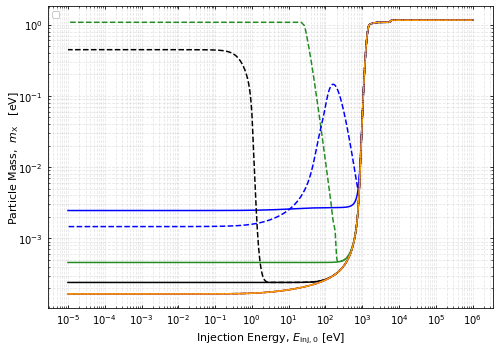

In [76]:

#mklist = iter(['o','s','d','v','>','o','s','d','v','>'])
lstyles = iter(['-','--','-.',':','-','--','-.',':','-','--','-.',':','-','--','-.',':','-','--','-.',':','-','--','-.',':'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, (ax2) = plt.subplots(1,1,figsize=(7,5))
label_size = 10
title_size = 11
legend_size = 25
handle_length = 1.5

ax = ax2
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(label_mdm,size=title_size)
ax.set_xlabel(label_injection_energy,size=title_size)
ax.yaxis.set_label_coords(-.06,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


colors = iter(['k','forestgreen','b','purple','orange','grey','r','b','orange','green','magenta','k','forestgreen','b','purple','green','magenta','r','b','orange','green','magenta'])

Xe_values = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/recfast_outputs/case_xdec_1.000e-08_without_collisions_no_reio/case_xdec_1.000e-08_without_collisions_no_reio_Xe_recfast.txt')
Xe_redshifts = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/recfast_outputs/case_xdec_1.000e-08_without_collisions_no_reio/case_xdec_1.000e-08_without_collisions_no_reio_z_recfast.txt')
for i in range(np.shape(Xe_values)[0]):
    col = next(colors)
    ax.plot(Xe_redshifts[i,:],Xe_values[i,:],c=col)

colors = iter(['k','forestgreen','b','purple','orange','grey','r','b','orange','green','magenta','k','forestgreen','b','purple','green','magenta','r','b','orange','green','magenta'])


    
Xe_values = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/recfast_outputs/case_xdec_1.000e-08_with_collisions_no_reio/case_xdec_1.000e-08_with_collisions_no_reio_Xe_recfast.txt')
Xe_redshifts = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/recfast_outputs/case_xdec_1.000e-08_with_collisions_no_reio/case_xdec_1.000e-08_with_collisions_no_reio_z_recfast.txt')
for i in range(np.shape(Xe_values)[0]):
    col = next(colors)
    ax.plot(Xe_redshifts[i,:],Xe_values[i,:],ls='--',c=col)

#ax2.set_ylim(2.e-4,1e9)
#ax2.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)
# ax1.set_title(r'$COBE/FIRAS$ Only',fontsize=9)
#ax2.set_title(r'$COBE/FIRAS$ + EDGES',fontsize=9)

#leg1 = plt.legend(loc=3,ncol=2,frameon=True,framealpha=0.6,fontsize = 9)
#legend_elements = [Line2D([0], [0], marker='o', color='k', label='best-fit to CT',ls='None',
#                          markerfacecolor='None', markersize=5)]
#leg2 = plt.legend(handles=legend_elements, loc=(0.745,0.6))
# ax1.legend(loc=2,ncol=1,frameon=True,framealpha=1.,fontsize = 7)
ax2.legend(loc=2,ncol=1,frameon=True,framealpha=1.,fontsize = 9)


# ax.add_artist(leg2).tight_layout(pad=3.0)
fig.tight_layout()
# plt.subplots_adjust(wspace=0.2)
#plt.savefig(path_to_figures + '/figures_for_paper_mdm_fisher_edges_'+photon_injection_case+'.pdf')
plt.show()
plt.close(fig)

No handles with labels found to put in legend.


(0.01, 1000000.0)

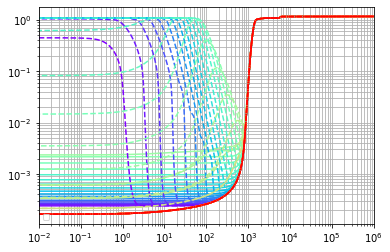

In [66]:
colors = iter(cm.rainbow(np.linspace(0, 1, ngamma)))
Xe_values = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/recfast_outputs/case_xdec_1.000e-08_no_collisions/case_xdec_1.000e-08_no_collisions_Xe_recfast.txt')
Xe_redshifts = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/recfast_outputs/case_xdec_1.000e-08_no_collisions/case_xdec_1.000e-08_no_collisions_z_recfast.txt')
for i in range(np.shape(Xe_values)[0]):
    col = next(colors)
    plt.plot(Xe_redshifts[i,:],Xe_values[i,:],c=col)

    
colors = iter(cm.rainbow(np.linspace(0, 1, ngamma)))    
Xe_values = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/recfast_outputs/case_xdec_1.000e-08_with_collisions/case_xdec_1.000e-08_with_collisions_Xe_recfast.txt')
Xe_redshifts = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/recfast_outputs/case_xdec_1.000e-08_with_collisions/case_xdec_1.000e-08_with_collisions_z_recfast.txt')
for i in range(np.shape(Xe_values)[0]):
    col = next(colors)
    plt.plot(Xe_redshifts[i,:],Xe_values[i,:],ls='--',c=col)
plt.loglog()
plt.grid(which='both')
plt.legend(loc=3,fontsize=8)
plt.xlim(1e-2,1e6)

No handles with labels found to put in legend.


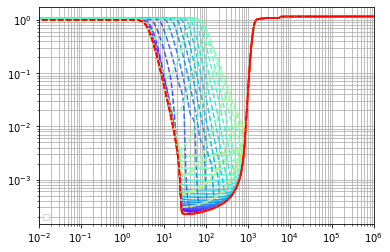

In [71]:
colors = iter(cm.rainbow(np.linspace(0, 1, ngamma)))
Xe_values = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/recfast_outputs/case_xdec_1.000e-08_no_collisions_with_reio/case_xdec_1.000e-08_no_collisions_with_reio_Xe_recfast.txt')
Xe_redshifts = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/recfast_outputs/case_xdec_1.000e-08_no_collisions_with_reio/case_xdec_1.000e-08_no_collisions_with_reio_z_recfast.txt')
for i in range(np.shape(Xe_values)[0]):
    col = next(colors)
    plt.plot(Xe_redshifts[i,:],Xe_values[i,:],c=col)

    
colors = iter(cm.rainbow(np.linspace(0, 1, ngamma)))    
Xe_values = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/recfast_outputs/case_xdec_1.000e-08_with_collisions_with_reio/case_xdec_1.000e-08_with_collisions_with_reio_Xe_recfast.txt')
Xe_redshifts = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/recfast_outputs/case_xdec_1.000e-08_with_collisions_with_reio/case_xdec_1.000e-08_with_collisions_with_reio_z_recfast.txt')
for i in range(np.shape(Xe_values)[0]):
    col = next(colors)
    plt.plot(Xe_redshifts[i,:],Xe_values[i,:],ls='--',c=col)
plt.loglog()
plt.grid(which='both')
plt.legend(loc=3,fontsize=8)
plt.xlim(1e-2,1e6)
plt.savefig(path_to_figures+'Xe_history_collisions_with_reio.pdf')

In [2]:
sd_lib_extended_run = pi.specdist_ct_spectra_lib()
pi.load_ct_spectra_lib('extended_run_xe_history_010820',sd_lib_extended_run)
# sd_lib_xe_history_finj_fisher = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('xe_hi@story_200720_finj_fisher',sd_lib_xe_history_finj_fisher)
# sd_lib_lyc_reio = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('lyc_reio',sd_lib_lyc_reio)

In [33]:
sd_lib_extended_run.Gamma_values[0]
sd_lib_extended_run.x_inj_values[0]

1e-08

In [34]:
np.shape(sd_lib_extended_run.DXe_Xe_redshifts_2d)

(75, 250)

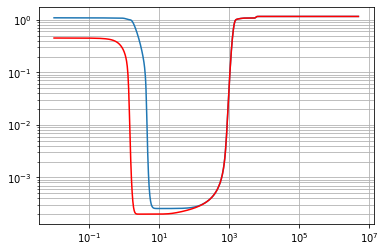

In [29]:
plt.plot(sd_lib_extended_run.DXe_Xe_redshifts_2d[0][0],sd_lib_extended_run.Xe_2d[0][0])
plt.plot(sd_lib_extended_run.DXe_Xe_redshifts_2d[0][0],sd_lib_extended_run.Xe_no_inj_2d[0][0],c='r')

plt.loglog()
plt.grid(which='both')

In [2]:
sd_lib_xe_history = pi.specdist_ct_spectra_lib()
pi.load_ct_spectra_lib('xe_history_270720',sd_lib_xe_history)
# sd_lib_xe_history_finj_fisher = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('xe_history_200720_finj_fisher',sd_lib_xe_history_finj_fisher)
# sd_lib_lyc_reio = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('lyc_reio',sd_lib_lyc_reio)

In [4]:
gamma_asked = 1e-17
xinj_asked = 1e-7
z_asked = np.logspace(-3,6,300)
S_xe_history = pi.GetXeHistory(gamma_asked,xinj_asked,z_asked,sd_lib_xe_history)
#print(S_xe_history["fdm_pca_lim"])
#S_xe_history

Text(0.5, 1.0, 'Gamma=1.0000e-13')

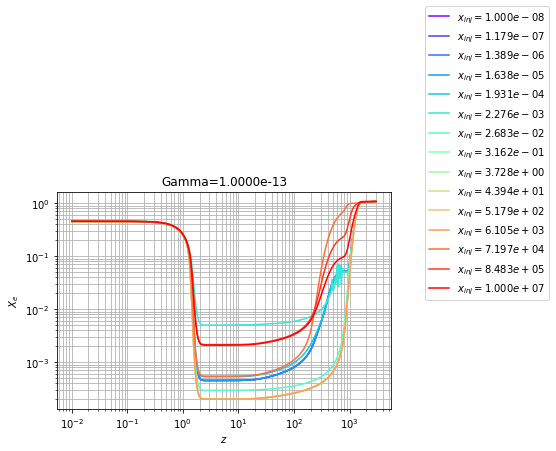

In [41]:
gamma_asked = 1e-13
z_asked = np.logspace(np.log10(1e-2),np.log10(3000),3000)
nx = 15
colors = iter(cm.rainbow(np.linspace(0, 1, nx)))
for xinj in np.logspace(-8,7,nx):
    col = next(colors)
    S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_extended_run)
    plt.plot(S_xe_history['z'],np.abs(S_xe_history['Xe']),label=r'$x_{inj}=%.3e$'%xinj,c=col)
    #plt.plot(S_xe_history['z'],np.abs(S_xe_history['Xe_no_inj']),c=col,ls='--')
plt.loglog()
plt.legend(loc=(1.1,0.5))
#plt.ylim(1e-5,1e1)
plt.grid(which='both')
plt.xlabel(r'$z$')
plt.ylabel(r'$X_e$')
plt.title('Gamma=%.4e'%gamma_asked)
#plt.savefig(path_to_figures + 'pca_new_code_Xe_vs_z.pdf')

In [4]:
import matplotlib.animation as animation

In [19]:
sd_lib_extended_run.Gamma_values[31]
#sd_lib_extended_run.x_inj_values[0]

1.0642092440647268e-15

In [8]:
gamma_asked = 1e-15
nx = 20
x = []
y = []
z_asked = np.logspace(-2,5,1e3)
for k in range(nx):
    xinj = np.logspace(-8,7,nx)[k]
    S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_extended_run)
    x.append(S_xe_history['z'])
    y.append(S_xe_history['Xe'])

In [21]:
gamma_asked = sd_lib_extended_run.Gamma_values[31]
nx = len(sd_lib_extended_run.x_inj_values)
x = []
y = []
xinj = []
#z_asked = np.logspace(-2,5,1e3)
for k in range(nx):
    xinj.append(sd_lib_extended_run.x_inj_values[k])
    #S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_extended_run)
    x.append(sd_lib_extended_run.DXe_Xe_redshifts_2d[31][k])
    y.append(sd_lib_extended_run.Xe_2d[31][k])

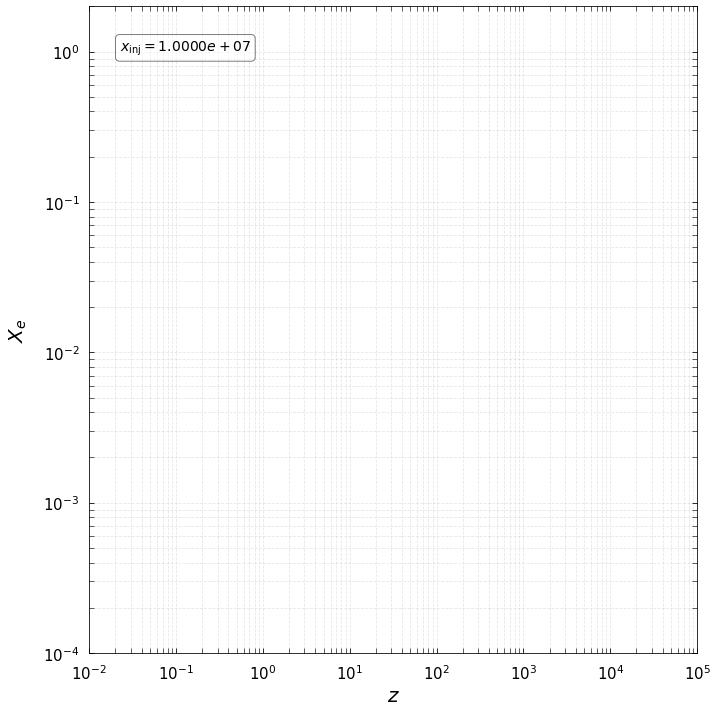

In [22]:

x_min = 1.e-2
x_max = 1.e5
#raise

fig, ax1 = plt.subplots(1,1,figsize=(10,10))
label_size = 15
title_size = 20
legend_size = 25
handle_length = 1.5

ymin = 1.e-4
ymax = 2


linesp = []
patches = []


i_ax = 0



for ax in [ax1]:
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(ymin,ymax)
    ax.set_xscale('log')
    ax.set_yscale('log')


    #ax.set_xlabel("scaled injection frequency, "+ r'$x_\mathrm{inj}=h\nu_\mathrm{inj}/k_{_\mathrm{B}}T_{\gamma}$',size=title_size)
    ax.set_xlabel(r'$z$',size=title_size)
    ax.set_ylabel(r'$X_e$',size=title_size)
    ax.yaxis.set_label_coords(-.1,0.5)

    # ticks_array = np.logspace(-6,6,13)
    # ax.set_xticks(ticks_array)

    # ticks_array = np.logspace(-8,2,11)
    # ax.set_yticks(ticks_array)


    ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
    ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

    plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
    plt.setp(ax.get_xticklabels(), fontsize=label_size)

    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')



    plt.grid( b=True, which="both", alpha=0.3, linestyle='--')

    i_ax = i_ax + 1


linesp1 = [ax1.plot([], [],c='k',ls='-')[0] for _ in range(1)]
text_gamma =  [ax.text(0.05, 0.15, r'$x_\mathrm{inj}= %.4e$'%1, transform=ax.transAxes, fontsize=14, verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]
patches1 = linesp1 + text_gamma 


patches = patches1




def init():

    for line in linesp1:
        line.set_data([], [])

    return patches

def animate(i):
    for j,line in enumerate(linesp1):
        if j==0:
            line.set_data(x[i],y[i])
        text_gamma[j].remove()
        text_gamma_str1 = r'$x_\mathrm{inj}= %.4e$'%xinj[i]

        text_gamma[j] = ax.text(0.05, 0.95, text_gamma_str1 , transform=ax.transAxes, fontsize=14, verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    return patches


fig.tight_layout()





anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(y), interval=800, blit=True)

anim.save(path_to_figures + '/Xe_movie.mp4', fps=3, extra_args=['-vcodec', 'libx264'],dpi=100)
#plt.show()

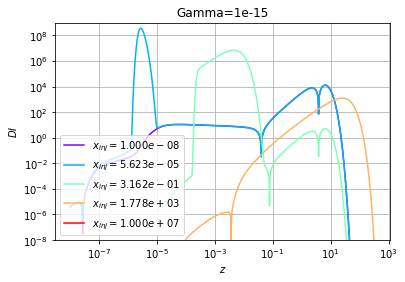

In [22]:
gamma_asked = 1e-15
x_asked = np.logspace(np.log10(1e-8),np.log10(1e8),3000)
nx = 5
colors = iter(cm.rainbow(np.linspace(0, 1, nx)))
for xinj in np.logspace(-8,7,nx):
    col = next(colors)
    S_xe_history = pi.GetSpectra(gamma_asked,xinj,x_asked,sd_lib_extended_run)
    plt.plot(S_xe_history['x'],np.abs(S_xe_history['DI']),label=r'$x_{inj}=%.3e$'%xinj,c=col)
    #plt.plot(S_xe_history['z'],np.abs(S_xe_history['Xe_no_inj']),c=col,ls='--')
plt.loglog()
plt.legend(loc=3)
plt.ylim(1e-8,1e9)
plt.grid(which='both')
plt.xlabel(r'$z$')
plt.ylabel(r'$DI$')
plt.title('Gamma=1e-15')
plt.savefig(path_to_figures + 'pca_new_code_DI_vs_x.pdf')

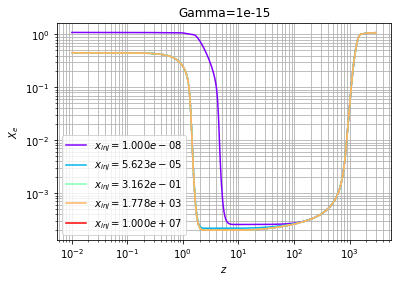

In [15]:
gamma_asked = 1e-20
z_asked = np.logspace(np.log10(1e-2),np.log10(3000),3000)
nx = 5
colors = iter(cm.rainbow(np.linspace(0, 1, nx)))
for xinj in np.logspace(-8,7,nx):
    col = next(colors)
    S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_extended_run)
    plt.plot(S_xe_history['z'],np.abs(S_xe_history['Xe']),label=r'$x_{inj}=%.3e$'%xinj,c=col)
    plt.plot(S_xe_history['z'],np.abs(S_xe_history['Xe_no_inj']),c=col,ls='--')
plt.loglog()
plt.legend()
#plt.ylim(1e-5,1e1)
plt.grid(which='both')
plt.xlabel(r'$z$')
plt.ylabel(r'$X_e$')
plt.title('Gamma=1e-15')
plt.savefig(path_to_figures + 'pca_new_code_Xe_vs_z.pdf')

In [ ]:
sd_lib_extended_run.Xe_values_2d

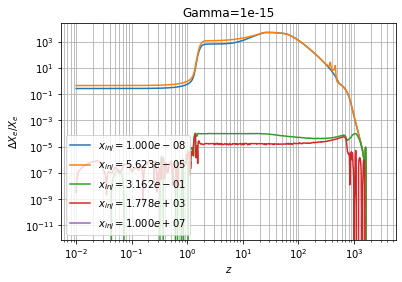

In [63]:
gamma_asked = 1e-15
z_asked = np.logspace(np.log10(1e-2),np.log10(3000),3000)
for xinj in np.logspace(-8,7,5):
    S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_extended_run)
    plt.plot(S_xe_history['z'],np.abs(S_xe_history['DXe_Xe']),label=r'$x_{inj}=%.3e$'%xinj)
plt.loglog()
plt.legend()
#plt.ylim(1e-5,1e1)
plt.grid(which='both')
plt.xlabel(r'$z$')
plt.ylabel(r'$\Delta X_e/X_e$')
plt.title('Gamma=1e-15')
plt.savefig(path_to_figures + 'pca_new_code_DXe_Xe_vs_z.pdf')

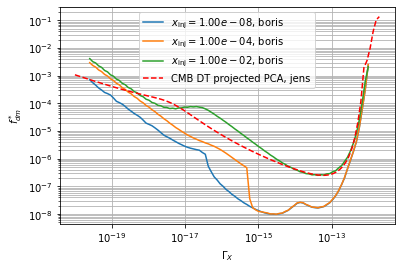

In [54]:
gamma_inj = np.logspace(-20,-12,100)[5:]
for xinj in [1e-8,1e-4,1e-2,1e2, 1e4, 1e6][0:3]:
    fdm_pca = []
    #xinj = 1e-8
    z_asked = np.logspace(np.log10(100),np.log10(3000),3000)
    for gamma_asked in gamma_inj:
        #S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_xe_history)
        S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_extended_run)
        fdm_pca.append(S_xe_history['fdm_pca_lim'])
    fdm_pca = np.asarray(fdm_pca)
    plt.plot(gamma_inj,fdm_pca,label=r'$x_\mathrm{inj}=%.2e$, boris'%xinj)

PCA = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/fdm_PCA_limits.dat')
plt.plot(PCA[:,0],2.*PCA[:,1],c='r',ls='--',label='CMB DT projected PCA, jens')


plt.loglog()
plt.xlabel(r'$\Gamma_X$')
plt.ylabel(r'$f_{dm}^*$')
plt.grid(which='both')
plt.legend()
plt.savefig(path_to_figures + 'pca_new_code_fdm_vs_Gamma_inj.pdf')

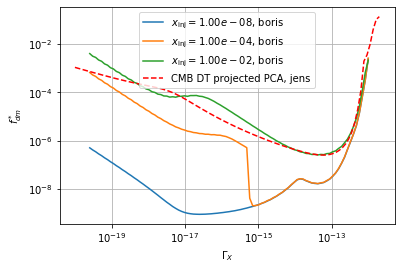

In [35]:
gamma_inj = np.logspace(-20,-12,100)[5:]
for xinj in [1e-8,1e-4,1e-2,1e2, 1e4, 1e6][0:3]:
    fdm_pca = []
    #xinj = 1e-8
    z_asked = np.logspace(-3,6,300)
    for gamma_asked in gamma_inj:
        #S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_xe_history)
        S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_extended_run)
        fdm_pca.append(S_xe_history['fdm_pca_lim'])
    fdm_pca = np.asarray(fdm_pca)
    plt.plot(gamma_inj,fdm_pca,label=r'$x_\mathrm{inj}=%.2e$, boris'%xinj)

PCA = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/fdm_PCA_limits.dat')
plt.plot(PCA[:,0],2.*PCA[:,1],c='r',ls='--',label='CMB DT projected PCA, jens')


plt.loglog()
plt.xlabel(r'$\Gamma_X$')
plt.ylabel(r'$f_{dm}^*$')
plt.grid(which='both')
plt.legend()
sd_lib_extended_runsd_lib_extended_runplt.savefig(path_to_figures + 'pca_new_code_fdm_vs_Gamma_inj.pdf')

In [36]:
specdist_ct_spectra_lib = sd_lib_extended_run

z1 = specdist_ct_spectra_lib.Xe_PCA_EigenModes['E1']['z']
E1 = specdist_ct_spectra_lib.Xe_PCA_EigenModes['E1']['values']
z2 = specdist_ct_spectra_lib.Xe_PCA_EigenModes['E2']['z']
E2 = specdist_ct_spectra_lib.Xe_PCA_EigenModes['E2']['values']
z3 = specdist_ct_spectra_lib.Xe_PCA_EigenModes['E3']['z']
E3 = specdist_ct_spectra_lib.Xe_PCA_EigenModes['E3']['values']

f_E1 = interp1d(z1, E1)
f_E2 = interp1d(z2, E2)
f_E3 = interp1d(z3, E3)

In [51]:
#z_asked = np.logspace(-3,6,300)
z_asked = np.logspace(np.log10(250),np.log10(3000),3000)
array_x_asked = z_asked
min_z1 = max(np.min(z1),np.min(array_x_asked))
max_z1 = min(np.max(z1),np.max(array_x_asked))

min_z2 = max(np.min(z2),np.min(array_x_asked))
max_z2 = min(np.max(z2),np.max(array_x_asked))

min_z3 = max(np.min(z3),np.min(array_x_asked))
max_z3 = min(np.max(z3),np.max(array_x_asked))

new_z1 = np.linspace(min_z1,max_z1,5000)
new_z2 = np.linspace(min_z2,max_z2,5000)
new_z3 = np.linspace(min_z3,max_z3,5000)

In [53]:
fdm = 1
integrand_rho1 = f_E1(new_z1)*f_E1(new_z1)
integrand_rho2 = f_E2(new_z2)*f_E2(new_z2)
integrand_rho3 = f_E3(new_z3)*f_E3(new_z3)

rho1 = np.trapz(integrand_rho1, x=new_z1)/fdm
rho2 = np.trapz(integrand_rho2, x=new_z2)/fdm
rho3 = np.trapz(integrand_rho3, x=new_z3)/fdm

print(rho1,rho2,rho3)

1.0000723601893615 1.000068523338774 0.9996076215841795


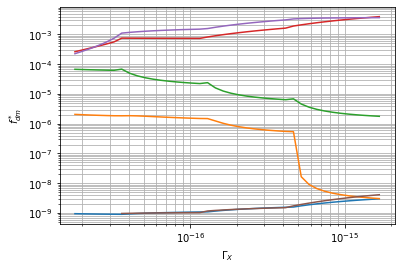

In [30]:
gamma_inj = np.logspace(-17,-12,100)[5:]
for xinj in [1e-8,1e-4,1e-2,1e2, 1e4, 1e6]:
    fdm_pca = []
    #xinj = 1e-8
    z_asked = np.logspace(-3,6,300)
    for gamma_asked in gamma_inj:
        #S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_xe_history)
        S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_extended_run)
        fdm_pca.append(S_xe_history['fdm_pca_lim'])
    fdm_pca = np.asarray(fdm_pca)
    plt.plot(gamma_inj,fdm_pca,label=r'$x_\mathrm{inj}=%.2e$'%xinj)

plt.loglog()
plt.xlabel(r'$\Gamma_X$')
plt.ylabel(r'$f_{dm}^*$')
plt.grid(which='both')
#plt.savefig(path_to_figures + 'pca_new_code_fdm_vs_Gamma_inj.pdf')

In [153]:
sd_lib_xe_history = pi.specdist_ct_spectra_lib()
pi.load_ct_spectra_lib('xe_history_200720',sd_lib_xe_history)
# sd_lib_xe_history_finj_fisher = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('xe_history_200720_finj_fisher',sd_lib_xe_history_finj_fisher)
# sd_lib_lyc_reio = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('lyc_reio',sd_lib_lyc_reio)

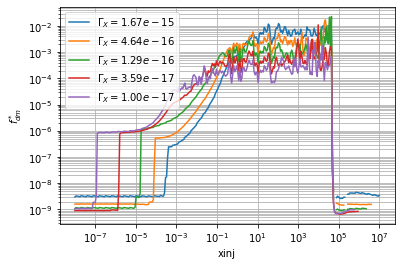

In [4]:
for gamma_inj in  np.logspace(-12,-17,10)[5:]:
    fdm_pca = []
    x_inj = np.logspace(-8,7,300)
    z_asked = np.logspace(-3,6,300)
    for xinj in x_inj:
        gamma_asked = gamma_inj
        #S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_xe_history)
        S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_extended_run)
        fdm_pca.append(S_xe_history['fdm_pca_lim'])
    fdm_pca = np.asarray(fdm_pca)
    plt.plot(x_inj,fdm_pca,label=r'$\Gamma_X=%.2e$'%gamma_inj)
plt.legend()

plt.loglog()
# plt.ylim(1e-5,1e1)
plt.xlabel('xinj')
plt.ylabel(r'$f_{dm}^*$')
plt.grid(which='both')
plt.savefig(path_to_figures + 'pca_new_code_fdm_vs_xinj.pdf')

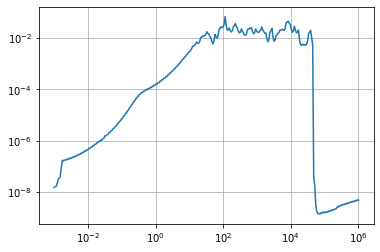

In [5]:
gamma_inj = 1e-14
fdm_pca = []
x_inj = np.logspace(-3,6,300)
z_asked = np.logspace(-3,6,300)
for xinj in x_inj:
    gamma_asked = gamma_inj
    S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_extended_run)
    fdm_pca.append(S_xe_history['fdm_pca_lim'])
fdm_pca = np.asarray(fdm_pca)

plt.plot(x_inj,fdm_pca)
plt.loglog()
# plt.ylim(1e-5,1e1)
plt.grid(which='both')

In [1]:
gamma_asked = 1e-17
for xinj in np.logspace(-8,7,5):
    S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_extended_run)
    plt.plot(S_xe_history['z'],np.abs(S_xe_history['DXe_Xe']),label=str(xinj))
plt.loglog()
plt.legend()
#plt.ylim(1e-5,1e1)
plt.grid(which='both')

NameError: name 'np' is not defined

In [2]:
sd_lib_lyc_reio = pi.specdist_ct_spectra_lib()
pi.load_ct_spectra_lib('lyc_reio',sd_lib_lyc_reio)

In [3]:
def pi_compute_fdm_constraints(log10_tau_a,log10_Einj_in_ev,asd_lib,*args,**kwargs):
    Einj_in_ev = 10**log10_Einj_in_ev
    tau_a = 10**log10_tau_a
    #ma_in_ev = log10_ma_in_ev
    #tau_a = log10_tau_a
    xinj = Einj_in_ev/xinj_to_Einj
    #gagg = 3.57e7*(Gamma_values)**0.5*Xinj_values**(-3./2.)
    Gamma = 1./tau_a#((gagg/3.57e7)/xinj**(-3./2.))**2.
    if Gamma>1e-8:
        ct = sd.cosmotherm()
        cosmo = sd.cosmo()
        X_dm = sd.dm_particle()
        pi.set_dm_params_to_CT_pi_params(X_dm,ct)
        pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
        
        X_dm.Gamma_inj = Gamma
        X_dm.x_0 = xinj
        fdm_constraint = np.abs(pi.high_redshift_f_dm_limit(7.4e-5,cosmo,ct,X_dm,N_int = 5))
    elif Gamma < asd_lib.Gamma_inj_min:
        xi_a = [xinj]
        Gamma_values = [asd_lib.Gamma_inj_min]
        D = sd.pi_run_fisher_constraints(Gamma_values,xi_a,asd_lib,**kwargs)
        fdm_constraint = D['curves'][0]['fdm']*asd_lib.Gamma_inj_min/Gamma        
    else:
        xi_a = [xinj]
        Gamma_values = [Gamma]
        D = sd.pi_run_fisher_constraints(Gamma_values,xi_a,asd_lib,**kwargs)
        fdm_constraint = D['curves'][0]['fdm']
    return np.log10(fdm_constraint)

pi_compute_fdm_constraints = np.vectorize(pi_compute_fdm_constraints)


In [4]:
Gamma_values = np.asarray([1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16,1e-17,1e-18,1e-19,1e-20,1e-21])
gamma_labels = [r'$10^{-6}$',r'$10^{-7}$',r'$10^{-8}$',r'$10^{-9}$',r'$10^{-10}$',
                r'$10^{-11}$',r'$10^{-12}$',r'$10^{-13}$',r'$10^{-14}$',r'$10^{-15}$',
                r'$10^{-16}$',r'$10^{-17}$',r'$10^{-18}$',r'$10^{-19}$',r'$10^{-20}$',r'$10^{-21}$']

log10Tau_values = np.log10(1./Gamma_values)

Nx = 200
xi_array = np.logspace(-6,6,Nx)

log10Einj_values = np.log10(xi_array*xinj_to_Einj)

firas = pi.firas()
edges = pi.edges()
a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges
add_edges = 'yes'

if add_edges == 'yes':
    a_dict['add_edges'] = 'yes'
else:
    a_dict['add_edges'] = 'no'

#lib = sd_lib_lyc_reio
lib = sd_lib_extended_run

# Z = vfunc_tau_a_contours(Y,X,lib,**a_dict)

log10_Einj_in_ev = log10Einj_values

fdm  = []
for log10_tau_a in log10Tau_values: 
    fdm.append(10**np.asarray(pi_compute_fdm_constraints(log10_tau_a,log10_Einj_in_ev,lib,**a_dict)))

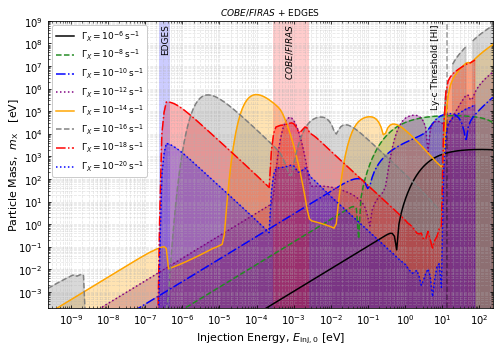

In [5]:
# photon_injection_case = 'bare'
# if photon_injection_case == 'bare':
#     f_dm_fisher = f_dm_fisher_bare
#     case = 'bare'
# if photon_injection_case == 'lyc':
#     f_dm_fisher = f_dm_fisher_lyc
#     case = 'lyc'
# if photon_injection_case == 'lyc_reio':
photon_injection_case = 'lyc_reio'
#     f_dm_fisher = f_dm_fisher_lyc_reio
#  
case = 'lyc+reio'

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#mklist = iter(['o','s','d','v','>','o','s','d','v','>'])
colors = iter(['k','forestgreen','b','purple','orange','grey','r','b','orange','green','magenta','k','forestgreen','b','purple','green','magenta','r','b','orange','green','magenta'])
lstyles = iter(['-','--','-.',':','-','--','-.',':','-','--','-.',':','-','--','-.',':','-','--','-.',':','-','--','-.',':'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, (ax2) = plt.subplots(1,1,figsize=(7,5))
label_size = 10
title_size = 11
legend_size = 25
handle_length = 1.5

ax = ax2
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(label_mdm,size=title_size)
ax.set_xlabel(label_injection_energy,size=title_size)
ax.yaxis.set_label_coords(-.06,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


# if ax == ax2:
ax.axvspan(1.e-3*xinj_to_Einj, 2e-3*xinj_to_Einj,ymin=0.,ymax=1, facecolor='blue', alpha=0.2)
#ax.axvspan(0.5*xinj_to_Einj, 105*xinj_to_Einj,ymin=0.,ymax=0.1,  facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
ax.axvspan(1.2*xinj_to_Einj, 11.2*xinj_to_Einj,ymin=0.,ymax=1, facecolor='red', alpha=0.2)
ax.axvline(5.7895e4*xinj_to_Einj,ls='--',alpha=0.4,c='k')
i = 0
#color=iter(cm.viridis(np.linspace(0.7,0,len(Gamma_values))))
for gamma in np.flip(Gamma_values):
#     if i<=2 or i%2==0:
#         i += 1
#         continue

    if (i+1)%2==0:
        i+=1
        continue
    col = next(colors)
    #mk = next(mklist)
    #ax.plot(f_dm_high_z['curves'][i]['x'],f_dm_high_z['curves'][i]['mu'],c=col,label=r'$\Gamma_X=$'+scientific_notation(f_dm_high_z['Gamma_inj'][i])+r'$\,\mathrm{s^{-1}}$',ls='None', marker=mk,markersize=3)
    style = next(lstyles)
    #f_dm_fisher = f_dm[i]
#     ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],(f_dm_fisher['curves'][i]['fdm']/(xinj_to_Einj*f_dm_fisher['curves'][i]['x']))**-1,c=col,
#              label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=style, marker='None')
#     ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],-(f_dm_fisher['curves'][i]['fdm']/(xinj_to_Einj*f_dm_fisher['curves'][i]['x']))**-1,c=col,ls=style, marker='None')
#     ax1.fill_between(xinj_to_Einj*f_dm_fisher['curves'][i]['x'], (np.abs(f_dm_fisher['curves'][i]['fdm']/(xinj_to_Einj*f_dm_fisher['curves'][i]['x'])))**-1,1e-100,color=col,alpha=0.3)

    #f_dm_fisher = f_dm_fisher_lyc_reio_with_edges
    einj = 10**log10_Einj_in_ev
    
    ax2.plot(einj,(fdm[i]/einj)**-1,c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=style, marker='None')
    ax2.plot(einj,-(fdm[i]/einj)**-1,c=col,ls=style, marker='None')
    ax2.fill_between(einj, np.abs((fdm[i]/einj)**-1),1e-100,color=col,alpha=0.3)


    i += 1

# ax2.text(0.05, 0.95, case , transform=ax2.transAxes, fontsize=9, verticalalignment='top',
#           bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))

# ax1.text(0.86, 0.02, 'Ly-c Threshold [HI]' , transform=ax1.transAxes, fontsize=9,
#          verticalalignment='bottom',rotation = 90,
#         bbox=dict(facecolor='white', edgecolor='white', boxstyle='round',alpha=0.3))
# ax1.text(0.53, 0.02, r'$COBE/FIRAS$' , transform=ax1.transAxes, fontsize=9,
#          verticalalignment='bottom',rotation = 90,
#         bbox=dict(facecolor='white', edgecolor='white', boxstyle='round',alpha=0.3))
ax2.text(0.53, 0.99, r'$COBE/FIRAS$' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='top',rotation = 90,
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round',alpha=0.))
ax2.text(0.255, 0.99, r'EDGES' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='top',rotation = 90,
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round',alpha=0.))

ax2.text(0.86, 0.99, 'Ly-c Threshold [HI]' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='top',rotation = 90,
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round',alpha=0.))

# ax1.set_ylim(2.e-4,1e9)
# ax1.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)

ax2.set_ylim(2.e-4,1e9)
ax2.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)
# ax1.set_title(r'$COBE/FIRAS$ Only',fontsize=9)
ax2.set_title(r'$COBE/FIRAS$ + EDGES',fontsize=9)

#leg1 = plt.legend(loc=3,ncol=2,frameon=True,framealpha=0.6,fontsize = 9)
#legend_elements = [Line2D([0], [0], marker='o', color='k', label='best-fit to CT',ls='None',
#                          markerfacecolor='None', markersize=5)]
#leg2 = plt.legend(handles=legend_elements, loc=(0.745,0.6))
# ax1.legend(loc=2,ncol=1,frameon=True,framealpha=1.,fontsize = 7)
ax2.legend(loc=2,ncol=1,frameon=True,framealpha=1.,fontsize = 9)


# ax.add_artist(leg2).tight_layout(pad=3.0)
fig.tight_layout()
# plt.subplots_adjust(wspace=0.2)
#plt.savefig(path_to_figures + '/figures_for_paper_mdm_fisher_edges_'+photon_injection_case+'.pdf')
plt.show()
plt.close(fig)

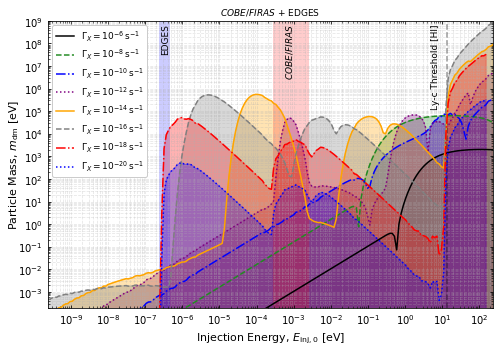

In [7]:
# photon_injection_case = 'bare'
# if photon_injection_case == 'bare':
#     f_dm_fisher = f_dm_fisher_bare
#     case = 'bare'
# if photon_injection_case == 'lyc':
#     f_dm_fisher = f_dm_fisher_lyc
#     case = 'lyc'
# if photon_injection_case == 'lyc_reio':
photon_injection_case = 'lyc_reio'
#     f_dm_fisher = f_dm_fisher_lyc_reio
#  
case = 'lyc+reio'

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#mklist = iter(['o','s','d','v','>','o','s','d','v','>'])
colors = iter(['k','forestgreen','b','purple','orange','grey','r','b','orange','green','magenta','k','forestgreen','b','purple','green','magenta','r','b','orange','green','magenta'])
lstyles = iter(['-','--','-.',':','-','--','-.',':','-','--','-.',':','-','--','-.',':','-','--','-.',':','-','--','-.',':'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, (ax2) = plt.subplots(1,1,figsize=(7,5))
label_size = 10
title_size = 11
legend_size = 25
handle_length = 1.5

ax = ax2
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(label_mdm,size=title_size)
ax.set_xlabel(label_injection_energy,size=title_size)
ax.yaxis.set_label_coords(-.06,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


# if ax == ax2:
ax.axvspan(1.e-3*xinj_to_Einj, 2e-3*xinj_to_Einj,ymin=0.,ymax=1, facecolor='blue', alpha=0.2)
#ax.axvspan(0.5*xinj_to_Einj, 105*xinj_to_Einj,ymin=0.,ymax=0.1,  facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
ax.axvspan(1.2*xinj_to_Einj, 11.2*xinj_to_Einj,ymin=0.,ymax=1, facecolor='red', alpha=0.2)
ax.axvline(5.7895e4*xinj_to_Einj,ls='--',alpha=0.4,c='k')
i = 0
#color=iter(cm.viridis(np.linspace(0.7,0,len(Gamma_values))))
for gamma in np.flip(Gamma_values):
#     if i<=2 or i%2==0:
#         i += 1
#         continue

    if (i+1)%2==0:
        i+=1
        continue
    col = next(colors)
    #mk = next(mklist)
    #ax.plot(f_dm_high_z['curves'][i]['x'],f_dm_high_z['curves'][i]['mu'],c=col,label=r'$\Gamma_X=$'+scientific_notation(f_dm_high_z['Gamma_inj'][i])+r'$\,\mathrm{s^{-1}}$',ls='None', marker=mk,markersize=3)
    style = next(lstyles)
    #f_dm_fisher = f_dm[i]
#     ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],(f_dm_fisher['curves'][i]['fdm']/(xinj_to_Einj*f_dm_fisher['curves'][i]['x']))**-1,c=col,
#              label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=style, marker='None')
#     ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],-(f_dm_fisher['curves'][i]['fdm']/(xinj_to_Einj*f_dm_fisher['curves'][i]['x']))**-1,c=col,ls=style, marker='None')
#     ax1.fill_between(xinj_to_Einj*f_dm_fisher['curves'][i]['x'], (np.abs(f_dm_fisher['curves'][i]['fdm']/(xinj_to_Einj*f_dm_fisher['curves'][i]['x'])))**-1,1e-100,color=col,alpha=0.3)

    #f_dm_fisher = f_dm_fisher_lyc_reio_with_edges
    einj = 10**log10_Einj_in_ev
    
    ax2.plot(einj,(fdm[i]/einj)**-1,c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=style, marker='None')
    ax2.plot(einj,-(fdm[i]/einj)**-1,c=col,ls=style, marker='None')
    ax2.fill_between(einj, np.abs((fdm[i]/einj)**-1),1e-100,color=col,alpha=0.3)


    i += 1

# ax2.text(0.05, 0.95, case , transform=ax2.transAxes, fontsize=9, verticalalignment='top',
#           bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))

# ax1.text(0.86, 0.02, 'Ly-c Threshold [HI]' , transform=ax1.transAxes, fontsize=9,
#          verticalalignment='bottom',rotation = 90,
#         bbox=dict(facecolor='white', edgecolor='white', boxstyle='round',alpha=0.3))
# ax1.text(0.53, 0.02, r'$COBE/FIRAS$' , transform=ax1.transAxes, fontsize=9,
#          verticalalignment='bottom',rotation = 90,
#         bbox=dict(facecolor='white', edgecolor='white', boxstyle='round',alpha=0.3))
ax2.text(0.53, 0.99, r'$COBE/FIRAS$' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='top',rotation = 90,
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round',alpha=0.))
ax2.text(0.255, 0.99, r'EDGES' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='top',rotation = 90,
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round',alpha=0.))

ax2.text(0.86, 0.99, 'Ly-c Threshold [HI]' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='top',rotation = 90,
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round',alpha=0.))

# ax1.set_ylim(2.e-4,1e9)
# ax1.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)

ax2.set_ylim(2.e-4,1e9)
ax2.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)
# ax1.set_title(r'$COBE/FIRAS$ Only',fontsize=9)
ax2.set_title(r'$COBE/FIRAS$ + EDGES',fontsize=9)

#leg1 = plt.legend(loc=3,ncol=2,frameon=True,framealpha=0.6,fontsize = 9)
#legend_elements = [Line2D([0], [0], marker='o', color='k', label='best-fit to CT',ls='None',
#                          markerfacecolor='None', markersize=5)]
#leg2 = plt.legend(handles=legend_elements, loc=(0.745,0.6))
# ax1.legend(loc=2,ncol=1,frameon=True,framealpha=1.,fontsize = 7)
ax2.legend(loc=2,ncol=1,frameon=True,framealpha=1.,fontsize = 9)


# ax.add_artist(leg2).tight_layout(pad=3.0)
fig.tight_layout()
# plt.subplots_adjust(wspace=0.2)
plt.savefig(path_to_figures + '/figures_for_paper_mdm_fisher_edges_'+photon_injection_case+'.pdf')
plt.show()
plt.close(fig)

In [2]:
sd_lib_xe_history = pi.specdist_ct_spectra_lib()
pi.load_ct_spectra_lib('xe_history_200720',sd_lib_xe_history)
# sd_lib_xe_history_finj_fisher = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('xe_history_200720_finj_fisher',sd_lib_xe_history_finj_fisher)
# sd_lib_lyc_reio = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('lyc_reio',sd_lib_lyc_reio)

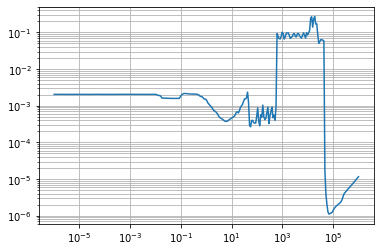

In [7]:
gamma_inj = 1e-12
fdm_pca = []
x_inj = np.logspace(-6,6,300)
z_asked = np.logspace(-3,6,300)
for xinj in x_inj:
    gamma_asked = gamma_inj
    S_xe_history = pi.GetXeHistory(gamma_asked,xinj,z_asked,sd_lib_xe_history)
    fdm_pca.append(S_xe_history['fdm_pca_lim'])
fdm_pca = np.asarray(fdm_pca)

plt.plot(x_inj,fdm_pca)
plt.loglog()
# plt.ylim(1e-5,1e1)
plt.grid(which='both')

plt.savefig(path_to_figures + '/figures_for_paper_PCA.pdf')

In [20]:
sd_lib_lyc_reio = pi.specdist_ct_spectra_lib()
pi.load_ct_spectra_lib('lyc_reio',sd_lib_lyc_reio)

In [18]:
case = 'lyc+reio'
add_edges = 'yes'

tau_values = np.linspace(5,30,500)
Einj_values =np.linspace(-10,5,500)
xlist = Einj_values
ylist = tau_values

X, Y = np.meshgrid(xlist, ylist)

a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges

if add_edges == 'yes':
    a_dict['add_edges'] = 'yes'
else:
    a_dict['add_edges'] = 'no'

#lib = sd_lib_lyc_reio
lib = sd_lib_extended_run


#Z = vfunc_tau_a_contours(Y,X,lib,**a_dict)
Z =  pi_compute_fdm_constraints(Y,X,lib,**a_dict)

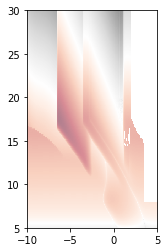

In [19]:
plt.imshow(Z, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
           cmap='RdGy', alpha=0.5)

In [20]:
name_ext = ''
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run'
np.shape(Z)
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'

    
np.savetxt(path, Z, delimiter='\t', fmt='%.4e')

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'


np.savetxt(path, X, delimiter='\t', fmt='%.4e')

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'


np.savetxt(path, Y, delimiter='\t', fmt='%.4e')


In [144]:
# name_ext = ''
# if case == 'lyc+reio':
#     name_ext += '_lyc_reio'
# elif case == 'bare':
#     name_ext += '_bare'
# if add_edges == 'yes':
#     name_ext += '_with_edges'
# np.shape(Z)
# path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'

    
# np.savetxt(path, Z, delimiter='\t', fmt='%.4e')

# path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'


# np.savetxt(path, X, delimiter='\t', fmt='%.4e')

# path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'


# np.savetxt(path, Y, delimiter='\t', fmt='%.4e')


In [21]:
name_ext = ''
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

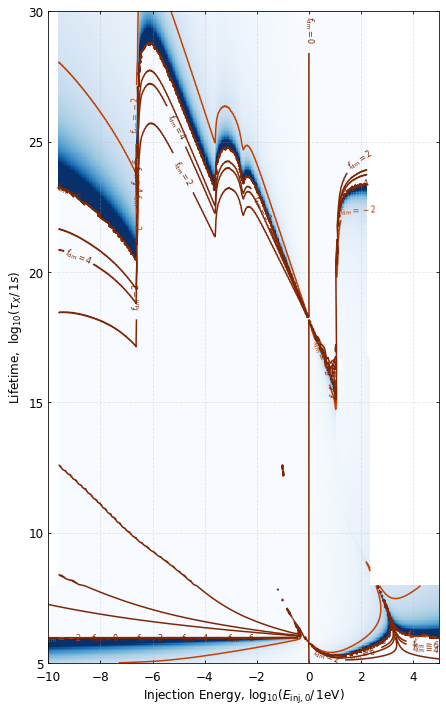

In [39]:
fig,ax=plt.subplots(1,1,figsize=(7,10))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 1.5


tau_values = Yf[:,0]
Einj_values = Xf[0]
Mf = (Zf/Einj_values)**-1
#Einj_values =np.linspace(-10,5,500)
#tau_values = np.linspace(5,30,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

levels = [-2,0,2,4,6]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)

CS = ax.contour(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize)


CS.levels = levels

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r \%%'
else:
    fmt = r'$f_\mathrm{dm}=%r$'

ax.clabel(CS, CS.levels, inline=1, fontsize=8,fmt=fmt)
 

# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


name_ext = ''

if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '.pdf'

ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_ylim(tau_values[0],tau_values[-1])

ax.set_xlabel(label_log10injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_log10Tau_x,size=title_size)
#ax.yaxis.set_label_coords(-.08,0.5)


im = ax.imshow(Mf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
           cmap=colormap2,norm=normalize, alpha=1.)

fig.tight_layout()
#plt.legend()
#plt.savefig(path_to_figures + '/figures_for_paper_tau_a' + name_ext)

In [13]:
NT = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/E_gamma_nt.dat')
z_nt = NT[:,1]
E_nt = NT[:,0]

# f_nt = interp1d(z_nt,E_nt)


ct = sd.cosmotherm()
cosmo = sd.cosmo()
X_dm = sd.dm_particle()
pi.set_dm_params_to_CT_pi_params(X_dm,ct)
pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)

G_nt = []
for zx in z_nt:
    G_nt.append(pi.find_Gamma_inj_for_injection_redshift_zX(zx,cosmo,ct))
G_nt = np.asarray(G_nt)

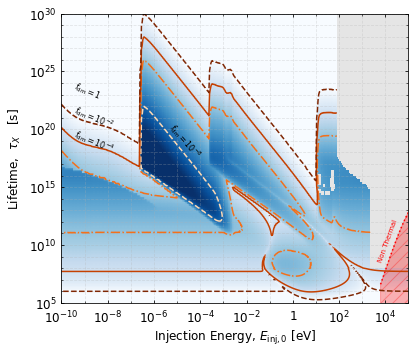

In [22]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 1.5


tau_values = Yf[:,0]
Einj_values = Xf[0]

# tau_values = np.linspace(5,30,500)
# Einj_values =np.linspace(-10,5,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

levels = [-8,-4,-2,0]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)

CS = ax.contour(Xf, Yf, Zf,levels,cmap = colormap,norm=normalize,linestyles=['--','-.','-','--'])


# CS.levels = [0.0001,0.01,1]


# # Label levels with specially formatted floats
# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = r'$f_\mathrm{dm}=%r$'
    
# fmt = ticker.LogFormatterMathtext()

#ax.clabel(CS, CS.levels, inline=10, fontsize=8,fmt=fmt)
 

# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


name_ext = ''

if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '_extended_run'
name_ext += '.pdf'

ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_ylim(tau_values[0],tau_values[-1])

ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.11,0.5)
ax.xaxis.set_label_coords(0.5,-.09)


# im = ax.imshow(Zf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#            cmap=colormap2,norm=normalize, alpha=1.)


im = ax.imshow(Zf, extent=[-10,5,tau_values[0],tau_values[-1]], origin='lower',
           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.5)


ax.text(0.03, 0.77, r'$f_\mathrm{dm}=1$' , rotation = -23,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(0.03, 0.69, r'$f_\mathrm{dm}=10^{-2}$' , rotation = -23,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(0.03, 0.61, r'$f_\mathrm{dm}=10^{-4}$' , rotation = -23,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(0.3, 0.63, r'$f_\mathrm{dm}=10^{-8}$' , rotation = -49,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(0.91, 0.29, r'Non Thermal' , rotation = 70,color='r',
        transform=ax.transAxes, fontsize=7, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.plot(np.log10(E_nt*1e3),np.log10(1./G_nt),c='red',ls=':')
ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)
ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='None',edgecolor='r')

ax.patch.set_color('grey') # or whatever color you like
ax.patch.set_alpha(.2)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$'])



fig.tight_layout()
#plt.legend()
plt.savefig(path_to_figures + '/figures_for_paper_tau_a' + name_ext)

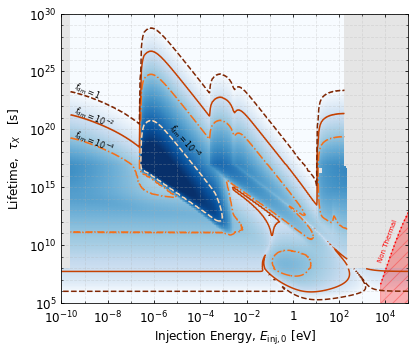

In [378]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 1.5


tau_values = Yf[:,0]
Einj_values = Xf[0]

# tau_values = np.linspace(5,30,500)
# Einj_values =np.linspace(-10,5,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

levels = [-8,-4,-2,0]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)

CS = ax.contour(Xf, Yf, Zf,levels,cmap = colormap,norm=normalize,linestyles=['--','-.','-','--'])


# CS.levels = [0.0001,0.01,1]


# # Label levels with specially formatted floats
# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = r'$f_\mathrm{dm}=%r$'
    
# fmt = ticker.LogFormatterMathtext()

#ax.clabel(CS, CS.levels, inline=10, fontsize=8,fmt=fmt)
 

# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


name_ext = ''

if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '.pdf'

ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_ylim(tau_values[0],tau_values[-1])

ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.11,0.5)
ax.xaxis.set_label_coords(0.5,-.09)


# im = ax.imshow(Zf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#            cmap=colormap2,norm=normalize, alpha=1.)


im = ax.imshow(Zf, extent=[-10,5,tau_values[0],tau_values[-1]], origin='lower',
           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.5)


ax.text(0.03, 0.77, r'$f_\mathrm{dm}=1$' , rotation = -23,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(0.03, 0.69, r'$f_\mathrm{dm}=10^{-2}$' , rotation = -23,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(0.03, 0.61, r'$f_\mathrm{dm}=10^{-4}$' , rotation = -23,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(0.3, 0.63, r'$f_\mathrm{dm}=10^{-8}$' , rotation = -49,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(0.91, 0.29, r'Non Thermal' , rotation = 70,color='r',
        transform=ax.transAxes, fontsize=7, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.plot(np.log10(E_nt*1e3),np.log10(1./G_nt),c='red',ls=':')
ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)
ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='None',edgecolor='r')

ax.patch.set_color('grey') # or whatever color you like
ax.patch.set_alpha(.2)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$'])



fig.tight_layout()
#plt.legend()
plt.savefig(path_to_figures + '/figures_for_paper_tau_a' + name_ext)

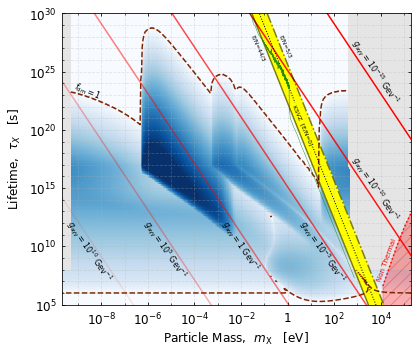

In [380]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 1.5


tau_values = Yf[:,0]
Einj_values = Xf[0]

mass_values = np.log10(10**Einj_values/mass_to_Einj)

Mf = np.log10(10**Xf/mass_to_Einj)
# tau_values = np.linspace(5,30,500)
# Einj_values =np.linspace(-10,5,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

levels = [0]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)

CS = ax.contour(Mf, Yf, Zf,levels,cmap = colormap,norm=normalize,linestyles=['--','-.','-',':'])


# CS.levels = [0.0001,0.01,1]


# # Label levels with specially formatted floats
# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = r'$f_\mathrm{dm}=%r$'
    
# fmt = ticker.LogFormatterMathtext()

#ax.clabel(CS, CS.levels, inline=10, fontsize=8,fmt=fmt)
 

masses_ev = np.logspace(-12,9,100)


xinjs = masses_ev/xinj_to_mass

gagg = 1e-15
gammas = xinjs**3.*1./(3.57e7)**2.*gagg**2.
plt.plot(np.log10(masses_ev),np.log10(1./gammas),ls='-',c='r', alpha=1)





gagg = 1e-10
gammas = xinjs**3.*1./(3.57e7)**2.*gagg**2.
plt.plot(np.log10(masses_ev),np.log10(1./gammas),ls='-',c='r',alpha = 0.9)


gagg = 1e-5
gammas = xinjs**3.*1./(3.57e7)**2.*gagg**2.
plt.plot(np.log10(masses_ev),np.log10(1./gammas),ls='-',c='r',alpha=0.7)

gagg = 1e0
gammas = xinjs**3.*1./(3.57e7)**2.*gagg**2.
plt.plot(np.log10(masses_ev),np.log10(1./gammas),ls='-',c='r',alpha=0.5)

gagg = 1e5
gammas = xinjs**3.*1./(3.57e7)**2.*gagg**2.
plt.plot(np.log10(masses_ev),np.log10(1./gammas),ls='-',c='r',alpha=0.3)

gagg = 1e10
gammas = xinjs**3.*1./(3.57e7)**2.*gagg**2.
plt.plot(np.log10(masses_ev),np.log10(1./gammas),ls='-',c='r',alpha=0.1)





ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


name_ext = ''

if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '.pdf'

ax.set_xlim(mass_values[0],mass_values[-1])
ax.set_ylim(tau_values[0],tau_values[-1])


ax.yaxis.set_label_coords(-.11,0.5)
ax.xaxis.set_label_coords(0.5,-.09)


# im = ax.imshow(Zf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#            cmap=colormap2,norm=normalize, alpha=1.)


im = ax.imshow(Zf, extent=[mass_values[0],mass_values[-1],tau_values[0],tau_values[-1]], origin='lower',
           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.5)


ax.text(0.03, 0.77, r'$f_\mathrm{dm}=1$' , rotation = -23,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(0.67, 0.30, r'$g_\mathrm{a\gamma\gamma}=10^{-5}\,\,\mathrm{Gev}^{-1}$' , rotation = -56,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(0.447, 0.30, r'$g_\mathrm{a\gamma\gamma}=1\,\,\mathrm{Gev}^{-1}$' , rotation = -56,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.text(0.225, 0.30, r'$g_\mathrm{a\gamma\gamma}=10^{5}\,\,\mathrm{Gev}^{-1}$' , rotation = -56,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(0.005, 0.30, r'$g_\mathrm{a\gamma\gamma}=10^{10}\,\,\mathrm{Gev}^{-1}$' , rotation = -56,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.text(0.82, 0.52, r'$g_\mathrm{a\gamma\gamma}=10^{-10}\,\,\mathrm{Gev}^{-1}$' , rotation = -56,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(0.82, 0.92, r'$g_\mathrm{a\gamma\gamma}=10^{-15}\,\,\mathrm{Gev}^{-1}$' , rotation = -56,
        transform=ax.transAxes, fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


# ax.text(0.3, 0.63, r'$f_\mathrm{dm}=10^{-8}$' , rotation = -49,
#         transform=ax.transAxes, fontsize=8, 
#           verticalalignment='top',
#           bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.patch.set_color('grey') # or whatever color you like
ax.patch.set_alpha(.2)


mass_in_eV = np.logspace(-9,9,100)

E_over_N_minus_bla = 5./3. - 1.949
#E_over_N_minus_bla = 0.07#2. - 1.949
def f_p(m):
    return (3.4718e24/(E_over_N_minus_bla)**2.)*m**-5

tau = []
for m in mass_in_eV:
    tau.append(f_p(m))
tau_low = np.asarray(tau)
#ax.plot(mass_in_eV ,tau*1e-12,ls = '-')


E_over_N_minus_bla = 44./3. - 1.949
def f_p(m):
    return (3.4718e24/(E_over_N_minus_bla)**2.)*m**-5

tau = []
for m in mass_in_eV:
    tau.append(f_p(m))
tau_high = np.asarray(tau)

ax.plot(np.log10(mass_in_eV),np.log10(tau_high),ls='-',c='k',alpha=0.5)
ax.plot(np.log10(mass_in_eV),np.log10(tau_low),ls='-.',c='k',alpha=0.5)
ax.fill_between(np.log10(mass_in_eV),np.log10(tau_high),np.log10(tau_low),color='yellow',alpha=1.)
# ticks=np.arange(-10,6)
# plt.xticks(ticks)
# ticks=np.arange(5,30)
# plt.yticks(ticks)

# fig.tight_layout()


tau_ksvz = 8.9078e23*masses_ev**-5
ax.plot(np.log10(masses_ev),np.log10(tau_ksvz),c='k',lw=1,ls=':')
ax.text(0.659, 0.69, r'KSVZ  [E/N=0]' , rotation = -67,
        transform=ax.transAxes, fontsize=6, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=1.))


ax.text(0.62, 0.93, r'E/N=5/3' , rotation = -67,
        transform=ax.transAxes, fontsize=6, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))

ax.text(0.54, 0.93, r'E/N=44/3' , rotation = -67,
        transform=ax.transAxes, fontsize=6, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))



# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev),np.log10(tau_dfsz),c='k',lw=1,ls=':')
# ax.text(0.625, 0.96, r'DFSZ' , rotation = -65,
#         transform=ax.transAxes, fontsize=8, 
#           verticalalignment='top',
#           bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

CAST = np.loadtxt('/Users/boris/Downloads/cast_env_2016.dat')
m_cast = CAST[:,0]
gagg_cast = CAST[:,1]

xinjs_cast = 1./xinj_to_mass*m_cast
gammas_casts = xinjs_cast**3.*1./(3.57e7)**2.*gagg_cast**2.


ax.plot(np.log10(m_cast),np.log10(1./gammas_casts),c='green',lw=0.5,alpha=0.8)
#ax.fill_between(CAST[:,0],CAST[:,1],1.e50,color='lightblue')


ax.text(0.9, 0.23, r'Non Thermal' , rotation = 70,color='r',
        transform=ax.transAxes, fontsize=7, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0))



m_nt = 1./mass_to_Einj*E_nt*1e3
ax.plot(np.log10(m_nt),np.log10(1./G_nt),c='red',ls=':')
ax.fill_between(np.log10(m_nt),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)

# ax.plot(np.log10(E_nt*1e3),np.log10(1./G_nt),c='red',ls='--')
# ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)
# ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='None',edgecolor='r')

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-8}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$'])


ax.set_xlabel(label_mdm,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)
fig.tight_layout()
#plt.legend()
plt.savefig(path_to_figures + '/figures_for_paper_alp_tau_a' + name_ext)

In [349]:
m_cast

array([1.00000e-10, 1.00000e-10, 2.00000e-03, ..., 7.41455e+01,
       7.41455e+02, 7.41455e+02])

In [333]:
E_over_N_minus_bla = 5./3. - 1.949
print(E_over_N_minus_bla**2)
E_over_N_minus_bla = 0 - 1.949
print(E_over_N_minus_bla**2)
E_over_N_minus_bla = 44./3. - 1.949
print(E_over_N_minus_bla**2)

0.07971211111111111
3.798601
161.73904544444443


In [214]:
m = 1
x = m/xinj_to_mass
gagg = 1e-6
x**3.*1./(3.57e7)**2.*gagg**2.

7.567013877667801e-18

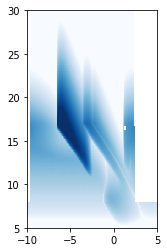

In [65]:


im = plt.imshow(Zf, extent=[-10,5,tau_values[0],tau_values[-1]], origin='lower',
           cmap=colormap2,norm=normalize, alpha=1.)



In [147]:
ct = pi.cosmotherm()
ct.ct_Drho_rho_dec = 3e-5
# ct.ct_h = 0.70
# ct.ct_Omega_b = 0.0457
# ct.ct_Omega_m = 0.30
cosmo = pi.cosmo()
X_dm = pi.dm_particle()
pi.set_dm_params_to_CT_pi_params(X_dm,ct)
pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)


xi_array = np.logspace(np.log10(1e1),np.log10(1.e8),100)
Gamma_inj_min = 1e-8
Gamma_inj_max = 1e-6
N_Gamma_inj = 4
#Gamma_values = np.logspace(np.log10(Gamma_inj_min),np.log10(Gamma_inj_max),N_Gamma_inj)
#Gamma_values = [1e-8,5e-8,1e-7,5e-7,1e-6,1e-5]
Gamma_values = [1e-8,1e-5]
#gamma_labels = [r'$10^{-8}$',r'$5\times10^{-8}$',r'$10^{-7}$',r'$5\times10^{-7}$',r'$10^{-6}$',r'$10^{-5}$']
gamma_labels = [str(g) for g in Gamma_values]
f_dm_high_z = {}
f_dm_high_z['curves'] = []
f_dm_high_z['Gamma_inj'] = []




for gamma in Gamma_values:
    mu_high_z = {}
    mu_high_z['x'] = xi_array
    mui = []
    for xi in xi_array:
        X_dm.x_0 = xi
        X_dm.Gamma_inj = gamma
        #X_dm.f_dm = pi.get_fdm_from_Drho_rho(ct.ct_Drho_rho_dec,cosmo,ct,X_dm)['tot']
        #print(r)
        mui.append(pi.high_redshift_f_dm_limit(7.4e-5,cosmo,ct,X_dm,N_int = 5))
    mu_high_z['mu'] = np.asarray(mui)
    f_dm_high_z['curves'].append(mu_high_z)
    f_dm_high_z['Gamma_inj'].append(gamma)

Gamma_values_high_z = Gamma_values

In [22]:
Nx = 200
xi_array = np.logspace(-6,6,Nx)

Gamma_values = [1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16,1e-17]
gamma_labels = [r'$10^{-8}$',r'$10^{-9}$',r'$10^{-10}$',r'$10^{-11}$',r'$10^{-12}$',r'$10^{-13}$',r'$10^{-14}$',r'$10^{-15}$',r'$10^{-16}$',r'$10^{-17}$']






firas = sd.firas()
edges = sd.edges()
a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges
a_dict['add_edges'] = 'yes'

f_dm_fisher_lyc_reio_with_edges = sd.pi_run_fisher_constraints(Gamma_values,xi_array,sd_lib_lyc_reio,**a_dict)

a_dict['add_edges'] = 'no'

f_dm_fisher_lyc_reio_no_edges = sd.pi_run_fisher_constraints(Gamma_values,xi_array,sd_lib_lyc_reio,**a_dict)



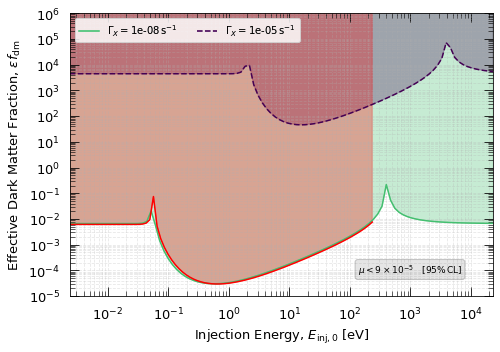

In [44]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

mklist = iter(['o','s','d','v','>'])
lstyles = iter(['-','--','-.',':','-','--','-.',':','-','--','-.',':'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 13
title_size = 13
legend_size = 25
handle_length = 1.5

Gamma_values = Gamma_values_high_z

# ymin=1e-6
# ymax = 2e-2
# x_min = 1e1
# x_max = 1e8
# ax.set_xlim(x_min,x_max)
# ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(label_fdm,size=title_size)
ax.set_xlabel(label_injection_energy,size=title_size)
ax.yaxis.set_label_coords(-.11,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
i = 0
color=iter(cm.viridis(np.linspace(0.7,0,len(Gamma_values))))
for gamma in np.flip(Gamma_values):
    col = next(color)
    lst = next(lstyles)
    #mk = next(mklist)
    ax.plot(xinj_to_Einj*f_dm_high_z['curves'][i]['x'],np.abs(f_dm_high_z['curves'][i]['mu']),c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=lst)#, marker=mk,markersize=3)


    ax.fill_between(xinj_to_Einj*f_dm_high_z['curves'][i]['x'], np.abs(f_dm_high_z['curves'][i]['mu']),1e100,color=col,alpha=0.3)


    i += 1

f_dm_fisher=f_dm_fisher_lyc_reio_with_edges
ax.plot(xinj_to_Einj*f_dm_fisher['curves'][0]['x'],np.abs(f_dm_fisher['curves'][0]['fdm']),c='r',ls='-', marker='None')
ax.fill_between(xinj_to_Einj*f_dm_fisher['curves'][0]['x'], np.abs(f_dm_fisher['curves'][0]['fdm']),1e100,color='r',alpha=0.3)


ax.text(0.68, 0.12, r'$\mu < 9\times10^{-5}\quad$' + r'$[95\%\,\mathrm{CL}]$' , transform=ax.transAxes, fontsize=9, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.2))


plt.ylim(1.e-5,1e6)
plt.xlim(xinj_to_Einj*1e1,xinj_to_Einj*1e8)

leg1 = plt.legend(loc=2,ncol=3,frameon=True,framealpha=0.6,fontsize = 10)
legend_elements = [Line2D([0], [0], marker='o', color='k', label='best-fit to CT',ls='None',
                          markerfacecolor='None', markersize=5)]
#leg2 = plt.legend(handles=legend_elements, loc=(0.745,0.6))
ax.add_artist(leg1)
# ax.add_artist(leg2)
fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_fdm_high_z.pdf')
plt.show()
plt.close(fig)

In [2]:
sd_lib_quasistable = pi.specdist_ct_spectra_lib()
pi.load_ct_spectra_lib('quasistable_particle_210720',sd_lib_quasistable)



In [3]:
sd_lib_quasistable.Gamma_values

array([1.00000000e-21, 2.78255940e-21, 7.74263683e-21, 2.15443469e-20,
       5.99484250e-20, 1.66810054e-19, 4.64158883e-19, 1.29154967e-18,
       3.59381366e-18, 1.00000000e-17])

1188.4863240000002


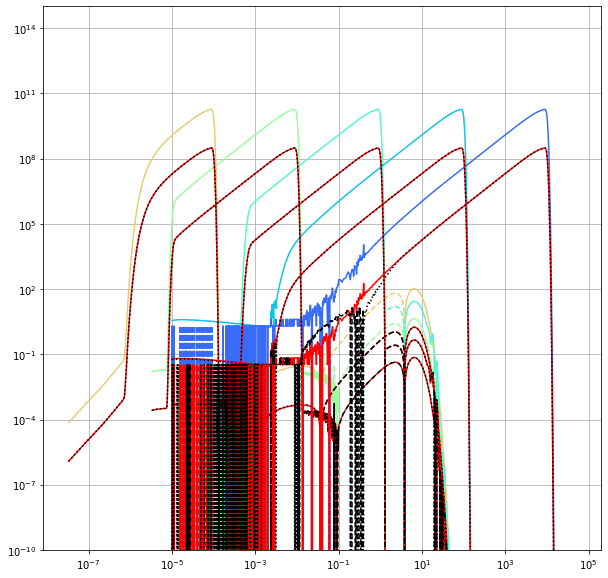

In [18]:
cosmo = pi.cosmo()
Xdm = pi.dm_particle()
ct = pi.cosmotherm()

pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
pi.set_dm_params_to_CT_pi_params(Xdm,ct)

 


fig, ax = plt.subplots(1,1,figsize=(10,10))
color=iter(cm.rainbow(np.linspace(0.7,0.,len(sd_lib_quasistable.x_inj_values))))

fdm_asked = 1.e-7

Xdm.f_dm = fdm_asked
finj = pi.f_inj(Xdm,cosmo)
print(finj)


ig_ref = 4
for i in range(len(sd_lib_quasistable.x_inj_values)):
    col = next(color)
    finj_ref = sd_lib_quasistable.finj_2d[ig_ref][i]
    plt.plot(sd_lib_quasistable.X_2d[ig_ref][i],sd_lib_quasistable.DI_2d[ig_ref][i]*finj/finj_ref,c=col)
    plt.plot(sd_lib_quasistable.X_2d[ig_ref][i],-sd_lib_quasistable.DI_2d[ig_ref][i]*finj/finj_ref,ls='--',c=col)

for i in range(len(sd_lib_quasistable.x_inj_values)):
    ix = i
    Gamma_ref = sd_lib_quasistable.Gamma_values[ig_ref]

    ig_asked = 0
    Gamma_asked = sd_lib_quasistable.Gamma_values[ig_asked]
    rg  = Gamma_asked/Gamma_ref
    finj_ref = sd_lib_quasistable.finj_2d[ig_ref][ix][0]
    rf = finj/finj_ref 

    plt.plot(sd_lib_quasistable.X_2d[ig][ix],sd_lib_quasistable.DI_2d[ig][ix]*rg*rf,c='r')
    plt.plot(sd_lib_quasistable.X_2d[ig][ix],-sd_lib_quasistable.DI_2d[ig][ix]*rg*rf,c='r',ls='--')

    plt.plot(sd_lib_quasistable.X_2d[ig_asked][ix],sd_lib_quasistable.DI_2d[ig_asked][ix]*finj/sd_lib_quasistable.finj_2d[ig_asked][ix],c='k',ls=':')
    plt.plot(sd_lib_quasistable.X_2d[ig_asked][ix],-sd_lib_quasistable.DI_2d[ig_asked][ix]*finj/sd_lib_quasistable.finj_2d[ig_asked][ix],c='k',ls='--')

plt.loglog()
plt.ylim(1e-10,1e15)
plt.grid(which='both')


In [19]:
Gamma_ref

5.994842503189421e-20

In [ ]:
sd_lib_xe_history

In [15]:
# path_to_figures = "/Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/run_scripts_photon_injection_paper/figures/"
Gamma_inj_min = 1e-18
Gamma_inj_max = 1e-8
N_Gamma_inj = 11
Gamma_values = np.logspace(np.log10(Gamma_inj_min),np.log10(Gamma_inj_max),N_Gamma_inj)
Gamma_values = [1e-20,1e-19,1e-18,1e-17]#,5e-16,5e-14,1e-11,1e-8]
N_Gamma_inj = len(Gamma_values)

x_min = 1.e-1
x_max = 5.e6
ymin = 1.e-3
ymax = 2e0

ngamma = N_Gamma_inj 


args = {}
args['param_values_array'] = Gamma_values
args['param_name'] = 'photon injection Gamma_dec'
args['dict_for_fisher'] = {}
args['sd_lib_for_fisher'] = None
ct = pi.cosmotherm()
ct.ct_pi_redshift_evolution_mode=1
R = ct.run_cosmotherm_parallel(**args)

In [16]:
z_array = []
Drho_array = []
i=0
for r,Gamma_asked in zip(R,Gamma_values):
    #print(Gamma_asked)

    #col = next(color)
    #slabel = r"$\Gamma_\mathrm{inj} = $"+scientific_notation(Gamma_asked)
    #ax.plot(r["z"],r["dDrho_rhodt_rel"],c=col,label=slabel)
    
    ct.ct_Gamma_dec = Gamma_asked
    cosmo = pi.cosmo()
    pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
    #print(ct.ct_Gamma_dec)
    
    
    z_array.append(np.logspace(np.log10(cosmo.z_start),np.log10(cosmo.z_end),200))
    Drho_array.append(pi.Drho_rho_inj_at_z_normalized(z_array[i],cosmo,ct))
    i+=1

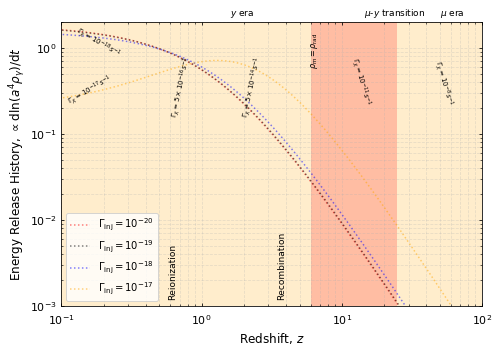

In [22]:
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 11
title_size = 12
legend_size = 25
handle_length = 1.5




ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel("Redshift, "+ r'$z$',size=title_size)
ax.set_ylabel(r"Energy Release History, $\propto \mathrm{d}\ln (a^4 \rho_\gamma)/\mathrm{d}t$",size=title_size)
ax.yaxis.set_label_coords(-.08,0.5)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) ,
                                      numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


ax.axvspan(800., 1500, facecolor='red', alpha=0.4)
ax.text(0.514, 0.03, 'Recombination', transform=ax.transAxes,color='k',rotation=90,fontsize=9)

ax.axvspan(3.e5, x_max, facecolor='orange', alpha=0.6)
ax.text(0.9, 1.02, r'$\mu$ era', fontsize=9,
        transform=ax.transAxes,color='k',rotation=0)

ax.axvspan(5e4, 3e5, facecolor='orange', alpha=0.4)
ax.text(0.72, 1.02, r'$\mu$-$y$ transition', fontsize=9,transform=ax.transAxes,color='k',
        rotation=0)

ax.axvspan(x_min, 5e4, facecolor='orange', alpha=0.2)
ax.text(0.4, 1.02, r'$y$ era', fontsize=9, transform=ax.transAxes,color='k',rotation=0)



ax.axvspan(6., 25, facecolor='red', alpha=0.2)
ax.text(0.253, 0.03, 'Reionization', transform=ax.transAxes,color='k',rotation=90,fontsize=9)



color=iter(cm.rainbow(np.linspace(0.7,0.,ngamma)))
color=iter(['r','k','b','orange'])
i = 0
for r,Gamma_asked in zip(R,Gamma_values):
    #print(Gamma_asked)

    col = next(color)
    slabel = r"$\Gamma_\mathrm{inj} = $"+scientific_notation(Gamma_asked)
    ax.plot(r["z"],r["dDrho_rhodt_rel"],c=col,ls=':',alpha=0.5,label=slabel)
    
    ct.ct_Gamma_dec = Gamma_asked
    cosmo = pi.cosmo()
    pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
    #print(ct.ct_Gamma_dec)
    
    
#     z_array = np.logspace(np.log10(cosmo.z_start),np.log10(cosmo.z_end),200)
#     Drho_array=pi.Drho_rho_inj_at_z_normalized(z_array,cosmo,ct)

    #ax.plot(z_array[i],np.abs(Drho_array[i]),c=col,ls='-',alpha=1.)      
    try:
        zX = pi.injection_redshift_zX(Gamma_asked,cosmo,ct)
        #ax.axvline(zX)
        #print(zX)
    except:
        zX = 0.
    i+=1

ax.axvline(cosmo.z_eq(),c='k',ls='--',alpha=0.8)
ax.text(0.588, 0.85, r'$\rho_\mathrm{m}=\rho_\mathrm{rad}$', fontsize=8,transform=ax.transAxes,color='k',rotation=90)

#Gamma_values = [1e-18,1e-17,5e-16,5e-14,1e-11,1e-8]
ax.text(0.03, 0.875, r'$\Gamma_X = 10^{-18}\,s^{-1}$', fontsize=7,transform=ax.transAxes,color='k',
        rotation=-30)


ax.text(0.01, 0.71, r'$\Gamma_X = 10^{-17}\,s^{-1}$', fontsize=7,transform=ax.transAxes,color='k',
        rotation=30)

ax.text(0.255, 0.671, r'$\Gamma_X = 5\times 10^{-16}\,s^{-1}$', fontsize=7,transform=ax.transAxes,color='k',
        rotation=78)

ax.text(0.425, 0.671, r'$\Gamma_X = 5\times 10^{-14}\,s^{-1}$', fontsize=7,transform=ax.transAxes,color='k',
        rotation=78)

ax.text(0.6825, 0.71, r'$\Gamma_X = 10^{-11}\,s^{-1}$', fontsize=7,transform=ax.transAxes,color='k',
        rotation=-74)

ax.text(0.88, 0.71, r'$\Gamma_X = 10^{-8}\,s^{-1}$', fontsize=7,transform=ax.transAxes,color='k',
        rotation=-74)




ax.loglog()
plt.xlim(1e-1,1e2)
# my_cmap = cm.viridis
# sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0, vmax=1))
# cbar = plt.colorbar(sm)
# cbar.set_ticks([0.,0.2,0.4,0.6,0.8,1.])
# cbar.ax.set_yticklabels([r'$10^{-8}$',r'$10^{-10}$',r'$10^{-12}$',r'$10^{-14}$',r'$10^{-16}$',r'$10^{-18}$'])
# cbar.ax.set_title(r'$\Gamma_\mathrm{inj}\,[\mathrm{s}^{-1}]$')
ax.legend()
fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_drho_rho_llp.pdf')
plt.show()
plt.close(fig)

In [4]:
sd_lib_xe_history.Xe_PCA_EigenModes['E1']['z']

array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 3.9998e+03, 3.9999e+03,
       4.0000e+03])

In [3]:
gamma_asked = 1e-17
xinj_asked = 1e-5
x_asked = np.logspace(-10,10,300)
S_xe_history = pi.GetSpectra(gamma_asked,xinj_asked,x_asked,sd_lib_xe_history)


[]

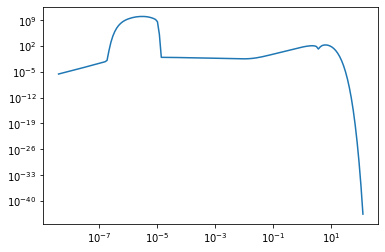

In [4]:
plt.plot(S_xe_history['x'],np.abs(S_xe_history['DI']))
plt.loglog()

(0.01, 10000.0)

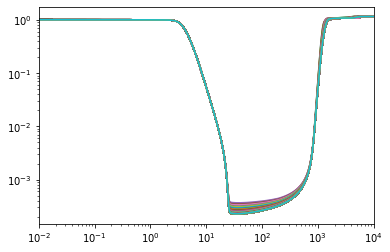

In [3]:
for i in range(len(sd_lib_xe_history.Xe_values_2d[9])):
    if i%1 == 0:
        Xe = sd_lib_xe_history.Xe_values_2d[9][i]
        z = sd_lib_xe_history.Xe_redshifts_2d[9][i]
        plt.plot(z,Xe)
plt.loglog()
plt.xlim(0.01,1e4)

(0.0001, 10.0)

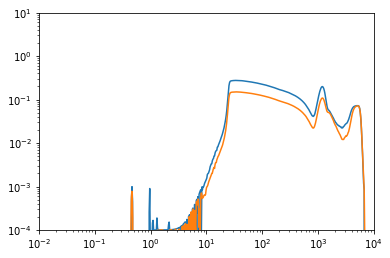

In [17]:
for i in range(len(sd_lib_xe_history.DXe_Xe_2d[9])):
    if i == 180:
        Xe = sd_lib_xe_history.DXe_Xe_2d[9][i]
        z = sd_lib_xe_history.DXe_Xe_redshifts_2d[9][i]
        plt.plot(z,Xe)
plt.plot(S['z'],S['DXe_Xe'])
plt.loglog()
plt.xlim(0.01,1e4)
plt.ylim(1e-4,1e1)

In [16]:
z_asked = np.logspace(-2,6,1000)
gamma = sd_lib_xe_history.Gamma_values[9]
xinj = sd_lib_xe_history.x_inj_values[180]*2.
S = pi.GetXeHistory(gamma,xinj,z_asked,sd_lib_xe_history)

(0.01, 10000.0)

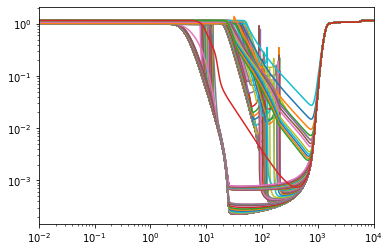

In [49]:
for i in range(len(sd_lib_xe_history_finj_fisher.Xe_values_2d[0])):
    Xe = sd_lib_xe_history_finj_fisher.Xe_values_2d[0][i]
    z = sd_lib_xe_history_finj_fisher.Xe_redshifts_2d[0][i]
    plt.plot(z,Xe)
plt.loglog()
plt.xlim(0.01,1e4)

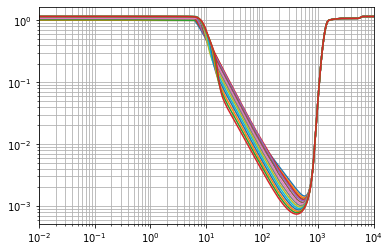

In [94]:
for i in range(len(sd_lib_xe_history.Xe_values_2d[0])):
    Xe = sd_lib_xe_history.Xe_values_2d[0][i]
    z = sd_lib_xe_history.Xe_redshifts_2d[0][i]
    xinj = sd_lib_xe_history.x_inj_values[i]
    if i>=170:
        plt.plot(z,Xe,label='xinj=%.3e'%xinj)
plt.loglog()
plt.xlim(0.01,1e4)
#plt.legend(loc=3)
plt.grid(which='both')
plt.savefig(path_to_figures + '/figures_for_paper_Xe.pdf')

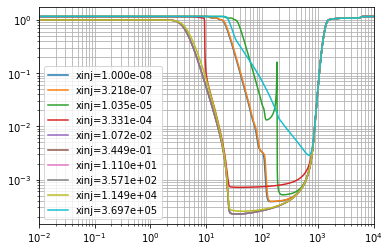

In [56]:
for i in range(len(sd_lib_xe_history_finj_fisher.Xe_values_2d[0])):
    Xe = sd_lib_xe_history_finj_fisher.Xe_values_2d[0][i]
    z = sd_lib_xe_history_finj_fisher.Xe_redshifts_2d[0][i]
    xinj = sd_lib_xe_history_finj_fisher.x_inj_values[i]
    if i%20 == 0:
        plt.plot(z,Xe,label='xinj=%.3e'%xinj)
plt.loglog()
plt.xlim(0.01,1e4)
plt.legend(loc=3)
plt.grid(which='both')
plt.savefig(path_to_figures + '/figures_for_paper_Xe_finj_fisher.pdf')

In [57]:
1./1.31e4*307845.44640415715*1e-08

2.3499652397263905e-07

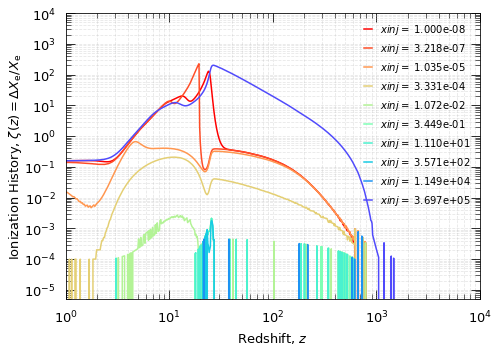

In [51]:
Xe = []
z = []

DXe_Xe = []
DXe_Xe_fisher = []

Xe_noinj = []
z_noinj = []

xinj = []
# fname = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/ct_spectra/case_reio_paper_2020/outputs/Xe_Recfast++.DM_decay_heating.Rec_corrs_CT2010.Tr0.dat'
# for i in np.arange(6).tolist():
#     D = np.loadtxt(fname)
#     Xe.append(D[:,1])
#     z.append(D[:,0])
#     fname = fname.replace(str(i)+'.dat',str(i+1)+'.dat')
#     #print(fname)
# # np.loadtxt
# fname = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/ct_spectra/case_reio_paper_2020/outputs/Xe_Recfast++.Rec_corrs_CT2010.Tr.reion_VP.dat'
# D = np.loadtxt(fname)
# Xe.append(D[:,1])
# z.append(D[:,0])

for i in range(len(sd_lib_xe_history.Xe_values_2d[0])):
    #if i%5 == 0:
    Xe.append(sd_lib_xe_history.Xe_values_2d[0][i])
    z.append(sd_lib_xe_history.Xe_redshifts_2d[0][i])
    Xe_noinj.append(sd_lib_xe_history.Xe_values_no_inj_2d[0][i])
    z_noinj.append(sd_lib_xe_history.Xe_redshifts_no_inj_2d[0][i])
    DXe_Xe.append(sd_lib_xe_history.DXe_Xe_2d[0][i])
    DXe_Xe_fisher.append(sd_lib_xe_history_finj_fisher.DXe_Xe_2d[0][i])
    xinj.append(sd_lib_xe_history_finj_fisher.x_inj_values[i])




#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 13
title_size = 13
legend_size = 25
handle_length = 0.8



ymin=5e-6
ymax = 1e4
x_max = 1e4
x_min = 1
ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel(label_redshift,size=title_size)
ax.set_ylabel(label_Zeta_e,size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
i = 0
# gvals = [1e-15,1e-14,2e-14,5e-14,1e-13,2e-13,5e-13]
color=iter(cm.rainbow(np.linspace(1.,0,len(z))))
for i in range((len(z))):
    col = next(color)
    if i%20==0:
        
        ax.plot(z[i],np.abs(DXe_Xe[i]),c=col,ls='-',label=r'$xinj=$ %.3e'%xinj[i])
        #ax.plot(z[i],np.abs(DXe_Xe_fisher[i]),c=col,ls='--',label=r'$xinj=$ %.3e'%xinj[i])




# ax.text(0.75, 0.1, r'$f_\mathrm{dm}=10^{-5}$', transform=ax.transAxes, fontsize=9, verticalalignment='top',
#           bbox=dict(boxstyle='round', facecolor='grey', alpha=0.2))


# ax.text(0.03, 0.11, r'$\Gamma_\mathrm{inj}=$'+scientific_notation(ct.ct_Gamma_dec)+r'$\,\mathrm{s}^{-1}$', transform=ax.transAxes, fontsize=10, verticalalignment='top',
#           bbox=dict(boxstyle='round', facecolor='r', alpha=0.2))


# plt.ylim(-2.,5)
#plt.xlim(1e-3,13)

ax.legend(loc=1,ncol=1,frameon=False,framealpha=0.6,fontsize = 10,handlelength=handle_length)

fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_DXe_Xe.pdf')
plt.show()
plt.close(fig)

In [24]:
Nx = 400
xi_array = np.logspace(-8,8,Nx)

#Gamma_values = [1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16,1e-17]
Gamma_values = [1e-17,1e-13]
#gamma_labels = [r'$10^{-8}$',r'$10^{-9}$',r'$10^{-10}$',r'$10^{-11}$',r'$10^{-12}$',r'$10^{-13}$',r'$10^{-14}$',r'$10^{-15}$',r'$10^{-16}$',r'$10^{-17}$']
gamma_labels = [r'$10^{-17}$',r'$10^{-13}$']





firas = sd.firas()
edges = sd.edges()
a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges
a_dict['add_edges'] = 'yes'

# Gamma_values = np.logspace(-17,-8,3)
# for gammas in Gamma_values:
#     xi_array = np.logspace(-16,-10,100)
#     D = sd.pi_run_fisher_constraints([gammas],xi_array,sd_lib_bare,**a_dict)
#     #print(D['curves'][0]['fdm'])

f_dm_fisher_xe_history = sd.pi_run_fisher_constraints(Gamma_values,xi_array,sd_lib_xe_history,**a_dict)
#f_dm_fisher_xe_history_finj_fisher = sd.pi_run_fisher_constraints(Gamma_values,xi_array,sd_lib_xe_history_finj_fisher,**a_dict)
# f_dm_fisher_lyc_reio = sd.pi_run_fisher_constraints(Gamma_values,xi_array,sd_lib_lyc_reio,**a_dict)




In [4]:
sd.pi_run_fisher_constraints([1e-17],[1e-8],sd_lib_xe_history,**a_dict)

{'curves': [{'x': [1e-08],
   'fdm': array([2.35032407e-07]),
   'finj': array([307845.44640416])}],
 'Gamma_inj': [1e-17]}

In [6]:
pi.pi_run_fisher_constraints([1e-17],[1e-8],sd_lib_xe_history_finj_fisher,**a_dict)

{'curves': [{'x': [1e-08],
   'fdm': array([2.35818329e-07]),
   'finj': array([308874.84675715])}],
 'Gamma_inj': [1e-17]}

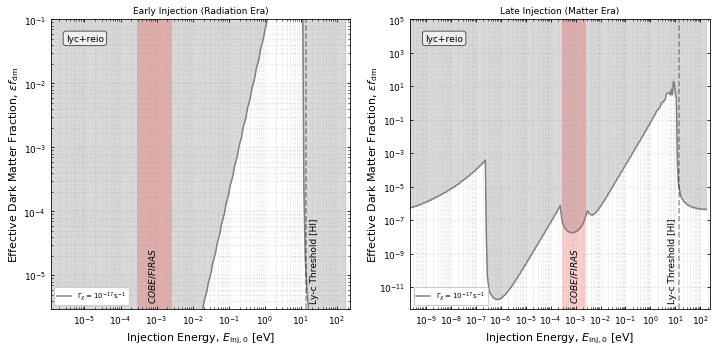

In [8]:
photon_injection_case = 'xe_history_200720'
photon_injection_case = 'lyc_reio'
#Gamma_values = np.logspace(-17,-8,3)
if photon_injection_case == 'bare':
    f_dm_fisher = f_dm_fisher_bare
    case = 'bare'
if photon_injection_case == 'lyc':
    f_dm_fisher = f_dm_fisher_lyc
    case = 'lyc'
if photon_injection_case == 'lyc_reio':
    f_dm_fisher = f_dm_fisher_lyc_reio
    case = 'lyc+reio'
if 'xe_history' in photon_injection_case:
    f_dm_fisher = f_dm_fisher_xe_history
    case = 'lyc+reio xe history'

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

mklist = iter(['o','s','d','v','>','o','s','d','v','>'])
colors = iter(['grey','forestgreen','b','purple','k','r','b','green','grey'])
lstyles = iter(['-','--','-.',':','-','--','-.',':','-','--','-.',':'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
label_size = 9
title_size = 11
legend_size = 25
handle_length = 1.5

for ax in (ax1,ax2):
    ax.set_xscale('log')
    ax.set_yscale('log')


    ax.set_ylabel(label_fdm,size=title_size)
    ax.set_xlabel(label_injection_energy,size=title_size)
    ax.yaxis.set_label_coords(-.10,0.5)


    ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(True) #(3)

    ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
    ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
    ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
    ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)

    # manipulate x-axis ticks and labels
    ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(True)

    ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

    
    
    #ax.axvspan(1.e-3*xinj_to_Einj, 2e-3*xinj_to_Einj,ymin=0.,ymax=0.1, facecolor='blue', alpha=0.2,label=r'$\mathrm{EDGES}$')
    #ax.axvspan(0.5*xinj_to_Einj, 105*xinj_to_Einj,ymin=0.,ymax=0.1,  facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
    ax.axvspan(1.2*xinj_to_Einj, 11.2*xinj_to_Einj,ymin=0.,ymax=1, facecolor='red', alpha=0.2)
    
i = 0
color=iter(cm.viridis(np.linspace(0.7,0,len(Gamma_values))))
for gamma in np.flip(Gamma_values):
#     if i==0:
#         i += 1
#         continue
    col = next(colors)
    mk = next(mklist)
    ls = next(lstyles)
    #ax.plot(f_dm_high_z['curves'][i]['x'],f_dm_high_z['curves'][i]['mu'],c=col,label=r'$\Gamma_X=$'+scientific_notation(f_dm_high_z['Gamma_inj'][i])+r'$\,\mathrm{s^{-1}}$',ls='None', marker=mk,markersize=3)
    if i<5:
        ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],f_dm_fisher['curves'][i]['fdm'],
                 c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=ls)#, marker=,markersize=3)
        ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],-f_dm_fisher['curves'][i]['fdm'],
                 c=col,ls=ls)#, marker=mk,markersize=3)
        ax1.fill_between(xinj_to_Einj*f_dm_fisher['curves'][i]['x'], np.abs(f_dm_fisher['curves'][i]['fdm']),1e100,color=col,alpha=0.3)
    if i<5:
        ax2.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],f_dm_fisher['curves'][i]['fdm'],
                 c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=ls)#, marker=mk,markersize=3,markerfacecolor='None')
        ax2.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],-f_dm_fisher['curves'][i]['fdm'],
                 c=col,ls=ls)#, marker=mk,markersize=3,markerfacecolor='None')
        ax2.fill_between(xinj_to_Einj*f_dm_fisher['curves'][i]['x'], np.abs(f_dm_fisher['curves'][i]['fdm']),1e100,color=col,alpha=0.3)


    i += 1

ax2.text(0.05, 0.95, case , transform=ax2.transAxes, fontsize=9, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='white', alpha=0.6))

ax1.text(0.05, 0.95, case , transform=ax1.transAxes, fontsize=9, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='white', alpha=0.6))

ax1.set_ylim(3.e-6,1e-1)
ax1.set_xlim(xinj_to_Einj*5e-3,xinj_to_Einj*1e6)

ax2.set_ylim(5.e-13,1e5)
ax2.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)

#leg1 = plt.legend(loc=3,ncol=2,frameon=True,framealpha=0.6,fontsize = 9)
#legend_elements = [Line2D([0], [0], marker='o', color='k', label='best-fit to CT',ls='None',
#                          markerfacecolor='None', markersize=5)]
#leg2 = plt.legend(handles=legend_elements, loc=(0.745,0.6))
ax1.legend(loc=3,ncol=1,frameon=True,framealpha=1.,fontsize = 7)
ax2.legend(loc=3,ncol=1,frameon=True,framealpha=1.,fontsize = 7)

if 'lyc' in photon_injection_case:
    ax2.axvline(5.7895e4*xinj_to_Einj,ls='--',alpha=0.4,c='k')
    ax2.text(0.86, 0.02, 'Ly-c Threshold [HI]' , transform=ax2.transAxes, fontsize=9,
             verticalalignment='bottom',rotation = 90)
    ax1.axvline(5.7895e4*xinj_to_Einj,ls='--',alpha=0.4,c='k')
    ax1.text(0.865, 0.02, 'Ly-c Threshold [HI]' , transform=ax1.transAxes, fontsize=9,
             verticalalignment='bottom',rotation = 90)
ax1.set_title(r'Early Injection (Radiation Era)',fontsize=9)
ax2.set_title(r'Late Injection (Matter Era)',fontsize=9)
ax1.text(0.322, 0.02, r'$COBE/FIRAS$' , transform=ax1.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
ax2.text(0.53, 0.02, r'$COBE/FIRAS$' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
# ax.add_artist(leg2).tight_layout(pad=3.0)
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)

plt.savefig(path_to_figures + '/figures_for_paper_fdm_fisher_'+photon_injection_case+'.pdf')
plt.show()
#plt.close(fig)

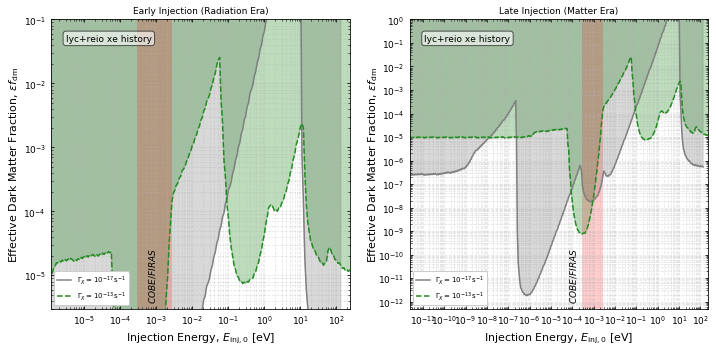

In [25]:
photon_injection_case = 'xe_history_200720'
#photon_injection_case = 'lyc_reio'
#Gamma_values = np.logspace(-17,-8,3)
if photon_injection_case == 'bare':
    f_dm_fisher = f_dm_fisher_bare
    case = 'bare'
if photon_injection_case == 'lyc':
    f_dm_fisher = f_dm_fisher_lyc
    case = 'lyc'
if photon_injection_case == 'lyc_reio':
    f_dm_fisher = f_dm_fisher_lyc_reio
    case = 'lyc+reio'
if 'xe_history' in photon_injection_case:
    f_dm_fisher = f_dm_fisher_xe_history
    case = 'lyc+reio xe history'

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

mklist = iter(['o','s','d','v','>','o','s','d','v','>'])
colors = iter(['grey','forestgreen','b','purple','k','r','b','green','grey'])
lstyles = iter(['-','--','-.',':','-','--','-.',':','-','--','-.',':'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
label_size = 9
title_size = 11
legend_size = 25
handle_length = 1.5

for ax in (ax1,ax2):
    ax.set_xscale('log')
    ax.set_yscale('log')


    ax.set_ylabel(label_fdm,size=title_size)
    ax.set_xlabel(label_injection_energy,size=title_size)
    ax.yaxis.set_label_coords(-.10,0.5)


    ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(True) #(3)

    ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
    ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
    ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
    ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)

    # manipulate x-axis ticks and labels
    ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(True)

    ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

    
    
    #ax.axvspan(1.e-3*xinj_to_Einj, 2e-3*xinj_to_Einj,ymin=0.,ymax=0.1, facecolor='blue', alpha=0.2,label=r'$\mathrm{EDGES}$')
    #ax.axvspan(0.5*xinj_to_Einj, 105*xinj_to_Einj,ymin=0.,ymax=0.1,  facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
    ax.axvspan(1.2*xinj_to_Einj, 11.2*xinj_to_Einj,ymin=0.,ymax=1, facecolor='red', alpha=0.2)
    
i = 0
color=iter(cm.viridis(np.linspace(0.7,0,len(Gamma_values))))
for gamma in np.flip(Gamma_values):
#     if i==0:
#         i += 1
#         continue
    col = next(colors)
    mk = next(mklist)
    ls = next(lstyles)
    #ax.plot(f_dm_high_z['curves'][i]['x'],f_dm_high_z['curves'][i]['mu'],c=col,label=r'$\Gamma_X=$'+scientific_notation(f_dm_high_z['Gamma_inj'][i])+r'$\,\mathrm{s^{-1}}$',ls='None', marker=mk,markersize=3)
    if i<5:
        ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],f_dm_fisher['curves'][i]['fdm'],
                 c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=ls)#, marker=,markersize=3)
        ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],-f_dm_fisher['curves'][i]['fdm'],
                 c=col,ls=ls)#, marker=mk,markersize=3)
        ax1.fill_between(xinj_to_Einj*f_dm_fisher['curves'][i]['x'], np.abs(f_dm_fisher['curves'][i]['fdm']),1e100,color=col,alpha=0.3)
    if i<5:
        ax2.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],f_dm_fisher['curves'][i]['fdm'],
                 c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=ls)#, marker=mk,markersize=3,markerfacecolor='None')
        ax2.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],-f_dm_fisher['curves'][i]['fdm'],
                 c=col,ls=ls)#, marker=mk,markersize=3,markerfacecolor='None')
        ax2.fill_between(xinj_to_Einj*f_dm_fisher['curves'][i]['x'], np.abs(f_dm_fisher['curves'][i]['fdm']),1e100,color=col,alpha=0.3)


    i += 1

ax2.text(0.05, 0.95, case , transform=ax2.transAxes, fontsize=9, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='white', alpha=0.6))

ax1.text(0.05, 0.95, case , transform=ax1.transAxes, fontsize=9, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='white', alpha=0.6))

ax1.set_ylim(3.e-6,1e-1)
ax1.set_xlim(xinj_to_Einj*5e-3,xinj_to_Einj*1e6)

ax2.set_ylim(5.e-13,1e0)
ax2.set_xlim(xinj_to_Einj*1e-8,xinj_to_Einj*1e6)

#leg1 = plt.legend(loc=3,ncol=2,frameon=True,framealpha=0.6,fontsize = 9)
#legend_elements = [Line2D([0], [0], marker='o', color='k', label='best-fit to CT',ls='None',
#                          markerfacecolor='None', markersize=5)]
#leg2 = plt.legend(handles=legend_elements, loc=(0.745,0.6))
ax1.legend(loc=3,ncol=1,frameon=True,framealpha=1.,fontsize = 7)
ax2.legend(loc=3,ncol=1,frameon=True,framealpha=1.,fontsize = 7)

if 'lyc' in photon_injection_case:
    ax2.axvline(5.7895e4*xinj_to_Einj,ls='--',alpha=0.4,c='k')
    ax2.text(0.86, 0.02, 'Ly-c Threshold [HI]' , transform=ax2.transAxes, fontsize=9,
             verticalalignment='bottom',rotation = 90)
    ax1.axvline(5.7895e4*xinj_to_Einj,ls='--',alpha=0.4,c='k')
    ax1.text(0.865, 0.02, 'Ly-c Threshold [HI]' , transform=ax1.transAxes, fontsize=9,
             verticalalignment='bottom',rotation = 90)
ax1.set_title(r'Early Injection (Radiation Era)',fontsize=9)
ax2.set_title(r'Late Injection (Matter Era)',fontsize=9)
ax1.text(0.322, 0.02, r'$COBE/FIRAS$' , transform=ax1.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
ax2.text(0.53, 0.02, r'$COBE/FIRAS$' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
# ax.add_artist(leg2).tight_layout(pad=3.0)
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)

plt.savefig(path_to_figures + '/figures_for_paper_fdm_fisher_'+photon_injection_case+'.pdf')
plt.show()
#plt.close(fig)

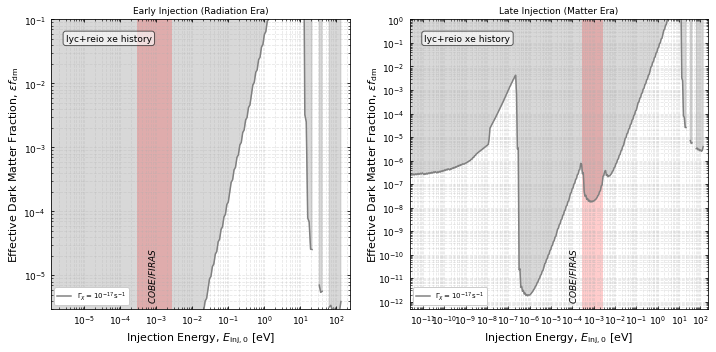

In [9]:
photon_injection_case = 'xe_history_200720_finj_fisher'
#photon_injection_case = 'lyc_reio'
#Gamma_values = np.logspace(-17,-8,3)
if photon_injection_case == 'bare':
    f_dm_fisher = f_dm_fisher_bare
    case = 'bare'
if photon_injection_case == 'lyc':
    f_dm_fisher = f_dm_fisher_lyc
    case = 'lyc'
if photon_injection_case == 'lyc_reio':
    f_dm_fisher = f_dm_fisher_lyc_reio
    case = 'lyc+reio'
if 'xe_history' in photon_injection_case:
    f_dm_fisher = f_dm_fisher_xe_history_finj_fisher
    case = 'lyc+reio xe history'

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

mklist = iter(['o','s','d','v','>','o','s','d','v','>'])
colors = iter(['grey','forestgreen','b','purple','k','r','b','green','grey'])
lstyles = iter(['-','--','-.',':','-','--','-.',':','-','--','-.',':'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
label_size = 9
title_size = 11
legend_size = 25
handle_length = 1.5

for ax in (ax1,ax2):
    ax.set_xscale('log')
    ax.set_yscale('log')


    ax.set_ylabel(label_fdm,size=title_size)
    ax.set_xlabel(label_injection_energy,size=title_size)
    ax.yaxis.set_label_coords(-.10,0.5)


    ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(True) #(3)

    ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
    ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
    ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
    ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)

    # manipulate x-axis ticks and labels
    ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(True)

    ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

    
    
    #ax.axvspan(1.e-3*xinj_to_Einj, 2e-3*xinj_to_Einj,ymin=0.,ymax=0.1, facecolor='blue', alpha=0.2,label=r'$\mathrm{EDGES}$')
    #ax.axvspan(0.5*xinj_to_Einj, 105*xinj_to_Einj,ymin=0.,ymax=0.1,  facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
    ax.axvspan(1.2*xinj_to_Einj, 11.2*xinj_to_Einj,ymin=0.,ymax=1, facecolor='red', alpha=0.2)
    
i = 0
color=iter(cm.viridis(np.linspace(0.7,0,len(Gamma_values))))
for gamma in np.flip(Gamma_values):
#     if i==0:
#         i += 1
#         continue
    col = next(colors)
    mk = next(mklist)
    ls = next(lstyles)
    #ax.plot(f_dm_high_z['curves'][i]['x'],f_dm_high_z['curves'][i]['mu'],c=col,label=r'$\Gamma_X=$'+scientific_notation(f_dm_high_z['Gamma_inj'][i])+r'$\,\mathrm{s^{-1}}$',ls='None', marker=mk,markersize=3)
    if i<5:
        ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],f_dm_fisher['curves'][i]['fdm'],
                 c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=ls)#, marker=,markersize=3)
        ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],-f_dm_fisher['curves'][i]['fdm'],
                 c=col,ls=ls)#, marker=mk,markersize=3)
        ax1.fill_between(xinj_to_Einj*f_dm_fisher['curves'][i]['x'], np.abs(f_dm_fisher['curves'][i]['fdm']),1e100,color=col,alpha=0.3)
    if i<5:
        ax2.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],f_dm_fisher['curves'][i]['fdm'],
                 c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=ls)#, marker=mk,markersize=3,markerfacecolor='None')
        ax2.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],-f_dm_fisher['curves'][i]['fdm'],
                 c=col,ls=ls)#, marker=mk,markersize=3,markerfacecolor='None')
        ax2.fill_between(xinj_to_Einj*f_dm_fisher['curves'][i]['x'], np.abs(f_dm_fisher['curves'][i]['fdm']),1e100,color=col,alpha=0.3)


    i += 1

ax2.text(0.05, 0.95, case , transform=ax2.transAxes, fontsize=9, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='white', alpha=0.6))

ax1.text(0.05, 0.95, case , transform=ax1.transAxes, fontsize=9, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='white', alpha=0.6))

ax1.set_ylim(3.e-6,1e-1)
ax1.set_xlim(xinj_to_Einj*5e-3,xinj_to_Einj*1e6)

ax2.set_ylim(5.e-13,1e0)
ax2.set_xlim(xinj_to_Einj*1e-8,xinj_to_Einj*1e6)

#leg1 = plt.legend(loc=3,ncol=2,frameon=True,framealpha=0.6,fontsize = 9)
#legend_elements = [Line2D([0], [0], marker='o', color='k', label='best-fit to CT',ls='None',
#                          markerfacecolor='None', markersize=5)]
#leg2 = plt.legend(handles=legend_elements, loc=(0.745,0.6))
ax1.legend(loc=3,ncol=1,frameon=True,framealpha=1.,fontsize = 7)
ax2.legend(loc=3,ncol=1,frameon=True,framealpha=1.,fontsize = 7)

if 'lyc' in photon_injection_case:
    ax2.axvline(5.7895e4*xinj_to_Einj,ls='--',alpha=0.4,c='k')
    ax2.text(0.86, 0.02, 'Ly-c Threshold [HI]' , transform=ax2.transAxes, fontsize=9,
             verticalalignment='bottom',rotation = 90)
    ax1.axvline(5.7895e4*xinj_to_Einj,ls='--',alpha=0.4,c='k')
    ax1.text(0.865, 0.02, 'Ly-c Threshold [HI]' , transform=ax1.transAxes, fontsize=9,
             verticalalignment='bottom',rotation = 90)
ax1.set_title(r'Early Injection (Radiation Era)',fontsize=9)
ax2.set_title(r'Late Injection (Matter Era)',fontsize=9)
ax1.text(0.322, 0.02, r'$COBE/FIRAS$' , transform=ax1.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
ax2.text(0.53, 0.02, r'$COBE/FIRAS$' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
# ax.add_artist(leg2).tight_layout(pad=3.0)
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)

plt.savefig(path_to_figures + '/figures_for_paper_fdm_fisher_'+photon_injection_case+'.pdf')
plt.show()
#plt.close(fig)

In [26]:
np.logspace(np.log10(1e-4),np.log10(1e6),6)

array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04, 1.e+06])

In [111]:
np.shape(sd_lib_xe_history.finj_2d)
sd_lib_xe_history.finj_2d[0][0]

[8.33180319e-07,
 8.60581436e-07,
 8.88658322e-07,
 9.17651245e-07,
 9.47590091e-07,
 9.78505725e-07,
 1.01043001e-06,
 1.04339587e-06,
 1.07743728e-06,
 1.11258932e-06,
 1.14888825e-06,
 1.18637148e-06,
 1.22507765e-06,
 1.26504666e-06,
 1.30631971e-06,
 1.34893936e-06,
 1.39294954e-06,
 1.43839563e-06,
 1.48532446e-06,
 1.53378443e-06,
 1.58382549e-06,
 1.63549922e-06,
 1.68885891e-06,
 1.74395956e-06,
 1.80085798e-06,
 1.85961283e-06,
 1.92028467e-06,
 1.98293607e-06,
 2.04763161e-06,
 2.114438e-06,
 2.1834241e-06,
 2.25466105e-06,
 2.32822228e-06,
 2.40418365e-06,
 2.48262347e-06,
 2.5636226e-06,
 2.64726457e-06,
 2.73363561e-06,
 2.82282478e-06,
 2.91492403e-06,
 3.01002833e-06,
 3.10823574e-06,
 3.20964751e-06,
 3.31436821e-06,
 3.42250582e-06,
 3.53417185e-06,
 3.64948144e-06,
 3.76855348e-06,
 3.89151077e-06,
 4.01848008e-06,
 4.14959236e-06,
 4.28498281e-06,
 4.42479103e-06,
 4.56916121e-06,
 4.71824223e-06,
 4.87218783e-06,
 5.03115677e-06,
 5.195313e-06,
 5.36482581e-06,
 5.

In [108]:
np.shape(sd_lib_lyc_reio.finj_2d)
sd_lib_lyc_reio.finj_2d[0][0]

[289.7]

In [106]:
def find_nearests(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    if array[idx]>value:
        idxp =idx
        idxm = idx-1
    else:
        idxm = idx
        idxp = idx+1
    if idxp == len(array):
        idxm -= 1
        idxp -= 1
    return (idxm,idxp)

def GetSpectra(Gamma_inj_asked,x_inj_asked,x_asked,specdist_ct_spectra_lib):
    r1 = (Gamma_inj_asked - specdist_ct_spectra_lib.Gamma_inj_min)
    r2 = (specdist_ct_spectra_lib.Gamma_inj_max - Gamma_inj_asked)
    r3 = (x_inj_asked - specdist_ct_spectra_lib.x_inj_min)
    r4 = (specdist_ct_spectra_lib.x_inj_max - x_inj_asked)

    if (r1 < 0) or (r2 < 0) or (r3 < 0) or (r4 < 0):
        print('filling with nans')
        array_x_asked =  np.empty(len(x_asked))
        array_x_asked[:] = np.nan
        array_S_result = np.empty(len(x_asked))
        array_S_result[:] =  np.nan
        F_gamma_asked_xinj_asked = np.nan

    else:
        X_2d =  specdist_ct_spectra_lib.X_2d
        DI_2d = specdist_ct_spectra_lib.DI_2d
        finj_2d = specdist_ct_spectra_lib.finj_2d

        Gamma_values = specdist_ct_spectra_lib.Gamma_values
        x_inj_values =  specdist_ct_spectra_lib.x_inj_values
        # print(Gamma_values)
        # print(x_inj_values)
        # print(find_nearests(Gamma_values, Gamma_inj_asked))
        id_gamma_low = find_nearests(Gamma_values, Gamma_inj_asked)[0]
        id_gamma_high = find_nearests(Gamma_values, Gamma_inj_asked)[1]
#         if id_gamma_low == -1 and id_gamma_high == 0:
#             id_gamma_low = id_gamma_high

        id_xinj_low = find_nearests(x_inj_values, x_inj_asked)[0]
        id_xinj_high = find_nearests(x_inj_values, x_inj_asked)[1]
        
        print(id_gamma_low,id_gamma_high,id_xinj_low,id_xinj_high)

        #DI_2d[id_gamma_low][id_xinj_low]  #DI_2d[id_gamma_low][id_xinj_high]
        #X_2d[id_gamma_low][id_xinj_low]   #X_2d[id_gamma_low][id_xinj_high]

        #DI_2d[id_gamma_high][id_xinj_low]  #DI_2d[id_gamma_high][id_xinj_high]
        #X_2d[id_gamma_high][id_xinj_low]   #X_2d[id_gamma_high][id_xinj_high]
        S = [[X_2d[id_gamma_low][id_xinj_low],DI_2d[id_gamma_low][id_xinj_low]],[X_2d[id_gamma_low][id_xinj_high],DI_2d[id_gamma_low][id_xinj_high]],[X_2d[id_gamma_high][id_xinj_low],DI_2d[id_gamma_high][id_xinj_low]],[X_2d[id_gamma_high][id_xinj_high],DI_2d[id_gamma_high][id_xinj_high]]]
        F = [finj_2d[id_gamma_low][id_xinj_low],
             finj_2d[id_gamma_low][id_xinj_high],
             finj_2d[id_gamma_high][id_xinj_low],
             finj_2d[id_gamma_high][id_xinj_high]]
        dict = {
        "gamma_low": Gamma_values[id_gamma_low],
        "gamma_high": Gamma_values[id_gamma_high],
        "xinj_low": x_inj_values[id_xinj_low],
        "xinj_high": x_inj_values[id_xinj_high],
        "spectra": S,
        "finj": F
        }
        
        #print(F)

        gamma_low = dict["gamma_low"]
        gamma_high = dict["gamma_high"]
        xinj_low = dict["xinj_low"]
        xinj_high = dict["xinj_high"]
        S = dict["spectra"]
        F = dict["finj"]
        
        #print(gamma_low)
        #print(gamma_high)

        S_gamma_low_xinj_low = S[0]
        S_gamma_low_xinj_high = S[1]
        S_gamma_high_xinj_low = S[2]
        S_gamma_high_xinj_high = S[3]

        F_gamma_low_xinj_low = F[0][0]
        F_gamma_low_xinj_high = F[1][0]
        F_gamma_high_xinj_low = F[2][0]
        F_gamma_high_xinj_high = F[3][0]

        Gamma_asked = Gamma_inj_asked
        xinj_asked = x_inj_asked

        #check if nan in any of the arrays:
        Arrays_list = [S_gamma_low_xinj_low,
                      S_gamma_low_xinj_high,
                      S_gamma_high_xinj_low,
                      S_gamma_high_xinj_high]
        has_nan = False
        for p in Arrays_list:
            array = p
            array_sum = np.sum(array)
            has_nan += np.isnan(array_sum)
        if has_nan:
            #print('filling with nans')
            array_x_asked =  np.empty(len(x_asked))
            array_x_asked[:] = np.nan
            array_S_result = np.empty(len(x_asked))
            array_S_result[:] =  np.nan
            F_gamma_asked_xinj_asked = np.nan
        else:
            nx = int(1e4)


            ############### xinj_low
            new_x_min = np.maximum(np.min(S_gamma_low_xinj_low[0]),np.min(S_gamma_high_xinj_low[0]))
            new_x_max = np.minimum(np.max(S_gamma_low_xinj_low[0]),np.max(S_gamma_high_xinj_low[0]))
            new_x_array = np.logspace(np.log10(new_x_min),np.log10(new_x_max),nx)
            new_x_array = new_x_array[1:-1]


            f_gamma_low = interp1d(S_gamma_low_xinj_low[0], S_gamma_low_xinj_low[1])
            f_gamma_high = interp1d(S_gamma_high_xinj_low[0], S_gamma_high_xinj_low[1])

            new_S_gamma_low = f_gamma_low(new_x_array)
            new_S_gamma_high = f_gamma_high(new_x_array)

            if gamma_low == Gamma_asked:
                w = 1.
            elif gamma_high == Gamma_asked:
                w = 0.
            else:
                #w = (gamma_high - Gamma_asked)/(gamma_high - gamma_low)
                w = (np.log(gamma_high) - np.log(Gamma_asked))/(np.log(gamma_high) - np.log(gamma_low))
            new_S_gamma_asked = w*new_S_gamma_low + (1.-w)*new_S_gamma_high
#             print('xinj _low : w_gamma = %.14e'%w)



            S_gamma_asked_xinj_low = [[],[]]
            S_gamma_asked_xinj_low[0] = new_x_array
            S_gamma_asked_xinj_low[1] = new_S_gamma_asked
            
            print('w=%.4e'%w)
            print('gamma_low= %.4e'%gamma_low)
            print('gamma_high= %.4e'%gamma_high)
            print('F_gamma_low_xinj_low= %.4e'%F_gamma_low_xinj_low)
            print('F_gamma_high_xinj_low= %.4e'%F_gamma_high_xinj_low)
            F_gamma_asked_xinj_low = w*F_gamma_low_xinj_low + (1.-w)*F_gamma_high_xinj_low
            print('F_gamma_asked_xinj_low=%.4e'%F_gamma_asked_xinj_low)
            ############# xinj_high

            new_x_min = np.maximum(np.min(S_gamma_low_xinj_high[0]),np.min(S_gamma_high_xinj_high[0]))
            new_x_max = np.minimum(np.max(S_gamma_low_xinj_high[0]),np.max(S_gamma_high_xinj_high[0]))
            new_x_array = np.logspace(np.log10(new_x_min),np.log10(new_x_max),nx)
            new_x_array = new_x_array[1:-1]

            f_gamma_low = interp1d(S_gamma_low_xinj_high[0], S_gamma_low_xinj_high[1])
            f_gamma_high = interp1d(S_gamma_high_xinj_high[0], S_gamma_high_xinj_high[1])

            new_S_gamma_low = f_gamma_low(new_x_array)
            new_S_gamma_high = f_gamma_high(new_x_array)

            if gamma_low == Gamma_asked:
                w = 1.
            elif gamma_high == Gamma_asked:
                w = 0.
            else:
                #w = (gamma_high - Gamma_asked)/(gamma_high - gamma_low)
                w = (np.log(gamma_high) - np.log(Gamma_asked))/(np.log(gamma_high) - np.log(gamma_low))
#             #w = (gamma_high - Gamma_asked)/(gamma_high - gamma_low)
#             w = (np.log(gamma_high) - np.log(Gamma_asked))/(np.log(gamma_high) - np.log(gamma_low))
            new_S_gamma_asked = w*new_S_gamma_low + (1.-w)*new_S_gamma_high
#             print('xinj _high : w_gamma = %.14e'%w)

            S_gamma_asked_xinj_high = [[],[]]
            S_gamma_asked_xinj_high[0] = new_x_array
            S_gamma_asked_xinj_high[1] = new_S_gamma_asked

            F_gamma_asked_xinj_high = w*F_gamma_low_xinj_low + (1.-w)*F_gamma_high_xinj_high

            ############# interpolation between xinjs
            new_x_min = np.maximum(np.min(S_gamma_asked_xinj_low[0]),np.min(S_gamma_asked_xinj_high[0]))
            new_x_max = np.minimum(np.max(S_gamma_asked_xinj_low[0]),np.max(S_gamma_asked_xinj_high[0]))
            new_x_array = np.logspace(np.log10(new_x_min),np.log10(new_x_max),nx)
            new_x_array = new_x_array[1:-1]

            f_xinj_low = interp1d(S_gamma_asked_xinj_low[0], S_gamma_asked_xinj_low[1])
            f_xinj_high = interp1d(S_gamma_asked_xinj_high[0], S_gamma_asked_xinj_high[1])

            new_S_xinj_low = f_xinj_low(new_x_array)
            new_S_xinj_high = f_xinj_high(new_x_array)

            #w = (xinj_high - xinj_asked)/(xinj_high - xinj_low)
            w = (np.log(xinj_high) - np.log(xinj_asked))/(np.log(xinj_high) - np.log(xinj_low))
#             print('xinj_high = %.14e'%xinj_high)
#             print('w_xinj = %.14e'%w)
            
            new_S_xinj_asked = w*new_S_xinj_low + (1.-w)*new_S_xinj_high

            S_gamma_asked_xinj_asked = [[],[]]
            S_gamma_asked_xinj_asked[0] = new_x_array
            S_gamma_asked_xinj_asked[1] = new_S_xinj_asked

            F_gamma_asked_xinj_asked = w*F_gamma_asked_xinj_low + (1.-w)*F_gamma_asked_xinj_high


            f_gamma_asked_xinj_asked = interp1d(S_gamma_asked_xinj_asked[0], S_gamma_asked_xinj_asked[1])
            ########### get spectra at required x values
            bound_x_min = np.min(S_gamma_asked_xinj_asked[0])
            bound_x_max = np.max(S_gamma_asked_xinj_asked[0])

            array_x_asked = np.asarray(x_asked)

            min_x_asked = np.min(array_x_asked)
            max_x_asked = np.max(array_x_asked)

            id_min = 0
            id_max = None
            if min_x_asked < bound_x_min:
                id_min = find_nearests(array_x_asked, bound_x_min)[1]
            if max_x_asked > bound_x_max:
                id_max = find_nearests(array_x_asked, bound_x_max)[0]
            array_x_asked = array_x_asked[id_min:id_max]

            array_S_result = f_gamma_asked_xinj_asked(array_x_asked)

    r_dict = {"x":array_x_asked,
              "DI": array_S_result,
              "finj": F_gamma_asked_xinj_asked}

    return r_dict



0 1 33 34
w=1.0000e+00
gamma_low= 1.0000e-17
gamma_high= 1.5264e-17
F_gamma_low_xinj_low= 2.9650e+00
F_gamma_high_xinj_low= 3.8280e+00
F_gamma_asked_xinj_low=2.9650e+00
-1 0 53 54
w=1.0000e+00
gamma_low= 1.0000e-17
gamma_high= 1.0000e-17
F_gamma_low_xinj_low= 2.2249e-03
F_gamma_high_xinj_low= 2.2249e-03
F_gamma_asked_xinj_low=2.2249e-03
2.965
0.00222493482


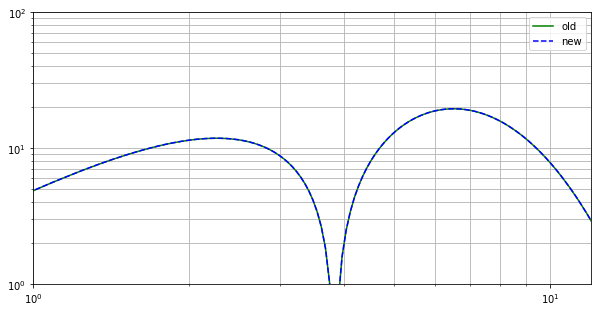

In [107]:
i=32

x_asked = np.logspace(np.log10(1e-5),np.log10(1e3),1000)
gamma_asked = 1.e-17
# xinj_asked = 7.19685673001151e-01
xinj_asked = 1.e-4
# new runs 6.449e+05
#xinj_old_run i = 189 #249451
# S_bare = pi.GetSpectra(gamma_asked,xinj_asked,x_asked,sd_lib_bare)
# S_mu_fit = pi.GetSpectra(gamma_asked,xinj_asked,x_asked,sd_lib_mu_fit)
S_lyc_reio = GetSpectra(gamma_asked,xinj_asked,x_asked,sd_lib_lyc_reio)
S_xe_history = GetSpectra(gamma_asked,xinj_asked,x_asked,sd_lib_xe_history)

fig, (ax) = plt.subplots(1,1,figsize=(10,5))
# S = S_bare
# plt.plot(S['x'],np.abs(S['DI']),c='k',label='bare')
# S = S_mu_fit
# plt.plot(S['x'],np.abs(S['DI']),c='r',label = 'mu_fit',ls='--')
S = S_lyc_reio
print(S['finj'])
plt.plot(S['x'],np.abs(S['DI']),c='g',label = 'old',ls='-')
S = S_xe_history
print(S['finj'])

# plt.plot(x_ct[26],np.abs(DI_ct_bare[26]),c='r',label = 'tot',ls='-.')
# plt.plot(x_ct[26],np.abs(DI_ct_hubble[26]),c='k',label = 'hubble-reio',ls='-.')
# # plt.plot(x_ct[26],np.abs(DI_ct_bare[26]-DI_ct_hubble[26]),c='orange',label = 'bare',ls='-.')
plt.plot(S['x'],np.abs(S['DI']),c='b',label = 'new',ls='--')
# plt.plot(x_ct[i],DI_ct[i],c='orange',label = 'i',ls='-',
#            marker='o',markersize=0.1)
# plt.plot(x_ct[i+1],DI_ct[i+1],c='r',label = 'i+1',ls='-',
#            marker='o',markersize=0.1)

# plt.plot(S['x'],-S['DI'],c='b',label = 'interp',ls=':')
# plt.plot(x_ct[i],-DI_ct[i],c='orange',label = 'i',ls=':',
#            marker='o',markersize=0.1)
# plt.plot(x_ct[i+1],-DI_ct[i+1],c='r',label = 'i+1',ls=':',
#            marker='o',markersize=0.1)

# # plt.plot(x_ct[26],np.abs(DI_ct_hubble[26]),c='k',label = 'bare',ls='-.')
#plt.plot(CT_X_new,np.abs(CT_I_new),c='magenta',label = 'ct new',ls='-')
#plt.plot(CT_X_old,np.abs(CT_I_old),c='r',label = 'ct old',ls='-.')
#plt.plot(CT_X_sirius,np.abs(CT_I_sirius),c='orange',label = 'sirius',ls='-.')
plt.loglog()
plt.grid(which='both')
plt.ylim(1e0,1e2)
plt.xlim(1e0,1.2e1)
plt.legend(loc=1)
#plt.savefig(path_to_figures + '/figures_for_paper_tests.pdf')



In [49]:
strg = "1.000e-17"

DI_ct = []
DI_ct_bare = []
DI_ct_hubble = []
DI_ct_bare_final = []
DI_ct_hubble_final = []
filename = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/ct_database/case_xe_history_180720/xe_history_180720_G_'+strg+'/spectra_xe_history_180720_G_'+strg+'_DI_ct.txt'
filename_hubble ='/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/ct_database/case_xe_history_180720/xe_history_180720_hubble_G_'+strg+'/spectra_xe_history_180720_hubble_G_'+strg+'_DI_ct.txt'
with open(filename) as f:
    for line in f:
        ls = line.strip()
        if ls:
            if "#" in ls:
                continue
            else:
                DI_ct_p = []
                l = re.split('\t',ls)
                l = [e for e in l if e]
                #print(l)
                for s in l:
                    DI_cti = float(s)
                    DI_ct_p.append(DI_cti)
                DI_ct_p = np.asarray(DI_ct_p)
            DI_ct_bare.append(DI_ct_p)
with open(filename_hubble) as f:
    for line in f:
        ls = line.strip()
        if ls:
            if "#" in ls:
                continue
            else:
                DI_ct_p = []
                l = re.split('\t',ls)
                l = [e for e in l if e]
                #print(l)
                for s in l:
                    DI_cti = float(s)
                    DI_ct_p.append(DI_cti)
                DI_ct_p = np.asarray(DI_ct_p)
            DI_ct_hubble.append(DI_ct_p)
for (p_bare,p_hubble) in zip(DI_ct_bare,DI_ct_hubble):
    DI_ct.append(p_bare-p_hubble)
    DI_ct_hubble_final.append(p_hubble)
    DI_ct_bare_final.append(p_bare)

#read x array
x_ct = []
filename = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/ct_database/case_xe_history_180720/xe_history_180720_G_'+strg+'/spectra_xe_history_180720_G_'+strg+'_x_ct.txt'
with open(filename) as f:
    for line in f:
        ls = line.strip()
        if ls:
            if "#" in ls:
                continue
            else:
                x_ct_p = []
                l = re.split('\t',ls)
                l = [e for e in l if e]
                #print(l)
                for s in l:
                    x_cti = float(s)
                    x_ct_p.append(x_cti)
                x_ct_p = np.asarray(x_ct_p)
            x_ct.append(x_ct_p)

In [24]:
CT_hubble = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/outputs/Dn.cooling.photon_inj.PDE_ODE.new_state.hubble.tmp.dat')
CT = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/outputs/Dn.cooling.photon_inj.PDE_ODE.new_state.tmp.dat')

CT_I_new = CT[:,5]-CT_hubble[:,5]
CT_X_new = CT[:,0]

CT_hubble = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/outputs/Dn.cooling.photon_inj.PDE_ODE.old_state.hubble.tmp.dat')
CT = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/outputs/Dn.cooling.photon_inj.PDE_ODE.old_state.tmp.dat')

CT_I_old = CT[:,5]-CT_hubble[:,5]
CT_X_old = CT[:,0]



In [50]:
x_inj = []
filename = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/ct_database/case_xe_history_180720/xe_history_180720_G_'+strg+'/spectra_xe_history_180720_G_'+strg+'_xinj_ct.txt'
with open(filename) as f:
    for line in f:
        ls = line.strip()
        if ls:
            if "#" in ls:
                continue
            else:
                x_ct_p = []
                l = re.split('\t',ls)
                l = [e for e in l if e]
                #print(l)
                for s in l:
                    x_cti = float(s)
                    x_ct_p.append(x_cti)
                x_ct_p = np.asarray(x_ct_p)
            x_inj.append(x_ct_p[0])
#x_inj

In [51]:
x_inj[32]

0.416

In [57]:
x_inj[33]

0.7197

In [10]:
sd_lib_lyc_reio = pi.specdist_ct_spectra_lib()
pi.load_ct_spectra_lib('lyc_reio',sd_lib_lyc_reio)

In [15]:
ct = pi.cosmotherm()
ct.ct_Drho_rho_dec = 3e-5
# ct.ct_h = 0.70
# ct.ct_Omega_b = 0.0457
# ct.ct_Omega_m = 0.30
cosmo = pi.cosmo()
X_dm = pi.dm_particle()
pi.set_dm_params_to_CT_pi_params(X_dm,ct)
pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)


xi_array = np.logspace(np.log10(1e1),np.log10(1.e8),200)
Gamma_inj_min = 1e-8
Gamma_inj_max = 1e-6
N_Gamma_inj = 4
#Gamma_values = np.logspace(np.log10(Gamma_inj_min),np.log10(Gamma_inj_max),N_Gamma_inj)
Gamma_values = [1e-8,5e-8,1e-7,5e-7,1e-6]
gamma_labels = [r'$10^{-8}$',r'$5\times10^{-8}$',r'$10^{-7}$',r'$5\times10^{-7}$',r'$10^{-6}$']
f_dm_high_z = {}
f_dm_high_z['curves'] = []
f_dm_high_z['Gamma_inj'] = []




for gamma in Gamma_values:
    mu_high_z = {}
    mu_high_z['x'] = xi_array
    mui = []
    for xi in xi_array:
        X_dm.x_0 = xi
        X_dm.Gamma_inj = gamma
        #X_dm.f_dm = pi.get_fdm_from_Drho_rho(ct.ct_Drho_rho_dec,cosmo,ct,X_dm)['tot']
        #print(r)
        mui.append(pi.high_redshift_f_dm_limit(9e-5,cosmo,ct,X_dm,N_int = 5))
    mu_high_z['mu'] = np.asarray(mui)
    f_dm_high_z['curves'].append(mu_high_z)
    f_dm_high_z['Gamma_inj'].append(gamma)



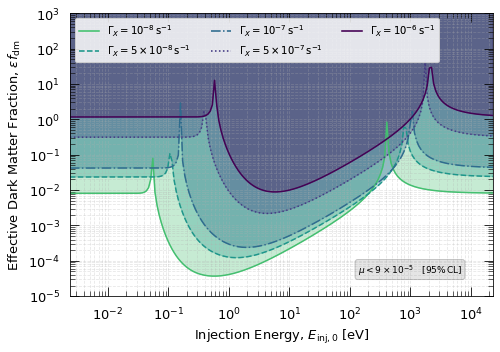

In [17]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

mklist = iter(['o','s','d','v','>'])
lstyles = iter(['-','--','-.',':','-','--','-.',':','-','--','-.',':'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 13
title_size = 13
legend_size = 25
handle_length = 1.5



# ymin=1e-6
# ymax = 2e-2
# x_min = 1e1
# x_max = 1e8
# ax.set_xlim(x_min,x_max)
# ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(label_fdm,size=title_size)
ax.set_xlabel(label_injection_energy,size=title_size)
ax.yaxis.set_label_coords(-.11,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
i = 0
color=iter(cm.viridis(np.linspace(0.7,0,len(Gamma_values))))
for gamma in np.flip(Gamma_values):
    col = next(color)
    lst = next(lstyles)
    mk = next(mklist)
    ax.plot(xinj_to_Einj*f_dm_high_z['curves'][i]['x'],np.abs(f_dm_high_z['curves'][i]['mu']),c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=lst)#, marker=mk,markersize=3)


    ax.fill_between(xinj_to_Einj*f_dm_high_z['curves'][i]['x'], np.abs(f_dm_high_z['curves'][i]['mu']),1e100,color=col,alpha=0.3)


    i += 1


ax.text(0.68, 0.12, r'$\mu < 9\times10^{-5}\quad$' + r'$[95\%\,\mathrm{CL}]$' , transform=ax.transAxes, fontsize=9, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.2))


plt.ylim(1.e-5,1e3)
plt.xlim(xinj_to_Einj*1e1,xinj_to_Einj*1e8)

leg1 = plt.legend(loc=2,ncol=3,frameon=True,framealpha=0.6,fontsize = 10)
legend_elements = [Line2D([0], [0], marker='o', color='k', label='best-fit to CT',ls='None',
                          markerfacecolor='None', markersize=5)]
#leg2 = plt.legend(handles=legend_elements, loc=(0.745,0.6))
ax.add_artist(leg1)
# ax.add_artist(leg2)
fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_fdm_high_z.pdf')
plt.show()
plt.close(fig)

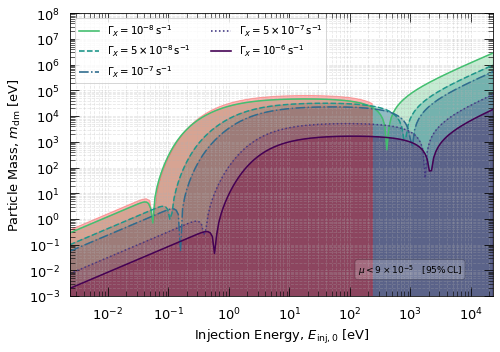

In [86]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

mklist = iter(['o','s','d','v','>'])
lstyles = iter(['-','--','-.',':','-','--','-.',':','-','--','-.',':'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 13
title_size = 13
legend_size = 25
handle_length = 1.5


Gamma_values = [1e-8,5e-8,1e-7,5e-7,1e-6]
gamma_labels = [r'$10^{-8}$',r'$5\times10^{-8}$',r'$10^{-7}$',r'$5\times10^{-7}$',r'$10^{-6}$']
# ymin=1e-6
# ymax = 2e-2
# x_min = 1e1
# x_max = 1e8
# ax.set_xlim(x_min,x_max)
# ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(label_mdm,size=title_size)
ax.set_xlabel(label_injection_energy,size=title_size)
ax.yaxis.set_label_coords(-.11,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
i = 0
color=iter(cm.viridis(np.linspace(0.7,0,len(Gamma_values))))
for gamma in np.flip(Gamma_values):
    col = next(color)
    lst = next(lstyles)
    #mk = next(mklist)
    ax.plot(xinj_to_Einj*f_dm_high_z['curves'][i]['x'],(np.abs(f_dm_high_z['curves'][i]['mu']/(xinj_to_Einj*f_dm_high_z['curves'][i]['x'])))**-1,c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=lst)#, marker=mk,markersize=3)


    ax.fill_between(xinj_to_Einj*f_dm_high_z['curves'][i]['x'], (np.abs(f_dm_high_z['curves'][i]['mu']/(xinj_to_Einj*f_dm_high_z['curves'][i]['x'])))**-1,1e-100,color=col,alpha=0.3)


    i += 1

f_dm_fisher=f_dm_fisher_lyc_reio_with_edges
ax.plot(xinj_to_Einj*f_dm_fisher['curves'][0]['x'],-(f_dm_fisher['curves'][0]['fdm']/(xinj_to_Einj*f_dm_fisher['curves'][0]['x']))**-1.,c='r',ls=style, marker='None')
ax.fill_between(xinj_to_Einj*f_dm_fisher['curves'][0]['x'], (np.abs(f_dm_fisher['curves'][0]['fdm'])/(xinj_to_Einj*f_dm_fisher['curves'][0]['x']))**-1,1e-100,color='r',alpha=0.3)


ax.text(0.68, 0.12, r'$\mu < 9\times10^{-5}\quad$' + r'$[95\%\,\mathrm{CL}]$' , transform=ax.transAxes, fontsize=9, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='white', alpha=0.2))


plt.ylim(1.e-3,1e8)
plt.xlim(xinj_to_Einj*1e1,xinj_to_Einj*1e8)

leg1 = plt.legend(loc=2,ncol=2,frameon=True,framealpha=0.6,fontsize = 10)
legend_elements = [Line2D([0], [0], marker='o', color='k', label='best-fit to CT',ls='None',
                          markerfacecolor='None', markersize=5)]
#leg2 = plt.legend(handles=legend_elements, loc=(0.745,0.6))
ax.add_artist(leg1)
# ax.add_artist(leg2)
fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_mdm_high_z.pdf')
plt.show()
plt.close(fig)

In [85]:
f_dm_fisher['Gamma_inj']

[1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1e-16, 1e-17]

In [47]:
sd_lib_lyc_reio = pi.specdist_ct_spectra_lib()
pi.load_ct_spectra_lib('lyc_reio',sd_lib_lyc_reio)

In [48]:
Nx = 200
xi_array = np.logspace(-6,6,Nx)

Gamma_values = [1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16,1e-17]
gamma_labels = [r'$10^{-8}$',r'$10^{-9}$',r'$10^{-10}$',r'$10^{-11}$',r'$10^{-12}$',r'$10^{-13}$',r'$10^{-14}$',r'$10^{-15}$',r'$10^{-16}$',r'$10^{-17}$']






firas = sd.firas()
edges = sd.edges()
a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges
a_dict['add_edges'] = 'yes'

f_dm_fisher_lyc_reio_with_edges = sd.pi_run_fisher_constraints(Gamma_values,xi_array,sd_lib_lyc_reio,**a_dict)

a_dict['add_edges'] = 'no'

f_dm_fisher_lyc_reio_no_edges = sd.pi_run_fisher_constraints(Gamma_values,xi_array,sd_lib_lyc_reio,**a_dict)



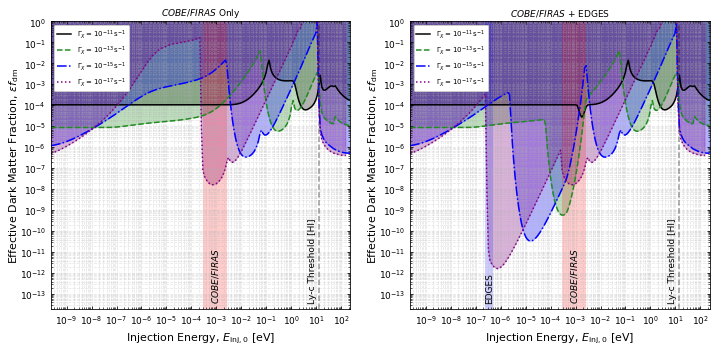

In [58]:
# photon_injection_case = 'bare'
# if photon_injection_case == 'bare':
#     f_dm_fisher = f_dm_fisher_bare
#     case = 'bare'
# if photon_injection_case == 'lyc':
#     f_dm_fisher = f_dm_fisher_lyc
#     case = 'lyc'
# if photon_injection_case == 'lyc_reio':
photon_injection_case = 'lyc_reio'
#     f_dm_fisher = f_dm_fisher_lyc_reio
#  
case = 'lyc+reio'

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

mklist = iter(['o','s','d','v','>','o','s','d','v','>'])
colors = iter(['k','forestgreen','b','purple','green','magenta','r','b','orange','green','magenta'])
lstyles = iter(['-','--','-.',':','-','--','-.',':','-','--','-.',':'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
label_size = 9
title_size = 11
legend_size = 25
handle_length = 1.5

for ax in (ax1,ax2):
    ax.set_xscale('log')
    ax.set_yscale('log')


    ax.set_ylabel(label_fdm,size=title_size)
    ax.set_xlabel(label_injection_energy,size=title_size)
    ax.yaxis.set_label_coords(-.10,0.5)


    ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(True) #(3)

    ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
    ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
    ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
    ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)

    # manipulate x-axis ticks and labels
    ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(True)

    ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

    
    if ax == ax2:
        ax.axvspan(1.e-3*xinj_to_Einj, 2e-3*xinj_to_Einj,ymin=0.,ymax=1, facecolor='blue', alpha=0.2)
    #ax.axvspan(0.5*xinj_to_Einj, 105*xinj_to_Einj,ymin=0.,ymax=0.1,  facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
    ax.axvspan(1.2*xinj_to_Einj, 11.2*xinj_to_Einj,ymin=0.,ymax=1, facecolor='red', alpha=0.2)
    ax.axvline(5.7895e4*xinj_to_Einj,ls='--',alpha=0.4,c='k')
i = 0
#color=iter(cm.viridis(np.linspace(0.7,0,len(Gamma_values))))
for gamma in np.flip(Gamma_values):
    if i<=2 or i%2==0:
        i += 1
        continue
    col = next(colors)
    mk = next(mklist)
    #ax.plot(f_dm_high_z['curves'][i]['x'],f_dm_high_z['curves'][i]['mu'],c=col,label=r'$\Gamma_X=$'+scientific_notation(f_dm_high_z['Gamma_inj'][i])+r'$\,\mathrm{s^{-1}}$',ls='None', marker=mk,markersize=3)
    style = next(lstyles)
    f_dm_fisher = f_dm_fisher_lyc_reio_no_edges
    ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],f_dm_fisher['curves'][i]['fdm'],c=col,
             label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=style, marker='None')
    ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],-f_dm_fisher['curves'][i]['fdm'],c=col,ls=style, marker='None')
    ax1.fill_between(xinj_to_Einj*f_dm_fisher['curves'][i]['x'], np.abs(f_dm_fisher['curves'][i]['fdm']),1e100,color=col,alpha=0.3)

    f_dm_fisher = f_dm_fisher_lyc_reio_with_edges
    ax2.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],f_dm_fisher['curves'][i]['fdm'],c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=style, marker='None')
    ax2.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],-f_dm_fisher['curves'][i]['fdm'],c=col,ls=style, marker='None')
    ax2.fill_between(xinj_to_Einj*f_dm_fisher['curves'][i]['x'], np.abs(f_dm_fisher['curves'][i]['fdm']),1e100,color=col,alpha=0.3)


    i += 1

# ax2.text(0.05, 0.95, case , transform=ax2.transAxes, fontsize=9, verticalalignment='top',
#           bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))

ax1.text(0.86, 0.02, 'Ly-c Threshold [HI]' , transform=ax1.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
ax1.text(0.53, 0.02, r'$COBE/FIRAS$' , transform=ax1.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
ax2.text(0.53, 0.02, r'$COBE/FIRAS$' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
ax2.text(0.25, 0.02, r'EDGES' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)

ax2.text(0.86, 0.02, 'Ly-c Threshold [HI]' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)

ax1.set_ylim(2.e-14,1e0)
ax1.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)

ax2.set_ylim(2.e-14,1e0)
ax2.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)
ax1.set_title(r'$COBE/FIRAS$ Only',fontsize=9)
ax2.set_title(r'$COBE/FIRAS$ + EDGES',fontsize=9)

#leg1 = plt.legend(loc=3,ncol=2,frameon=True,framealpha=0.6,fontsize = 9)
#legend_elements = [Line2D([0], [0], marker='o', color='k', label='best-fit to CT',ls='None',
#                          markerfacecolor='None', markersize=5)]
#leg2 = plt.legend(handles=legend_elements, loc=(0.745,0.6))
ax1.legend(loc=2,ncol=1,frameon=True,framealpha=1.,fontsize = 7)
ax2.legend(loc=2,ncol=1,frameon=True,framealpha=1.,fontsize = 7)


# ax.add_artist(leg2).tight_layout(pad=3.0)
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)
#plt.savefig(path_to_figures + '/figures_for_paper_fdm_fisher_edges_'+photon_injection_case+'.pdf')
plt.show()
plt.close(fig)

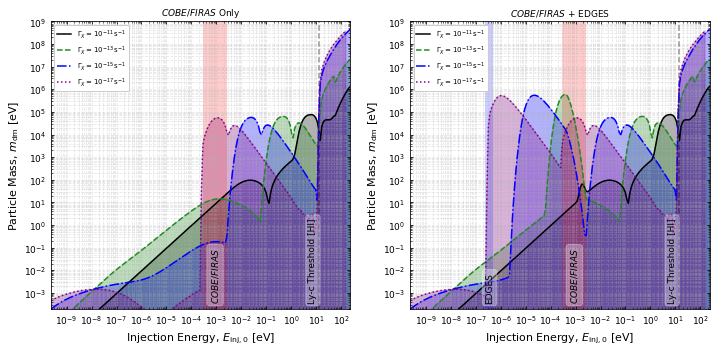

In [73]:
# photon_injection_case = 'bare'
# if photon_injection_case == 'bare':
#     f_dm_fisher = f_dm_fisher_bare
#     case = 'bare'
# if photon_injection_case == 'lyc':
#     f_dm_fisher = f_dm_fisher_lyc
#     case = 'lyc'
# if photon_injection_case == 'lyc_reio':
photon_injection_case = 'lyc_reio'
#     f_dm_fisher = f_dm_fisher_lyc_reio
#  
case = 'lyc+reio'

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

mklist = iter(['o','s','d','v','>','o','s','d','v','>'])
colors = iter(['k','forestgreen','b','purple','green','magenta','r','b','orange','green','magenta'])
lstyles = iter(['-','--','-.',':','-','--','-.',':','-','--','-.',':'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
label_size = 9
title_size = 11
legend_size = 25
handle_length = 1.5

for ax in (ax1,ax2):
    ax.set_xscale('log')
    ax.set_yscale('log')


    ax.set_ylabel(label_mdm,size=title_size)
    ax.set_xlabel(label_injection_energy,size=title_size)
    ax.yaxis.set_label_coords(-.10,0.5)


    ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(True) #(3)

    ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
    ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
    ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
    ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)

    # manipulate x-axis ticks and labels
    ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(True)

    ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

    
    if ax == ax2:
        ax.axvspan(1.e-3*xinj_to_Einj, 2e-3*xinj_to_Einj,ymin=0.,ymax=1, facecolor='blue', alpha=0.2)
    #ax.axvspan(0.5*xinj_to_Einj, 105*xinj_to_Einj,ymin=0.,ymax=0.1,  facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
    ax.axvspan(1.2*xinj_to_Einj, 11.2*xinj_to_Einj,ymin=0.,ymax=1, facecolor='red', alpha=0.2)
    ax.axvline(5.7895e4*xinj_to_Einj,ls='--',alpha=0.4,c='k')
i = 0
#color=iter(cm.viridis(np.linspace(0.7,0,len(Gamma_values))))
for gamma in np.flip(Gamma_values):
    if i<=2 or i%2==0:
        i += 1
        continue
    col = next(colors)
    mk = next(mklist)
    #ax.plot(f_dm_high_z['curves'][i]['x'],f_dm_high_z['curves'][i]['mu'],c=col,label=r'$\Gamma_X=$'+scientific_notation(f_dm_high_z['Gamma_inj'][i])+r'$\,\mathrm{s^{-1}}$',ls='None', marker=mk,markersize=3)
    style = next(lstyles)
    f_dm_fisher = f_dm_fisher_lyc_reio_no_edges
    ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],(f_dm_fisher['curves'][i]['fdm']/(xinj_to_Einj*f_dm_fisher['curves'][i]['x']))**-1,c=col,
             label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=style, marker='None')
    ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],-(f_dm_fisher['curves'][i]['fdm']/(xinj_to_Einj*f_dm_fisher['curves'][i]['x']))**-1,c=col,ls=style, marker='None')
    ax1.fill_between(xinj_to_Einj*f_dm_fisher['curves'][i]['x'], (np.abs(f_dm_fisher['curves'][i]['fdm']/(xinj_to_Einj*f_dm_fisher['curves'][i]['x'])))**-1,1e-100,color=col,alpha=0.3)

    f_dm_fisher = f_dm_fisher_lyc_reio_with_edges
    ax2.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],(f_dm_fisher['curves'][i]['fdm']/(xinj_to_Einj*f_dm_fisher['curves'][i]['x']))**-1,c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=style, marker='None')
    ax2.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],-(f_dm_fisher['curves'][i]['fdm']/(xinj_to_Einj*f_dm_fisher['curves'][i]['x']))**-1,c=col,ls=style, marker='None')
    ax2.fill_between(xinj_to_Einj*f_dm_fisher['curves'][i]['x'], (np.abs(f_dm_fisher['curves'][i]['fdm']/(xinj_to_Einj*f_dm_fisher['curves'][i]['x'])))**-1,1e-100,color=col,alpha=0.3)


    i += 1

# ax2.text(0.05, 0.95, case , transform=ax2.transAxes, fontsize=9, verticalalignment='top',
#           bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))

ax1.text(0.86, 0.02, 'Ly-c Threshold [HI]' , transform=ax1.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90,
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round',alpha=0.3))
ax1.text(0.53, 0.02, r'$COBE/FIRAS$' , transform=ax1.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90,
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round',alpha=0.3))
ax2.text(0.53, 0.02, r'$COBE/FIRAS$' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90,
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round',alpha=0.3))
ax2.text(0.25, 0.02, r'EDGES' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90,
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round',alpha=0.3))

ax2.text(0.86, 0.02, 'Ly-c Threshold [HI]' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90,
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round',alpha=0.3))

ax1.set_ylim(2.e-4,1e9)
ax1.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)

ax2.set_ylim(2.e-4,1e9)
ax2.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)
ax1.set_title(r'$COBE/FIRAS$ Only',fontsize=9)
ax2.set_title(r'$COBE/FIRAS$ + EDGES',fontsize=9)

#leg1 = plt.legend(loc=3,ncol=2,frameon=True,framealpha=0.6,fontsize = 9)
#legend_elements = [Line2D([0], [0], marker='o', color='k', label='best-fit to CT',ls='None',
#                          markerfacecolor='None', markersize=5)]
#leg2 = plt.legend(handles=legend_elements, loc=(0.745,0.6))
ax1.legend(loc=2,ncol=1,frameon=True,framealpha=1.,fontsize = 7)
ax2.legend(loc=2,ncol=1,frameon=True,framealpha=1.,fontsize = 7)


# ax.add_artist(leg2).tight_layout(pad=3.0)
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.savefig(path_to_figures + '/figures_for_paper_mdm_fisher_edges_'+photon_injection_case+'.pdf')
plt.show()
plt.close(fig)